# Libraries

In [1]:
# Import Libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import pandas as pd
!pip install geopandas

import geopandas
from geopandas import GeoSeries
from shapely.geometry import Polygon
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.preprocessing import scale, normalize
!pip install dtreeviz
from dtreeviz.trees import dtreeviz
from sklearn import preprocessing
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import numpy
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from shapely.geos import lgeos
import requests 
from bs4 import BeautifulSoup
import nltk
from collections import Counter
#import fiona
from shapely.geometry import Polygon
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from sklearn.metrics import accuracy_score
import datetime
import urllib.request

from bs4 import BeautifulSoup

from math import radians, cos, sin, asin, sqrt
!pip install pygeos
!pip install rtree
!pip install geopandas
!pip install git+git://github.com/geopandas/geopandas.git

import geopandas
import pygeos
import rtree 

!pip install metpy
from metpy.interpolate import (interpolate_to_grid, remove_nan_observations,
                               remove_repeat_coordinates)

# Import necessary packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
%matplotlib inline
import folium


/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:109: UserWarning:

The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-ky0rcm53
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-ky0rcm53


Web scrapping website: https://towardsdatascience.com/web-scraping-scraping-table-data-1665b6b2271c

# 1.Colville River

## USGS: COLVILLE R AT UMIAT AK

Variables:
- Monthly Mean Water Temperature = 'USGS_Colville_temperature'
_____
- Latitude  69°21'37.8", Longitude 152°07'21.7" NAD83
- Drainage area 13,860  square miles
- Gage datum 267.2 feet above NAVD88


### Water Quality Samples
- variable = 'USGS_Colville_water'


In [2]:
# Getting the HTML 
url = 'https://nwis.waterdata.usgs.gov/ak/nwis/qwdata/?site_no=15875000&agency_cd=USGS&inventory_output=0&rdb_inventory_output=value&TZoutput=0&pm_cd_compare=Greater%20than&radio_parm_cds=all_parm_cds&format=html_table&qw_attributes=0&qw_sample_wide=wide&rdb_qw_attributes=0&date_format=YYYY-MM-DD&rdb_compression=file&submitted_form=brief_list'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

#print(soup.prettify()) # print the parsed data of html

In [3]:
# On site there are 3 tables with the class "tablesorter"
# The following line will generate a list of HTML content for each table

# class = "tablesorter dataList tablesorter

gdp = soup.find_all("table", attrs={"class": "tablesorter"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  2


In [4]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table1 = gdp[0]

# the head will form our column names
body = table1.find_all("tr")

# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
    
print(headings)

['SampleDatetime', 'Timedatum\xa0', 'Timedatumreliabilitycode\xa0', 'SampleMediumCode\xa0', 'AgencyCollectingSample,Code\xa0', '     Stream width,  feet(00004)', ' Loca-tion inX-sect.lookingdwnstrmft from l bank(00009)', '   Temper- ature, water, deg C(00010)', '   Temper- ature,  air, deg C(00020)', '   Baro- metric pres- sure, mm Hg(00025)', '  Instan-taneous  dis-charge, ft3/s(00061)', '      Gageheight,  feet(00065)', '    Turbid-  ity,  JTU(00070)', '   Color, water, fltrd, Pt-Co units(00080)', 'Specif-   icconduc- tance,wat unfuS/cm @25 degC(00095)', ' Hydro-  gen  ion, water,unfltrd calcd,  mg/L(00191)', '     Dis- solvedoxygen,  mg/L(00300)', '   Dis- solvedoxygen,percentof sat-uration(00301)', '   pH, water,unfltrd field,  std units(00400)', '   Carbondioxide water,unfltrd  mg/L(00405)', '  ANC,wat unf fixedend pt, field,mg/L as CaCO3(00410)', ' Bicar-bonate,wat unf fixedend pt, field,  mg/L(00440)', 'Carbon-  ate,wat unf fixedend pt, field,  mg/L(00445)', '  Nitrate water, fl

In [5]:
# Next loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [6]:
headings = ['SampleDatetime',
 'Time datum',
 'Time datum reliability code',
 'Sample Medium Code',
 'Agency Collecting Sample,Code',
 'Stream width(ft)',
 'Location intersect (lookingdwnstream) from l bank)',
 'Temperature,water(C)(00010)',
 'Temperature,air(C)(00020)',
 'Barometric pressure,(mmHg)(00025)',
 'Instantaneous_discharge(ft3/s)(00061)',
 'Gageheight_feet(00065)',
 'Turbidity,(JTU)(00070)',
 'Color, water, fltrd, Pt-Co units(00080)',
 'Specific_conductance,wat unfuS/cm @25 degC(00095)',
 'Hydrogen_ion,water,unfltrd calcd,mg/L(00191)',
 'Dissolved_oxygen,(mg/L)(00300)',
 'Dissolved_oxygen,percent of saturation(00301)',
 'pH, water,unfltrd field,  std units(00400)',
 'Carbon_dioxide water,unfltrd  mg/L(00405)',
 'ANC,wat unffixedend pt, field,mg/L as CaCO3(00410)',
 'Bicarbonate,wat unf fixedend pt, field,  mg/L(00440)',
 'Carbonate,wat unf fixedend pt, field,  mg/L(00445)',
 'Nitrate water, fltrd,  mg/L  as N(00618)',
 'Nitrate+nitrite water, fltrd, mg/L  as N(00631)',
 'Ortho-phosphate, water, fltrd, mg/L(00660)',
 'Ortho-phosphate, water, fltrd, mg/L  as P(00671)',
 'Organic_carbon, water,unfltrd  mg/L(00680)',
 'Hardness, water,mg/L as CaCO3(00900)',
 'Noncarb hardness,wat unf field,mg/L as CaCO3(00902)',
 'Calcium water, fltrd,  mg/L(00915)',
 'Magnesium, water, fltrd,  mg/L(00925)',
 'Sodium, water, fltrd,  mg/L(00930)',
 'Sodium_adsorption ratio(00931)',
 'Sodium fraction of cations percent(00932)',
 'Potassium, water, fltrd,  mg/L(00935)',
 'Chloride, water, fltrd,  mg/L(00940)',
 'Sulfate water, fltrd,  mg/L(00945)',
 'Fluoride, water, fltrd,  mg/L(00950)',
 'Silica, water, fltrd,mg/L as  SiO2(00955)',
 'Iron, water, fltrd,  ug/L(01046)',
 'Manga- nese, water, fltrd, ug/L(01056)',
 'Gage_height_meters(30207)',
 'Discharge_instantaneous(m3/s)(30209)',
 'Fecal coli-form,M-FC0.7u MF cfu/ 100 mL(31625)',
 'Fecal streptococci KF MF, cfu/ 100 mL(31673)',
 'Dissolved_solids_dried @180degCwat flt mg/L(70300)',
 'Dissolved_solids, sum of constituents, mg/L(70301)',
 'Dissolved_solids, water, ton/d(70302)',
 'Dissolved_solids, water, tons/acre-ft(70303)',
 'Nitrate water, fltrd,  mg/L(71851)',
 'Iron, water,unfltrd  ug/L(71885)',
 'Sample purpose code(71999)',
 'Sampling method code(82398)']

In [7]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
USGS_Colville_water = pd.DataFrame(data=all_rows,columns=headings)
USGS_Colville_water

,SampleDatetime,Time datum,Time datum reliability code,Sample Medium Code,"Agency Collecting Sample,Code",Stream width(ft),Location intersect (lookingdwnstream) from l bank),"Temperature,water(C)(00010)","Temperature,air(C)(00020)","Barometric pressure,(mmHg)(00025)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Turbidity,(JTU)(00070)","Color, water, fltrd, Pt-Co units(00080)","Specific_conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion,water,unfltrd calcd,mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dissolved_oxygen,percent of saturation(00301)","pH, water,unfltrd field, std units(00400)","Carbon_dioxide water,unfltrd mg/L(00405)","ANC,wat unffixedend pt, field,mg/L as CaCO3(00410)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Nitrate water, fltrd, mg/L as N(00618)","Nitrate+nitrite water, fltrd, mg/L as N(00631)","Ortho-phosphate, water, fltrd, mg/L(00660)","Ortho-phosphate, water, fltrd, mg/L as P(00671)","Organic_carbon, water,unfltrd mg/L(00680)","Hardness, water,mg/L as CaCO3(00900)","Noncarb hardness,wat unf field,mg/L as CaCO3(00902)","Calcium water, fltrd, mg/L(00915)","Magnesium, water, fltrd, mg/L(00925)","Sodium, water, fltrd, mg/L(00930)",Sodium_adsorption ratio(00931),Sodium fraction of cations percent(00932),"Potassium, water, fltrd, mg/L(00935)","Chloride, water, fltrd, mg/L(00940)","Sulfate water, fltrd, mg/L(00945)","Fluoride, water, fltrd, mg/L(00950)","Silica, water, fltrd,mg/L as SiO2(00955)","Iron, water, fltrd, ug/L(01046)","Manga- nese, water, fltrd, ug/L(01056)",Gage_height_meters(30207),Discharge_instantaneous(m3/s)(30209),"Fecal coli-form,M-FC0.7u MF cfu/ 100 mL(31625)","Fecal streptococci KF MF, cfu/ 100 mL(31673)",Dissolved_solids_dried @180degCwat flt mg/L(70300),"Dissolved_solids, sum of constituents, mg/L(70301)","Dissolved_solids, water, ton/d(70302)","Dissolved_solids, water, tons/acre-ft(70303)","Nitrate water, fltrd, mg/L(71851)","Iron, water,unfltrd ug/L(71885)",Sample purpose code(71999),Sampling method code(82398)
0,1953-07-28 15:30,AKST,T,WS,,,,,,,6500,,,,109,0.00016,,,6.8,13,43,53,0.0,0.07,,,,,52,9,13.0,4.80,1.50,0.1,6,0.50,0.5,10.0,,1.90,,,,184,,,,59,1040,0.08,0.300,,,
1,1969-04-30 16:20,AKDT,T,WS,,,,0.5,,,,,,10,637,0.00003,,,7.6,15,313,382,0.0,0.00,,,,,320,5,83.0,27.0,13.0,0.3,8,1.80,0.0,38.0,0.10,8.00,,,,,,,,359,,0.49,0.000,,,
2,1969-05-01 11:00,AKDT,T,WS,,,,0.5,,,,,,5,283,0.00001,,,8.0,2.4,125,152,0.0,0.50,,,,,140,15,36.0,12.0,5.50,0.2,8,1.30,0.0,26.0,0.10,5.20,,,,,,,,163,,0.22,2.20,230,,
3,1975-04-19 16:30,AKDT,T,WS,,,,0.0,,,0.00,,2,0.0,238,0.00013,3.6,,6.9,,,,,,0.550,0.030,0.010,4.2,110,,,,3.90,0.2,7,1.10,1.0,23.0,<0.10,3.30,,,,0.00,,,,,,,,,,
4,1978-04-25 12:00,AKST,T,WS,,,,0.0,,,0.00,,,2,285,0.00006,1.8,,7.2,13,110,130,0.0,,0.450,0.030,0.010,3.2,140,37,36.0,13.0,4.40,0.2,6,1.00,1.4,40.0,<0.10,4.60,30,<10,,0.00,<1,<1,149,167,0.00,0.20,,,,
5,2005-07-27 12:47,AKDT,K,WS,USGS-WRD,384,40.0,12.7,13.5,,5200,43.91,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,13.38,147,,,,,,,,,10.00,10
6,2005-07-27 12:48,AKDT,K,WS,USGS-WRD,384,120,12.7,13.5,,5200,43.91,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,13.38,147,,,,,,,,,10.00,10
7,2005-07-27 12:49,AKDT,K,WS,USGS-WRD,384,200,12.7,13.5,,5200,43.91,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,13.38,147,,,,,,,,,10.00,
8,2005-07-27 12:50,AKDT,K,WS,USGS-WRD,384,280,12.7,13.5,,5200,43.91,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,13.38,147,,,,,,,,,10.00,10
9,2005-07-27 12:51,AKDT,K,WS,USGS-WRD,384,360,12.8,13.5,,5200,43.91,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,13.38,147,,,,,,,,,10.00,10


In [8]:
# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Colville_water['SampleDatetime'] = pd.to_datetime(USGS_Colville_water['SampleDatetime'])

# Changing to numerical 
cols = USGS_Colville_water.columns.drop('SampleDatetime')

USGS_Colville_water[cols] = USGS_Colville_water[cols].apply(pd.to_numeric, errors='ignore')
USGS_Colville_water

,SampleDatetime,Time datum,Time datum reliability code,Sample Medium Code,"Agency Collecting Sample,Code",Stream width(ft),Location intersect (lookingdwnstream) from l bank),"Temperature,water(C)(00010)","Temperature,air(C)(00020)","Barometric pressure,(mmHg)(00025)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Turbidity,(JTU)(00070)","Color, water, fltrd, Pt-Co units(00080)","Specific_conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion,water,unfltrd calcd,mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dissolved_oxygen,percent of saturation(00301)","pH, water,unfltrd field, std units(00400)","Carbon_dioxide water,unfltrd mg/L(00405)","ANC,wat unffixedend pt, field,mg/L as CaCO3(00410)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Nitrate water, fltrd, mg/L as N(00618)","Nitrate+nitrite water, fltrd, mg/L as N(00631)","Ortho-phosphate, water, fltrd, mg/L(00660)","Ortho-phosphate, water, fltrd, mg/L as P(00671)","Organic_carbon, water,unfltrd mg/L(00680)","Hardness, water,mg/L as CaCO3(00900)","Noncarb hardness,wat unf field,mg/L as CaCO3(00902)","Calcium water, fltrd, mg/L(00915)","Magnesium, water, fltrd, mg/L(00925)","Sodium, water, fltrd, mg/L(00930)",Sodium_adsorption ratio(00931),Sodium fraction of cations percent(00932),"Potassium, water, fltrd, mg/L(00935)","Chloride, water, fltrd, mg/L(00940)","Sulfate water, fltrd, mg/L(00945)","Fluoride, water, fltrd, mg/L(00950)","Silica, water, fltrd,mg/L as SiO2(00955)","Iron, water, fltrd, ug/L(01046)","Manga- nese, water, fltrd, ug/L(01056)",Gage_height_meters(30207),Discharge_instantaneous(m3/s)(30209),"Fecal coli-form,M-FC0.7u MF cfu/ 100 mL(31625)","Fecal streptococci KF MF, cfu/ 100 mL(31673)",Dissolved_solids_dried @180degCwat flt mg/L(70300),"Dissolved_solids, sum of constituents, mg/L(70301)","Dissolved_solids, water, ton/d(70302)","Dissolved_solids, water, tons/acre-ft(70303)","Nitrate water, fltrd, mg/L(71851)","Iron, water,unfltrd ug/L(71885)",Sample purpose code(71999),Sampling method code(82398)
0,1953-07-28 15:30:00,AKST,T,WS,,NaN,NaN,NaN,NaN,NaN,6500.0,NaN,NaN,NaN,109.0,0.00016,NaN,NaN,6.8,13.0,43.0,53.0,0.0,0.07,NaN,NaN,NaN,NaN,52.0,9.0,13.0,4.8,1.5,0.1,6.0,0.5,0.5,10.0,,1.9,NaN,,NaN,184.0,,,NaN,59.0,1040.0,0.08,0.3,NaN,NaN,NaN
1,1969-04-30 16:20:00,AKDT,T,WS,,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,10.0,637.0,0.00003,NaN,NaN,7.6,15.0,313.0,382.0,0.0,0.00,NaN,NaN,NaN,NaN,320.0,5.0,83.0,27.0,13.0,0.3,8.0,1.8,0.0,38.0,0.10,8.0,NaN,,NaN,NaN,,,NaN,359.0,NaN,0.49,0.0,NaN,NaN,NaN
2,1969-05-01 11:00:00,AKDT,T,WS,,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,5.0,283.0,0.00001,NaN,NaN,8.0,2.4,125.0,152.0,0.0,0.50,NaN,NaN,NaN,NaN,140.0,15.0,36.0,12.0,5.5,0.2,8.0,1.3,0.0,26.0,0.10,5.2,NaN,,NaN,NaN,,,NaN,163.0,NaN,0.22,2.2,230.0,NaN,NaN
3,1975-04-19 16:30:00,AKDT,T,WS,,NaN,NaN,0.0,NaN,NaN,0.0,NaN,2.0,0.0,238.0,0.00013,3.6,NaN,6.9,NaN,NaN,NaN,NaN,NaN,0.55,0.03,0.01,4.2,110.0,NaN,NaN,NaN,3.9,0.2,7.0,1.1,1.0,23.0,<0.10,3.3,NaN,,NaN,0.0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1978-04-25 12:00:00,AKST,T,WS,,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,2.0,285.0,0.00006,1.8,NaN,7.2,13.0,110.0,130.0,0.0,NaN,0.45,0.03,0.01,3.2,140.0,37.0,36.0,13.0,4.4,0.2,6.0,1.0,1.4,40.0,<0.10,4.6,30.0,<10,NaN,0.0,<1,<1,149.0,167.0,0.0,0.20,NaN,NaN,NaN,NaN
5,2005-07-27 12:47:00,AKDT,K,WS,USGS-WRD,384.0,40.0,12.7,13.5,NaN,5200.0,43.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,13.38,147.0,,,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0
6,2005-07-27 12:48:00,AKDT,K,WS,USGS-WRD,384.0,120.0,12.7,13.5,NaN,5200.0,43.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,13.38,147.0,,,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0
7,2005-07-27 12:49:00,AKDT,K,WS,USGS-WRD,384.0,200.0,12.7,13.5,NaN,5200.0,43.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,,13.38,147.0,,,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
USGS_Colville_water.columns

Index(['SampleDatetime', 'Time datum', 'Time datum reliability code',
       'Sample Medium Code', 'Agency Collecting Sample,Code',
       'Stream width(ft)',
       'Location intersect (lookingdwnstream) from l bank)',
       'Temperature,water(C)(00010)', 'Temperature,air(C)(00020)',
       'Barometric pressure,(mmHg)(00025)',
       'Instantaneous_discharge(ft3/s)(00061)', 'Gageheight_feet(00065)',
       'Turbidity,(JTU)(00070)', 'Color, water, fltrd, Pt-Co units(00080)',
       'Specific_conductance,wat unfuS/cm @25 degC(00095)',
       'Hydrogen_ion,water,unfltrd calcd,mg/L(00191)',
       'Dissolved_oxygen,(mg/L)(00300)',
       'Dissolved_oxygen,percent of saturation(00301)',
       'pH, water,unfltrd field,  std units(00400)',
       'Carbon_dioxide water,unfltrd  mg/L(00405)',
       'ANC,wat unffixedend pt, field,mg/L as CaCO3(00410)',
       'Bicarbonate,wat unf fixedend pt, field,  mg/L(00440)',
       'Carbonate,wat unf fixedend pt, field,  mg/L(00445)',
       'Nitrate w

In [10]:
# Adding to Other DataFrames

# Adding this Dataframe into the big Colville Dataframe
Colville = pd.DataFrame(USGS_Colville_water,columns=['SampleDatetime',
 'Stream width(ft)',
 'Temperature,water(C)(00010)',
 'Temperature,air(C)(00020)',
 'Instantaneous_discharge(ft3/s)(00061)',
 'Gageheight_feet(00065)',
 'Color, water, fltrd, Pt-Co units(00080)',
 'Specific_conductance,wat unfuS/cm @25 degC(00095)',
 'Hydrogen_ion,water,unfltrd calcd,mg/L(00191)',
 'Dissolved_oxygen,(mg/L)(00300)',
 'Dis- solvedoxygen,percentof sat-uration(00301)',
 'pH, water,unfltrd field,  std units(00400)',
 'Carbondioxide water,unfltrd  mg/L(00405)',
 'Bicarbonate,wat unf fixedend pt, field,  mg/L(00440)',
 'Carbonate,wat unf fixedend pt, field,  mg/L(00445)',
 'Nitrate water, fltrd,  mg/L  as N(00618)',
 'Nitrate+nitrite water, fltrd, mg/L  as N(00631)',
 'Ortho-phosphate, water, fltrd, mg/L(00660)',
 'Ortho-phosphate, water, fltrd, mg/L  as P(00671)',
 'Organic_carbon, water,unfltrd  mg/L(00680)',
 'Hardness, water,mg/L as CaCO3(00900)',
 'Noncarb hardness,wat unf field,mg/L as CaCO3(00902)',
 'Calcium water, fltrd,  mg/L(00915)',
 'Magnesium, water, fltrd,  mg/L(00925)',
 'Sodium, water, fltrd,  mg/L(00930)',
 'Sodium_adsorption ratio(00931)',
 'Sodium fraction of cations percent(00932)',
 'Potassium, water, fltrd,  mg/L(00935)',
 'Chloride, water, fltrd,  mg/L(00940)',
 'Sulfate water, fltrd,  mg/L(00945)',
 'Fluoride, water, fltrd,  mg/L(00950)',
 'Silica, water, fltrd,mg/L as  SiO2(00955)',
 'Iron, water, fltrd,  ug/L(01046)',
 'Manga- nese, water, fltrd, ug/L(01056)',
 'Gage_height_meters(30207)',
 'Discharge_instantaneous(m3/s)(30209)',
 'Fecal coli-form,M-FC0.7u MF cfu/ 100 mL(31625)',
 'Fecal streptococci KF MF, cfu/ 100 mL(31673)',
 'Dissolved_solids_dried @180degCwat flt mg/L(70300)',
 'Dissolved_solids, sum of constituents, mg/L(70301)',
 'Dissolved_solids, water, ton/d(70302)',
 'Dissolved_solids, water, tons/acre-ft(70303)',
 'Nitrate water, fltrd,  mg/L(71851)',
 'Iron, water,unfltrd  ug/L(71885)'])

### Mean Daily Discharge (ft3/s)
- variable = 'USGS_Colville_discharge'
- Calculation Period 2001-10-01 -> 2021-09-30

website: https://waterdata.usgs.gov/nwis/dvstat/?referred_module=sw&amp;site_no=15875000&amp;por_15875000_1200=624322,00060,1200,2002-08-21,2021-04-19&amp;format=html_table&amp;stat_cds=mean_va&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list

In [11]:
USGS_Colville_discharge = pd.DataFrame({'Day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
                   'Jan':[40,39,36,35,34,34,32,30,29,28,27,26,25,24,24,23,22,21,20,19,19,18,18,17,17,16,15,15,14,14,13],
                   'Feb':[13,13,12,12,11,11,11,11,10,10,9,9,9,9,9,8,8,8,8,7,7,7,7,6,6,6,6,6,4,'NaN','NaN'],
                   'Mar':[6,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3.2,3.2,3.2,3.2,3.2,3.2,3.2,3],
                   'Apr':[3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3.1,3.1,3.2,3.2,3.3,3.6,6.3,'NaN'],
                   'May':[14,37,114,203,142,126,115,104,99,105,94,95,100,2030,4470,3890,6880,13400,18900,22500,28100,34500,42900,54600,59700,69500,70900,69300,75200,89300,93600],
                   'Jun':[89100,82200,77200,75700,76500,73400,73100,66900,59900,56600,54700,49600,42600,37000,33000,30900,28900,26800,25200,24700,23800,23900,23500,25300,22900,21200,21500,22700,22000,19100,'NaN'],
                   'Jul':[17500,17700,17400,20200,17500,15300,14000,12700,12100,12900,15200,15900,14800,13800,13400,14500,13500,13500,14700,17100,19400,18900,18300,19200,18100,16000,15800,15600,14500,13600,13300],
                   'Aug':[15700,19700,19200,19700,23000,21800,19600,19300,18500,17100,16200,16100,17500,22200,26300,24400,21900,23700,26400,23800,21200,20500,21200,22100,21800,21900,20800,21800,21100,19900,19600],
                   'Sep':[19800,21200,22200,22100,19800,18100,17300,17300,16500,16300,16300,15100,14600,13900,14100,14400,14100,13300,12700,12200,11700,11300,11300,10700,9840,9160,8370,7780,7150,6750,'NaN'],
                   'Oct':[6430,6360,7130,9900,8980,6970,5990,5190,4530,3970,3570,3210,2950,2680,2280,2030,1800,1610,1470,1380,1290,1210,1120,1060,988,941,891,841,794,752,707],
                   'Nov':[674,639,607,572,546,514,496,471,445,419,402,376,361,343,324,309,297,274,266,252,244,226,219,206,199,191,182,174,168,160,'NaN'],
                   'Dec':[153,145,141,130,126,120,111,107,103,98,94,89,86,81,78,75,72,69,67,64,63,59,57,56,53,51,49,47,45,43,41]})

USGS_Colville_discharge

,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,40,13,6.0,3,14,89100,17500,15700,19800,6430,674,153
1,2,39,13,5.0,3,37,82200,17700,19700,21200,6360,639,145
2,3,36,12,5.0,3,114,77200,17400,19200,22200,7130,607,141
3,4,35,12,5.0,3,203,75700,20200,19700,22100,9900,572,130
4,5,34,11,5.0,3,142,76500,17500,23000,19800,8980,546,126
5,6,34,11,5.0,3,126,73400,15300,21800,18100,6970,514,120
6,7,32,11,5.0,3,115,73100,14000,19600,17300,5990,496,111
7,8,30,11,5.0,3,104,66900,12700,19300,17300,5190,471,107
8,9,29,10,4.0,3,99,59900,12100,18500,16500,4530,445,103
9,10,28,10,4.0,3,105,56600,12900,17100,16300,3970,419,98


### Monthly Average Discharge (ft3/s)
- variable: 'USGS_Colville_Month_Discharge'
- 2002-09-01 -> 2021-03-31

website = https://waterdata.usgs.gov/nwis/monthly/?referred_module=sw&amp;site_no=15875000&amp;por_15875000_1200=624322,00060,1200,2002-08,2021-04&amp;format=html_table&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list

In [12]:
USGS_Colville_Month_Discharge = pd.DataFrame({'Year':[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],
                   'Jan':['NaN',4,7,21,18,28,21,15,37,36,29,16,26,45,24,16,25,41,27,22],
                   'Feb':['NaN',0,2,4,0,12,1,0,14,10,11,4,9,29,10,4,12,30,9,8],
                   'Mar':['NaN',0,0,0,0,1,0,0,2,1,2,2,6,17,6,1,7,23,5,3],
                   'Apr':['NaN',0,0,0,0,0,0,3,1,0,1,1,6,12,3,1,6,20,4,3],
                   'May':['NaN',690,40890,12830,22010,4179,17260,36940,17280,37790,16680,6434,33290,62410,47460,12070,12220,36180,25340,'NaN'],
                   'Jun':['NaN',65690,24940,72480,37120,50530,46530,45050,48760,31190,41910,83970,72180,17010,32660,26220,47610,18370,23780,'NaN'],
                   'Jul':['NaN',24030,15310,13920,21940,12140,12900,13890,10370,13170,16970,10530,29820,8243,14540,13110,26970,12380,12270,'NaN'],
                   'Aug':['NaN',31800,24870,4143,33560,17820,10770,13440,15720,11330,14860,10290,10130,22250,27290,36370,30330,38990,19890,'NaN'],
                   'Sep':[21030,12760,12060,6014,6229,7511,1867,13750,6213,11940,27440,11750,16140,11550,15310,25900,23280,15500,23120,'NaN'],
                   'Oct':[7221,10490,557,1169,2667,874,560,1775,1248,1958,3678,1475,1215,1504,4868,6403,3122,3497,6403,'NaN'],
                   'Nov':[844,560,142,200,325,177,207,418,454,375,145,509,217,276,405,448,343,270,370,'NaN'],
                   'Dec':[100,73,57,105,80,73,73,95,132,94,46,131,90,66,64,87,67,79,69,'NaN']})

USGS_Colville_Month_Discharge

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21030,7221,844,100
1,2003,4,0,0,0,690,65690,24030,31800,12760,10490,560,73
2,2004,7,2,0,0,40890,24940,15310,24870,12060,557,142,57
3,2005,21,4,0,0,12830,72480,13920,4143,6014,1169,200,105
4,2006,18,0,0,0,22010,37120,21940,33560,6229,2667,325,80
5,2007,28,12,1,0,4179,50530,12140,17820,7511,874,177,73
6,2008,21,1,0,0,17260,46530,12900,10770,1867,560,207,73
7,2009,15,0,0,3,36940,45050,13890,13440,13750,1775,418,95
8,2010,37,14,2,1,17280,48760,10370,15720,6213,1248,454,132
9,2011,36,10,1,0,37790,31190,13170,11330,11940,1958,375,94


### Surface-Water Annual Statistics
- variable = 'USGS_Colville_annual'

website: https://waterdata.usgs.gov/nwis/annual/?referred_module=sw&amp;site_no=15875000&amp;por_15875000_1200=624322,00060,1200,2002,2021&amp;partial_periods=on&amp;year_type=W&amp;format=html_table&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list

In [13]:
USGS_Colville_annual = pd.DataFrame({'Year':[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],
                   'Discharge_(ft3/s)':[21040,11940,10840,9142,10270,7933,7530,10360,8400,8994,10000,10510,13660,10370,11650,9965,12320,10530,9042,1058]})

USGS_Colville_annual 

,Year,Discharge_(ft3/s)
0,2002,21040
1,2003,11940
2,2004,10840
3,2005,9142
4,2006,10270
5,2007,7933
6,2008,7530
7,2009,10360
8,2010,8400
9,2011,8994


### Streamflow Measurements
- variable": USGS_Colville_streamflow

website: https://nwis.waterdata.usgs.gov/ak/nwis/measurements/?site_no=15875000&agency_cd=USGS

In [14]:
# Getting the HTML 
url = 'https://nwis.waterdata.usgs.gov/ak/nwis/measurements/?site_no=15875000&agency_cd=USGS'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

#print(soup.prettify()) # print the parsed data of html

In [15]:
# On site there are 3 tables with the class "tablesorter"
# The following line will generate a list of HTML content for each table

# class = "tablesorter dataList tablesorter

gdp = soup.find_all("table", attrs={"class": "tablesorter"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  1


In [16]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table1 = gdp[0]

# the head will form our column names
body = table1.find_all("tr")

# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
    
print(headings)

['Meas.Number', '\xa0 Date \xa0 \xa0 \xa0 Time', 'TimeDatum', 'MeasurementUsed?', ' \xa0 Who', 'MeasuringAgency', 'Streamflow(ft3/s)', 'GageHeight(ft)', 'GHChange(ft)', 'Meas.Duration(hr)', 'Meas.Rated', ' \xa0 Control', 'FlowAdjust.Code\xa0']


In [17]:
# Next loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [18]:
# Renaming Columns ( bc they were gross before)

headings = ['Measured Number',
 'SampleDatetime',
 'Time datum',
 'Measurement Used',
 'Who',
 'Measuring Agency',
 'Stream_flow(ft3/s)',
 'Gage_height(ft)',
 'GH_Change(ft)',
 'Meas_Duration(hr)',
 'Meas_Rated',
 'Control',
 'Flow_Adjust_Code']

In [19]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
USGS_Colville_streamflow = pd.DataFrame(data=all_rows,columns=headings)
USGS_Colville_streamflow

,Measured Number,SampleDatetime,Time datum,Measurement Used,Who,Measuring Agency,Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft),Meas_Duration(hr),Meas_Rated,Control,Flow_Adjust_Code
0,163,2021-06-02 13:41:34,AKDT,Yes,MFS/EMR,USGS,19200,49.58,0.00,2.00,Fair,Clear,NONE
1,162,2020-11-12 12:01:25,AKST,Yes,jab/mfs,USGS,406,,,,Fair,IceCover,NONE
2,161,2020-09-23 16:35:29,AKDT,Yes,MFS/MEC,USGS,26000,49.82,-0.01,1.50,Fair,Clear,NONE
3,160,2020-07-29 18:58:43,AKDT,Yes,MFS/MEc,USGS,26900,49.68,0.06,2.00,Fair,Clear,NONE
4,159,2020-06-05 13:28:31,AKDT,Yes,MFS/MEC,USGS,32700,50.13,,,Fair,Clear,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,5,2002-08-20 17:15,AKDT,Yes,JDE/CWS,USGS,37300,50.53,-0.03,1.30,Poor,Clear,NONE
159,4,2002-06-15 11:35,AKDT,Yes,RTK/JXK,USGS,19800,25.27,0.01,1.00,Unspecified,Clear,NONE
160,3,1953-09-10 08:00,AKST,Yes,JMS/REP,USGS,13000,6.38,0.00,2.00,Poor,Clear,NONE
161,2,1953-07-28 13:00,AKST,Yes,REP/JMS,USGS,6500,4.95,,,Fair,Clear,NONE


In [20]:
# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Colville_streamflow['SampleDatetime'] = pd.to_datetime(USGS_Colville_streamflow['SampleDatetime'])

# Changing to numerical 
cols = USGS_Colville_streamflow.columns.drop('SampleDatetime')

USGS_Colville_streamflow[cols] = USGS_Colville_streamflow[cols].apply(pd.to_numeric, errors='ignore')
USGS_Colville_streamflow

,Measured Number,SampleDatetime,Time datum,Measurement Used,Who,Measuring Agency,Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft),Meas_Duration(hr),Meas_Rated,Control,Flow_Adjust_Code
0,163,2021-06-02 13:41:34,AKDT,Yes,MFS/EMR,USGS,19200.0,49.58,0.00,2.00,Fair,Clear,NONE
1,162,2020-11-12 12:01:25,AKST,Yes,jab/mfs,USGS,406.0,,,,Fair,IceCover,NONE
2,161,2020-09-23 16:35:29,AKDT,Yes,MFS/MEC,USGS,26000.0,49.82,-0.01,1.50,Fair,Clear,NONE
3,160,2020-07-29 18:58:43,AKDT,Yes,MFS/MEc,USGS,26900.0,49.68,0.06,2.00,Fair,Clear,NONE
4,159,2020-06-05 13:28:31,AKDT,Yes,MFS/MEC,USGS,32700.0,50.13,,,Fair,Clear,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,5,2002-08-20 17:15:00,AKDT,Yes,JDE/CWS,USGS,37300.0,50.53,-0.03,1.30,Poor,Clear,NONE
159,4,2002-06-15 11:35:00,AKDT,Yes,RTK/JXK,USGS,19800.0,25.27,0.01,1.00,Unspecified,Clear,NONE
160,3,1953-09-10 08:00:00,AKST,Yes,JMS/REP,USGS,13000.0,6.38,0.00,2.00,Poor,Clear,NONE
161,2,1953-07-28 13:00:00,AKST,Yes,REP/JMS,USGS,6500.0,4.95,,,Fair,Clear,NONE


In [21]:
# Adding to Other DataFrames

# Creating temporary dataframe to append to big Colville Dataframe
temporary = pd.DataFrame(USGS_Colville_streamflow,
                     columns=['SampleDatetime',
                              'Stream_flow(ft3/s)',
                              'Gage_height(ft)',
                              'GH_Change(ft)'])

# Changing to numerical 
cols = temporary.columns.drop('SampleDatetime')
temporary[cols] = temporary[cols].apply(pd.to_numeric, errors='ignore')

# Add NaN to cells that don't have data
temporary = temporary.replace(' ',np.NaN)

temporary

,SampleDatetime,Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft)
0,2021-06-02 13:41:34,19200.0,49.58,0.00
1,2020-11-12 12:01:25,406.0,NaN,NaN
2,2020-09-23 16:35:29,26000.0,49.82,-0.01
3,2020-07-29 18:58:43,26900.0,49.68,0.06
4,2020-06-05 13:28:31,32700.0,50.13,NaN
...,...,...,...,...
158,2002-08-20 17:15:00,37300.0,50.53,-0.03
159,2002-06-15 11:35:00,19800.0,25.27,0.01
160,1953-09-10 08:00:00,13000.0,6.38,0.00
161,1953-07-28 13:00:00,6500.0,4.95,NaN


In [22]:
# Adding this Dataframe into the big Colville Dataframe
Colville = Colville.append(temporary)
Colville

,SampleDatetime,Stream width(ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Color, water, fltrd, Pt-Co units(00080)","Specific_conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion,water,unfltrd calcd,mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dis- solvedoxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","Carbondioxide water,unfltrd mg/L(00405)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Nitrate water, fltrd, mg/L as N(00618)","Nitrate+nitrite water, fltrd, mg/L as N(00631)","Ortho-phosphate, water, fltrd, mg/L(00660)","Ortho-phosphate, water, fltrd, mg/L as P(00671)","Organic_carbon, water,unfltrd mg/L(00680)","Hardness, water,mg/L as CaCO3(00900)","Noncarb hardness,wat unf field,mg/L as CaCO3(00902)","Calcium water, fltrd, mg/L(00915)","Magnesium, water, fltrd, mg/L(00925)","Sodium, water, fltrd, mg/L(00930)",Sodium_adsorption ratio(00931),Sodium fraction of cations percent(00932),"Potassium, water, fltrd, mg/L(00935)","Chloride, water, fltrd, mg/L(00940)","Sulfate water, fltrd, mg/L(00945)","Fluoride, water, fltrd, mg/L(00950)","Silica, water, fltrd,mg/L as SiO2(00955)","Iron, water, fltrd, ug/L(01046)","Manga- nese, water, fltrd, ug/L(01056)",Gage_height_meters(30207),Discharge_instantaneous(m3/s)(30209),"Fecal coli-form,M-FC0.7u MF cfu/ 100 mL(31625)","Fecal streptococci KF MF, cfu/ 100 mL(31673)",Dissolved_solids_dried @180degCwat flt mg/L(70300),"Dissolved_solids, sum of constituents, mg/L(70301)","Dissolved_solids, water, ton/d(70302)","Dissolved_solids, water, tons/acre-ft(70303)","Nitrate water, fltrd, mg/L(71851)","Iron, water,unfltrd ug/L(71885)",Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft)
0,1953-07-28 15:30:00,NaN,NaN,NaN,6500.0,NaN,NaN,109.0,0.00016,NaN,NaN,6.8,NaN,53.0,0.0,0.07,NaN,NaN,NaN,NaN,52.0,9.0,13.0,4.8,1.5,0.1,6.0,0.5,0.5,10.0,,1.9,NaN,,NaN,184.0,,,NaN,59.0,1040.0,0.08,0.3,NaN,NaN,NaN,NaN
1,1969-04-30 16:20:00,NaN,0.5,NaN,NaN,NaN,10.0,637.0,0.00003,NaN,NaN,7.6,NaN,382.0,0.0,0.00,NaN,NaN,NaN,NaN,320.0,5.0,83.0,27.0,13.0,0.3,8.0,1.8,0.0,38.0,0.10,8.0,NaN,,NaN,NaN,,,NaN,359.0,NaN,0.49,0.0,NaN,NaN,NaN,NaN
2,1969-05-01 11:00:00,NaN,0.5,NaN,NaN,NaN,5.0,283.0,0.00001,NaN,NaN,8.0,NaN,152.0,0.0,0.50,NaN,NaN,NaN,NaN,140.0,15.0,36.0,12.0,5.5,0.2,8.0,1.3,0.0,26.0,0.10,5.2,NaN,,NaN,NaN,,,NaN,163.0,NaN,0.22,2.2,230.0,NaN,NaN,NaN
3,1975-04-19 16:30:00,NaN,0.0,NaN,0.0,NaN,0.0,238.0,0.00013,3.6,NaN,6.9,NaN,NaN,NaN,NaN,0.55,0.03,0.01,4.2,110.0,NaN,NaN,NaN,3.9,0.2,7.0,1.1,1.0,23.0,<0.10,3.3,NaN,,NaN,0.0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1978-04-25 12:00:00,NaN,0.0,NaN,0.0,NaN,2.0,285.0,0.00006,1.8,NaN,7.2,NaN,130.0,0.0,NaN,0.45,0.03,0.01,3.2,140.0,37.0,36.0,13.0,4.4,0.2,6.0,1.0,1.4,40.0,<0.10,4.6,30.0,<10,NaN,0.0,<1,<1,149.0,167.0,0.0,0.20,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2002-08-20 17:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37300.0,50.53,-0.03
159,2002-06-15 11:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19800.0,25.27,0.01
160,1953-09-10 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13000.0,6.38,0.00
161,1953-07-28 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6500.0,4.95,NaN


### Stream Historical/Current Data (2016)
variable : 'USGS_Colville_hist'

NOTE: You could probably go back more for this data set but this is set to 2016 to not crash the page

In [23]:
## # Getting the HTML 
url = 'https://nwis.waterdata.usgs.gov/nwis/uv?cb_00020=on&cb_00045=on&cb_00060=on&cb_00065=on&cb_00065=on&format=html&site_no=15875000&period=&begin_date=2016-07-01&end_date=2021-07-14'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

#print(soup.prettify()) # print the parsed data of html

In [24]:
# On site there are 3 tables with the class "tablesorter"
# The following line will generate a list of HTML content for each table

# class = "tablesorter dataList tablesorter

gdp = soup.find_all("table", attrs={"class": "tablesorter"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  1


In [25]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table1 = gdp[0]

# the head will form our column names
body = table1.find_all("tr")

# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
    
print(headings)

['Date / Time', '      Dis-charge, ft3/s,', '   Precip-itation total, inches,', '   Temper- ature,  air, deg C,', '      Gageheight,  feet,', '      Gageheight,  feet,[Secondary]']


In [26]:
# Next loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [27]:
# Renaming Columns ( bc they were gross before)

headings = ['SampleDatetime',
            'Discharge_ft2/s',
            'Precipitation_total_in',
            'Temperature_air_C',
            'Gageheight_ft',
            'Gageheight_ft_2']

In [28]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
USGS_Colville_hist = pd.DataFrame(data=all_rows,columns=headings)
USGS_Colville_hist

,SampleDatetime,Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2
0,07/01/2016 00:00 AKDT,21600A,,,50.45A,
1,07/01/2016 00:15 AKDT,21500A,,,50.44A,
2,07/01/2016 00:30 AKDT,21600A,,,50.45A,
3,07/01/2016 00:45 AKDT,21500A,,,50.44A,
4,07/01/2016 01:00 AKDT,21400A,,,50.43A,
...,...,...,...,...,...,...
77449,07/14/2021 22:45 AKDT,13900P,,,48.83P,48.74P
77450,07/14/2021 23:00 AKDT,13900P,0.00P,8.6P,48.83P,48.74P
77451,07/14/2021 23:15 AKDT,13900P,,,48.83P,48.74P
77452,07/14/2021 23:30 AKDT,13800P,0.00P,,48.82P,48.74P


In [29]:
# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Colville_hist['SampleDatetime'] = pd.to_datetime(USGS_Colville_hist['SampleDatetime'])

# Holding onto datetime for later 
cols = USGS_Colville_hist.drop('SampleDatetime',axis =1)

cols


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning:

tzname AKDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning:

tzname AKST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



,Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2
0,21600A,,,50.45A,
1,21500A,,,50.44A,
2,21600A,,,50.45A,
3,21500A,,,50.44A,
4,21400A,,,50.43A,
...,...,...,...,...,...
77449,13900P,,,48.83P,48.74P
77450,13900P,0.00P,8.6P,48.83P,48.74P
77451,13900P,,,48.83P,48.74P
77452,13800P,0.00P,,48.82P,48.74P


In [30]:
# Dropping the stupid character that don't belong/ keep numbers 

for i in ['Discharge_ft2/s',
            'Precipitation_total_in',
            'Temperature_air_C',
            'Gageheight_ft',
            'Gageheight_ft_2']:
  cols[i]= cols[i].str.replace('[^0-9.]','')
  #cols[i]= cols[i].str.replace('P','')

# Join datetime back into dataframe
cols = cols.join(USGS_Colville_hist['SampleDatetime'])
#cols

# Rename USGS_Kuparuk_hist
USGS_Colville_hist = cols
USGS_Colville_hist

,Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2,SampleDatetime
0,21600,,,50.45,,2016-07-01 00:00:00
1,21500,,,50.44,,2016-07-01 00:15:00
2,21600,,,50.45,,2016-07-01 00:30:00
3,21500,,,50.44,,2016-07-01 00:45:00
4,21400,,,50.43,,2016-07-01 01:00:00
...,...,...,...,...,...,...
77449,13900,,,48.83,48.74,2021-07-14 22:45:00
77450,13900,0.00,8.6,48.83,48.74,2021-07-14 23:00:00
77451,13900,,,48.83,48.74,2021-07-14 23:15:00
77452,13800,0.00,,48.82,48.74,2021-07-14 23:30:00


In [31]:
# Adding to Other DataFrames

# Creating temporary dataframe to append to big Colville Dataframe
temporary = pd.DataFrame(USGS_Colville_hist,
                     columns=['SampleDatetime',
            'Discharge_ft2/s',
            'Precipitation_total_in',
            'Temperature_air_C',
            'Gageheight_ft',
            'Gageheight_ft_2'])

# Changing to numerical 
cols = temporary.columns.drop('SampleDatetime')
temporary[cols] = temporary[cols].apply(pd.to_numeric, errors='ignore')

# Add NaN to cells that don't have data
temporary = temporary.replace(' ',np.NaN)


# Adding this Dataframe into the big Colville Dataframe
Colville = Colville.append(temporary)
temporary


,SampleDatetime,Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2
0,2016-07-01 00:00:00,21600.0,NaN,NaN,50.45,NaN
1,2016-07-01 00:15:00,21500.0,NaN,NaN,50.44,NaN
2,2016-07-01 00:30:00,21600.0,NaN,NaN,50.45,NaN
3,2016-07-01 00:45:00,21500.0,NaN,NaN,50.44,NaN
4,2016-07-01 01:00:00,21400.0,NaN,NaN,50.43,NaN
...,...,...,...,...,...,...
77449,2021-07-14 22:45:00,13900.0,NaN,NaN,48.83,48.74
77450,2021-07-14 23:00:00,13900.0,0.0,8.6,48.83,48.74
77451,2021-07-14 23:15:00,13900.0,NaN,NaN,48.83,48.74
77452,2021-07-14 23:30:00,13800.0,0.0,NaN,48.82,48.74


## = All Colville

In [32]:
# From Datetime Column, make new year, month, day, time column 
Colville['Datetime'] = pd.DatetimeIndex(Colville['SampleDatetime'])
Colville['year'] = pd.DatetimeIndex(Colville['SampleDatetime']).year
Colville['month'] = pd.DatetimeIndex(Colville['SampleDatetime']).month
Colville['day'] = pd.DatetimeIndex(Colville['SampleDatetime']).day
Colville['time'] = pd.DatetimeIndex(Colville['SampleDatetime']).time


Colville.set_index('SampleDatetime',inplace = True)

Colville

,Stream width(ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Color, water, fltrd, Pt-Co units(00080)","Specific_conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion,water,unfltrd calcd,mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dis- solvedoxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","Carbondioxide water,unfltrd mg/L(00405)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Nitrate water, fltrd, mg/L as N(00618)","Nitrate+nitrite water, fltrd, mg/L as N(00631)","Ortho-phosphate, water, fltrd, mg/L(00660)","Ortho-phosphate, water, fltrd, mg/L as P(00671)","Organic_carbon, water,unfltrd mg/L(00680)","Hardness, water,mg/L as CaCO3(00900)","Noncarb hardness,wat unf field,mg/L as CaCO3(00902)","Calcium water, fltrd, mg/L(00915)","Magnesium, water, fltrd, mg/L(00925)","Sodium, water, fltrd, mg/L(00930)",Sodium_adsorption ratio(00931),Sodium fraction of cations percent(00932),"Potassium, water, fltrd, mg/L(00935)","Chloride, water, fltrd, mg/L(00940)","Sulfate water, fltrd, mg/L(00945)","Fluoride, water, fltrd, mg/L(00950)","Silica, water, fltrd,mg/L as SiO2(00955)","Iron, water, fltrd, ug/L(01046)","Manga- nese, water, fltrd, ug/L(01056)",Gage_height_meters(30207),Discharge_instantaneous(m3/s)(30209),"Fecal coli-form,M-FC0.7u MF cfu/ 100 mL(31625)","Fecal streptococci KF MF, cfu/ 100 mL(31673)",Dissolved_solids_dried @180degCwat flt mg/L(70300),"Dissolved_solids, sum of constituents, mg/L(70301)","Dissolved_solids, water, ton/d(70302)","Dissolved_solids, water, tons/acre-ft(70303)","Nitrate water, fltrd, mg/L(71851)","Iron, water,unfltrd ug/L(71885)",Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft),Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2,Datetime,year,month,day,time
SampleDatetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1953-07-28 15:30:00,NaN,NaN,NaN,6500.0,NaN,NaN,109.0,0.00016,NaN,NaN,6.8,NaN,53.0,0.0,0.07,NaN,NaN,NaN,NaN,52.0,9.0,13.0,4.8,1.5,0.1,6.0,0.5,0.5,10.0,,1.9,NaN,,NaN,184.0,,,NaN,59.0,1040.0,0.08,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953-07-28 15:30:00,1953,7,28,15:30:00
1969-04-30 16:20:00,NaN,0.5,NaN,NaN,NaN,10.0,637.0,0.00003,NaN,NaN,7.6,NaN,382.0,0.0,0.00,NaN,NaN,NaN,NaN,320.0,5.0,83.0,27.0,13.0,0.3,8.0,1.8,0.0,38.0,0.10,8.0,NaN,,NaN,NaN,,,NaN,359.0,NaN,0.49,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-04-30 16:20:00,1969,4,30,16:20:00
1969-05-01 11:00:00,NaN,0.5,NaN,NaN,NaN,5.0,283.0,0.00001,NaN,NaN,8.0,NaN,152.0,0.0,0.50,NaN,NaN,NaN,NaN,140.0,15.0,36.0,12.0,5.5,0.2,8.0,1.3,0.0,26.0,0.10,5.2,NaN,,NaN,NaN,,,NaN,163.0,NaN,0.22,2.2,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-05-01 11:00:00,1969,5,1,11:00:00
1975-04-19 16:30:00,NaN,0.0,NaN,0.0,NaN,0.0,238.0,0.00013,3.6,NaN,6.9,NaN,NaN,NaN,NaN,0.55,0.03,0.01,4.2,110.0,NaN,NaN,NaN,3.9,0.2,7.0,1.1,1.0,23.0,<0.10,3.3,NaN,,NaN,0.0,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975-04-19 16:30:00,1975,4,19,16:30:00
1978-04-25 12:00:00,NaN,0.0,NaN,0.0,NaN,2.0,285.0,0.00006,1.8,NaN,7.2,NaN,130.0,0.0,NaN,0.45,0.03,0.01,3.2,140.0,37.0,36.0,13.0,4.4,0.2,6.0,1.0,1.4,40.0,<0.10,4.6,30.0,<10,NaN,0.0,<1,<1,149.0,167.0,0.0,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978-04-25 12:00:00,1978,4,25,12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13900.0,NaN,NaN,48.83,48.74,2021-07-14 22:45:00,2021,7,14,22:45:00
2021-07-14 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# 2.Kuparuk River

## USGS: KUPARUK R NR DEADHORSE AK

Variables:
- Water Quality Samples = 'USGS_Kuparuk_water'
- Monthly Mean Water Temperature = 'USGS_Kuparuk_temperature'
- Mean Daily Discharge (ft3/s) = 'USGS_Kuparuk_discharge'
- Streamflow Measurements = 'USGS_Kuparuk_discharge'
____
- Latitude  70°16'54", Longitude 148°57'35" NAD27
- Drainage area 3,340  square miles
- Gage datum 0.00 feet above NGVD29

### Water Quality Samples 
- variable = 'USGS_Kuparuk_water'

In [33]:
# Getting the HTML 
url = 'https://nwis.waterdata.usgs.gov/usa/nwis/qwdata/?site_no=15896000&agency_cd=USGS&inventory_output=0&rdb_inventory_output=gz&TZoutput=0&pm_cd_compare=Greater%20than&radio_parm_cds=all_parm_cds&format=html_table&qw_attributes=expanded&qw_sample_wide=wide&rdb_qw_attributes=0&date_format=YYYY-MM-DD&rdb_compression=file&submitted_form=brief_list'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

#print(soup.prettify()) # print the parsed data of html

In [34]:
# On site there are 3 tables with the class "tablesorter"
# The following line will generate a list of HTML content for each table

# class = "tablesorter dataList tablesorter

gdp = soup.find_all("table", attrs={"class": "tablesorter"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  3


In [35]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table1 = gdp[0]

# the head will form our column names
body = table1.find_all("tr")

# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
    
print(headings)

['SampleDatetime', 'Timedatum\xa0', 'Timedatumreliabilitycode\xa0', 'SampleMediumCode\xa0', 'AgencyCollectingSample,Code\xa0', 'Hydro-logicEvent\xa0', 'Hydro-logicCondition\xa0', 'Sampletype\xa0', 'ProjectCode', '     Sam- pling depth,  feet(00003)', '     Stream width,  feet(00004)', ' Loca-tion inX-sect.lookingdwnstrmft from l bank(00009)', '   Temper- ature, water, deg C(00010)', '   Temper- ature,  air, deg C(00020)', ' Expo-  sure time, sample   or test,  days(00022)', '   Baro- metric pres- sure, mm Hg(00025)', '   Agency  ana-lyzingsample,  code(00028)', '    Surface area,  mi2(00049)', '  Instan-taneous  dis-charge, ft3/s(00061)', '      Gageheight,  feet(00065)', '    Turbid-  ity,  JTU(00070)', '    Turbid-  ity,  NTU(00076)', '   Color, water, fltrd, Pt-Co units(00080)', 'Specif-   icconduc- tance,wat unfuS/cm @25 degC(00095)', ' Hydro-  gen  ion, water,unfltrd calcd,  mg/L(00191)', '     Dis- solvedoxygen,  mg/L(00300)', '   Dis- solvedoxygen,percentof sat-uration(00301)', 

In [36]:
# Next loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [37]:
# Renaming Columns ( bc they were gross before)

headings = ['SampleDatetime',
 'Time datum',
 'Time datum reliability code',
 'Sample Medium Code',
 'Agency Collecting Sample, Code',
 'Hydrologic Event',
 'Hydrologic Condition',
 'Sample type',
 'ProjectCode',
 'Sampling depth (ft)(00003)',
 'Stream width (ft)(00004)',
 'Location intersect (lookingdwnstream) from l bank)',
 'Temperature,water(C)(00010)',
 'Temperature,air(C)(00020)',
 'Exposure time, sample or test, days(00022)',
 'Barometric pressure, (mmHg)(00025)',
 'Agency analyzing sample, code(00028)',
 'Surface area,(mi2)(00049)',
 'Instantaneous_discharge(ft3/s)(00061)',
 'Gageheight_feet(00065)',
 'Turbidity,JTU(00070)',
 'Turbidity,NTU(00076)',
 'Color, water, fltrd, Pt-Co units(00080)',
 'Specific conductance,wat unfuS/cm @25 degC(00095)',
 'Hydrogen_ion, water,unfltrd calcd,  mg/L(00191)',
 'Dissolved_oxygen,(mg/L)(00300)',
 'Dissolved_oxygen,percentof sat-uration(00301)',
 'pH, water,unfltrd field, std units(00400)',
 'pH, water,unfltrd lab, std units(00403)',
 'Carbon_dioxide water,unfltrd  mg/L(00405)',
 'ANC,wat unf fixedend pt, field,mg/L as CaCO3(00410)',
 'Bicarbonate,wat unf fixedend pt, field,  mg/L(00440)',
 'Carbonate,wat unf fixedend pt, field,  mg/L(00445)',
 'Peri-phytonbiomass ashweight, g/m2(00572)',
 'Peri-phytonbiomass dryweight, g/m2(00573)',
 'Total nitrogen, water,unfltrd mg/L(00600)',
 'Total nitrogen, water, fltrd, mg/L(00602)',
 'Organic nitrogen, water,unfltrd  mg/L(00605)',
 'Organic nitrogen, water, fltrd,  mg/L(00607)',
 'Ammonia water, fltrd,  mg/L  as N(00608)',
 'Ammonia water,unfltrd  mg/L  as N(00610)',
 'Nitrite water, fltrd, mg/L  as N(00613)',
 'Nitrate water, fltrd,  mg/L  as N(00618)',
 'Ammonia + org-N, water, fltrd, mg/L  as N(00623)',
 'Ammonia + org-N,sus sed total, mg/L  as N(00624)',
 'Ammonia + org-N, water,unfltrd mg/L  as N(00625)',
 'Nitrate + nitrite water,unfltrd mg/L  as N(00630)',
 'Nitrate + nitrite water, fltrd, mg/L  as N(00631)',
 'Phosphate, water,unfltrd mg/L(00650)',
 'Orthophosphate, water, fltrd, mg/L(00660)',
 'Phosphorus, water,unfltrd mg/L  as P(00665)',
 'Phosphorus, water, fltrd, mg/L  as P(00666)',
 'Orthophosphate, water, fltrd, mg/L  as P(00671)',
 'Organiccarbon, water,unfltrd mg/L(00680)',
 'Organiccarbon, water, fltrd, mg/L(00681)',
 'Organiccarbon, suspndsedimnt total, mg/L(00689)',
 'Hardness, water,mg/L as CaCO3(00900)',
 'Noncarb hardness,wat unf field,mg/L as CaCO3(00902)',
 'Calcium water, fltrd, mg/L(00915)',
 'Magnesium, water, fltrd, mg/L(00925)',
 'Sodium, water, fltrd, mg/L(00930)',
 'Sodium adsorption ratio(00931)',
 'Sodium fraction of cations percent(00932)',
 'Sodium + potassium, water, fltrd, mg/L as Na(00933)',
 'Potassium, water, fltrd, mg/L(00935)',
 'Chloride, water, fltrd, mg/L(00940)',
 'Sulfate water, fltrd, mg/L(00945)',
 'Fluoride, water, fltrd, mg/L(00950)',
 'Silica, water, fltrd,mg/L as  SiO2(00955)',
 'Arsenic water, fltrd, ug/L(01000)',
 'Arsenic suspndsedimnt total,  ug/L(01001)',
 'Arsenic water,unfltrd ug/L(01002)',
 'Barium, water, fltrd, ug/L(01005)',
 'Barium, suspndsedimntrecover -able,  ug/L(01006)',
 'Barium, water,unfltrdrecover -able,  ug/L(01007)',
 'Beryllium, water, fltrd, ug/L(01010)',
 'Cadmium water, fltrd, ug/L(01025)',
 'Cadmium suspndsedimntrecover -able,  ug/L(01026)',
 'Cadmium water,unfltrd ug/L(01027)',
 'Chromium, water, fltrd,  ug/L(01030)',
 'Chromium, suspndsedimntrecover -able,  ug/L(01031)',
 'Chromium, water,unfltrdrecover -able,  ug/L(01034)',
 'Cobalt water, fltrd,  ug/L(01035)',
 'Cobalt suspndsedimntrecover -able,  ug/L(01036)',
 'Cobalt water,unfltrdrecover -able,  ug/L(01037)',
 'Copper, water, fltrd,  ug/L(01040)',
 'Copper, suspndsedimntrecover -able,  ug/L(01041)',
 'Copper, water,unfltrdrecover -able,  ug/L(01042)',
 'Iron, suspndsedimntrecover -able,  ug/L(01044)',
 'Iron, water,unfltrdrecover -able,  ug/L(01045)',
 'Iron, water, fltrd,  ug/L(01046)',
 'Lead, water, fltrd,  ug/L(01049)',
 'Lead, suspndsedimntrecover -able,  ug/L(01050)',
 'Lead, water,unfltrdrecover -able,  ug/L(01051)',
 'Manganese, suspndsedimntrecover -able,  ug/L(01054)',
 'Manganese, water,unfltrdrecover -able,  ug/L(01055)',
 'Manganese, water, fltrd,  ug/L(01056)',
 'Molybdenum, water, fltrd,  ug/L(01060)',
 'Nickel, water, fltrd,  ug/L(01065)',
 'Nickel, suspndsedimntrecover -able,  ug/L(01066)',
 'Nickel, water,unfltrdrecover -able,  ug/L(01067)',
 'Silver, water, fltrd,  ug/L(01075)',
 'Silver, suspndsedimntrecover -able,  ug/L(01076)',
 'Silver, water,unfltrdrecover -able,  ug/L(01077)',
 'Strontium, water, fltrd,  ug/L(01080)',
 'Vanadium, water, fltrd,  ug/L(01085)',
 'Zinc, water, fltrd,  ug/L(01090)',
 'Zinc, suspndsedimntrecover -able,  ug/L(01091)',
 'Zinc, water,unfltrdrecover -able,  ug/L(01092)',
 'Aluminum, water, fltrd,  ug/L(01106)',
 'Lithium water, fltrd,  ug/L(01130)',
 'Selenium, water, fltrd,  ug/L(01145)',
 'Selenium, suspndsedimnt total,  ug/L(01146)',
 'Selenium, water,unfltrd  ug/L(01147)',
 'Gage height above datum meters(30207)',
 'Discharge,instantaneous  m3/s(30209)',
 'Fecal coli- form,  M-FC0.45uMF  cfu/ 100 mL(31616)',
 'Fecal coli- form,  M-FC0.7u MF  cfu/ 100 mL(31625)',
 'Fecal strep-tococci   KF  MF,  cfu/ 100 mL(31673)',
 'Fecal strep-tococcim-Enterococcus  col/ 100 mL(31679)',
 'Chlorophyll b periphyton,uncorr, mg/m2(32226)',
 'Chlorophyll a periphyton,uncorr, mg/m2(32228)',
 'Biomass peri-phyton,ashfreedrymass  g/m2(49954)',
 'Phytoplankton, total, cells  /mL(60050)',
 'Dissolved solids,dried @180degCwat flt  mg/L(70300)',
 'Dissolved solids,sum  ofconsti-tuents,  mg/L(70301)',
 'Dissolved solids,water, ton/d(70302)',
 'Dissolved solids,water, tons/acre-ft(70303)',
 'Suspnd. sediment sievediametrpercent<0.0625   mm(70331)',
 'Suspnd. sediment, sievediametrpercent<.125mm(70332)',
 'Suspnd. sediment, sievediametrpercent <.25mm(70333)',
 'Suspnd. sediment, sievediametrpercent <.5 mm(70334)',
 'Suspnd. sediment,falldiadst watpercent<.002mm(70337)',
 'Suspnd. sediment,falldiadst watpercent<.004mm(70338)',
 'Suspnd. sediment,falldiadst watpercent<.008mm(70339)',
 'Suspnd. sediment,falldiadst watpercent<.016mm(70340)',
 'Suspnd. sediment,falldiadst watpercent<.031mm(70341)',
 'Orthophosphate, water,unfltrd  mg/L  as P(70507)',
 'Biomasschlorophyll ratio, peri-phyton, number(70950)',
 'Chloro-phyll a periphyton,chromo-fluoro, mg/m2(70957)',
 'Chloro-phyll b periphyton,chromo-fluoro, mg/m2(70958)',
 'Ammonia water, unfltrd  mg/L(71845)',
 'Ammonia water, fltrd,  mg/L(71846)',
 'Nitrate water, fltrd,  mg/L(71851)',
 'Nitrite water, fltrd,  mg/L as NO2(71856)',
 'Manga- nese, water,unfltrd  ug/L(71883)',
 'Iron, water,unfltrd  ug/L(71885)',
 'Phosphorus, water,unfltrd  mg/L as PO4(71886)',
 'Total nitrogen, water,unfltrd  mg/L as NO3(71887)',
 'Mercury water, fltrd,  ug/L(71890)',
 'Mercury suspndsedimntrecover -able,  ug/L(71895)',
 'Mercury water,unfltrdrecover -able,  ug/L(71900)',
 'Sample purpose  code(71999)',
 'Sample location, crosssection ft fromrt bank(72103)',
 'Suspended sediment concentration  mg/L(80154)',
 'Suspended sediment  discharge, ton/d(80155)',
 'K-40, water, fltrd, pCi/L(82068)',
 'Sam- plingmethod, code(82398)',
 'Specif.conduc- tance,wat unf  lab,uS/cm @25 degC(90095)',
 'ANC,wat unf fixedend pt,  lab,mg/L as CaCO3(90410)',
 'Conversionfactor, number(95100)',
 'Total cell count, cells/   mL(95200)',
 'Noncarb hardness, water,mg/L as CaCO3(95902)',
 'CHLAMYDOMONAS#/mL(96014)',
 'RPTEROMONAS#/mL(96029)',
 'CHLOROCOCCUM#/mL(96167)',
 'SCHROEDERIA#/mL(96190)',
 'ANKISTRODESMUS#/mL(96202)',
 'SCENEDESMUS#/mL(96243)',
 'TETRASTRUM#/mL(96245)',
 'GOLENKINIA#/mL(96252)',
 'MOUGEOTIA#/mL(96294)',
 'ZYGNEMA#/mL(96299)',
 'COSMARIUM#/mL(96313)',
 'TRACHELOMONAS#/mL(96392)',
 'CRYPTOMONAS#/mL(96416)',
 'CRYPTOMONAS#/mL(96430)',
 'GYMNODINIUM#/mL(96454)',
 'PERIDINIUM#/mL(96487)',
 'MALLOMONAS#/mL(96595)',
 'DINOBYRON#/mL(96605)',
 'OCHROMONAS#/mL(96608)',
 'CYCLOTELLA#/mL(96706)',
 'MELOSIRA#/mL(96707)',
 'TABELLARIA#/mL(96750)',
 'DIATOMA#/mL(96759)',
 'ASTERIONELLA#/mL(96763)',
 'FRAGILARIA#/mL(96764)',
 'SYNEDRA#/mL(96765)',
 'HANNAEA#/mL(96766)',
 'H.ARCUS#/mL(96767)',
 'EUNOTIA#/mL(96775)',
 'ACHNANTHES#/mL(96777)',
 'NAVICULA#/mL(96791)',
 'NEIDIUM#/mL(96792)',
 'PINNULARIA#/mL(96793)',
 'STAURONEIS#/mL(96795)',
 'GOMPHONEMA#/mL(96802)',
 'AMPHORA#/mL(96805)',
 'CYMBELLA#/mL(96806)',
 'NITZSCHIA#/mL(96812)',
 'SURIRELLA#/mL(96817)',
 'ANACYSTIS#/mL(98082)',
 'AGMENELLUM#/mL(98090)',
 'OSCILLATORIA#/mL(98136)',
 'SCHIZOTHRIX#/mL(98150)',
 'ANABAENA#/mL(98165)',
 'APHANIZOMENON#/mL(98167)',
 'Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)',
 'Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)']

In [38]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
USGS_Kuparuk_water = pd.DataFrame(data=all_rows,columns=headings)
USGS_Kuparuk_water

,SampleDatetime,Time datum,Time datum reliability code,Sample Medium Code,"Agency Collecting Sample, Code",Hydrologic Event,Hydrologic Condition,Sample type,ProjectCode,Sampling depth (ft)(00003),Stream width (ft)(00004),Location intersect (lookingdwnstream) from l bank),"Temperature,water(C)(00010)","Temperature,air(C)(00020)","Exposure time, sample or test, days(00022)","Barometric pressure, (mmHg)(00025)","Agency analyzing sample, code(00028)","Surface area,(mi2)(00049)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Turbidity,JTU(00070)","Turbidity,NTU(00076)","Color, water, fltrd, Pt-Co units(00080)","Specific conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion, water,unfltrd calcd, mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dissolved_oxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","pH, water,unfltrd lab, std units(00403)","Carbon_dioxide water,unfltrd mg/L(00405)","ANC,wat unf fixedend pt, field,mg/L as CaCO3(00410)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Peri-phytonbiomass ashweight, g/m2(00572)","Peri-phytonbiomass dryweight, g/m2(00573)","Total nitrogen, water,unfltrd mg/L(00600)","Total nitrogen, water, fltrd, mg/L(00602)","Organic nitrogen, water,unfltrd mg/L(00605)","Organic nitrogen, water, fltrd, mg/L(00607)","Ammonia water, fltrd, mg/L as N(00608)",...,GOLENKINIA#/mL(96252),MOUGEOTIA#/mL(96294),ZYGNEMA#/mL(96299),COSMARIUM#/mL(96313),TRACHELOMONAS#/mL(96392),CRYPTOMONAS#/mL(96416),CRYPTOMONAS#/mL(96430),GYMNODINIUM#/mL(96454),PERIDINIUM#/mL(96487),MALLOMONAS#/mL(96595),DINOBYRON#/mL(96605),OCHROMONAS#/mL(96608),CYCLOTELLA#/mL(96706),MELOSIRA#/mL(96707),TABELLARIA#/mL(96750),DIATOMA#/mL(96759),ASTERIONELLA#/mL(96763),FRAGILARIA#/mL(96764),SYNEDRA#/mL(96765),HANNAEA#/mL(96766),H.ARCUS#/mL(96767),EUNOTIA#/mL(96775),ACHNANTHES#/mL(96777),NAVICULA#/mL(96791),NEIDIUM#/mL(96792),PINNULARIA#/mL(96793),STAURONEIS#/mL(96795),GOMPHONEMA#/mL(96802),AMPHORA#/mL(96805),CYMBELLA#/mL(96806),NITZSCHIA#/mL(96812),SURIRELLA#/mL(96817),ANACYSTIS#/mL(98082),AGMENELLUM#/mL(98090),OSCILLATORIA#/mL(98136),SCHIZOTHRIX#/mL(98150),ANABAENA#/mL(98165),APHANIZOMENON#/mL(98167),"Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)","Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)"
0,1970-06-04 18:00,AKDT,T,WS,,9,A,9,,,,,0.0,,,,,,3750,18.03,,,10,55,0.00020,,,6.7,,7.7,20,24,0.0,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1970-09-05 16:00,AKDT,T,WS,,9,A,9,,,,,2.0,,,,,,,,,,0.0,100,0.00003,13.5,,7.5,,2.5,40,49,0.0,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,1970-11-20 11:15,AKST,T,WS,,9,A,9,,,,,0.0,,,,,3130,,,2,,10,336,0.00001,9.0,,8.2,,2.2,181,221,0.0,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1971-04-03 16:00,AKST,T,WS,,9,A,9,,,,,0.0,,,,,,,,,,40,917,0.00002,,,7.8,,16,512,624,0.0,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,1971-05-31 16:00,AKDT,T,WS,,9,A,9,,,,,0.5,,,,,,10100,,,,10,32,0.00010,,,7.0,,2.7,14,17,0.0,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2019-07-19 12:32,AKDT,K,WS,USGS-WRD,9,9,9,,,150,72.0,11.8,,,,,,528,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
156,2019-07-19 12:33,AKDT,K,WS,USGS-WRD,9,9,9,,,150,84.0,11.8,,,,,,528,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
157,2019-07-19 12:34,AKDT,K,WS,USGS-WRD,9,9,9,,,150,96.0,11.8,,,,,,528,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158,2019-07-19 12:35,AKDT,K,WS,USGS-WRD,9,9,9,,,150,108,11.8,,,,,,528,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [39]:
# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Kuparuk_water['SampleDatetime'] = pd.to_datetime(USGS_Kuparuk_water['SampleDatetime'])

# Changing to numerical 
cols = USGS_Kuparuk_water.columns.drop('SampleDatetime')

USGS_Kuparuk_water[cols] = USGS_Kuparuk_water[cols].apply(pd.to_numeric, errors='ignore')
USGS_Kuparuk_water

,SampleDatetime,Time datum,Time datum reliability code,Sample Medium Code,"Agency Collecting Sample, Code",Hydrologic Event,Hydrologic Condition,Sample type,ProjectCode,Sampling depth (ft)(00003),Stream width (ft)(00004),Location intersect (lookingdwnstream) from l bank),"Temperature,water(C)(00010)","Temperature,air(C)(00020)","Exposure time, sample or test, days(00022)","Barometric pressure, (mmHg)(00025)","Agency analyzing sample, code(00028)","Surface area,(mi2)(00049)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Turbidity,JTU(00070)","Turbidity,NTU(00076)","Color, water, fltrd, Pt-Co units(00080)","Specific conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion, water,unfltrd calcd, mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dissolved_oxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","pH, water,unfltrd lab, std units(00403)","Carbon_dioxide water,unfltrd mg/L(00405)","ANC,wat unf fixedend pt, field,mg/L as CaCO3(00410)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Peri-phytonbiomass ashweight, g/m2(00572)","Peri-phytonbiomass dryweight, g/m2(00573)","Total nitrogen, water,unfltrd mg/L(00600)","Total nitrogen, water, fltrd, mg/L(00602)","Organic nitrogen, water,unfltrd mg/L(00605)","Organic nitrogen, water, fltrd, mg/L(00607)","Ammonia water, fltrd, mg/L as N(00608)",...,GOLENKINIA#/mL(96252),MOUGEOTIA#/mL(96294),ZYGNEMA#/mL(96299),COSMARIUM#/mL(96313),TRACHELOMONAS#/mL(96392),CRYPTOMONAS#/mL(96416),CRYPTOMONAS#/mL(96430),GYMNODINIUM#/mL(96454),PERIDINIUM#/mL(96487),MALLOMONAS#/mL(96595),DINOBYRON#/mL(96605),OCHROMONAS#/mL(96608),CYCLOTELLA#/mL(96706),MELOSIRA#/mL(96707),TABELLARIA#/mL(96750),DIATOMA#/mL(96759),ASTERIONELLA#/mL(96763),FRAGILARIA#/mL(96764),SYNEDRA#/mL(96765),HANNAEA#/mL(96766),H.ARCUS#/mL(96767),EUNOTIA#/mL(96775),ACHNANTHES#/mL(96777),NAVICULA#/mL(96791),NEIDIUM#/mL(96792),PINNULARIA#/mL(96793),STAURONEIS#/mL(96795),GOMPHONEMA#/mL(96802),AMPHORA#/mL(96805),CYMBELLA#/mL(96806),NITZSCHIA#/mL(96812),SURIRELLA#/mL(96817),ANACYSTIS#/mL(98082),AGMENELLUM#/mL(98090),OSCILLATORIA#/mL(98136),SCHIZOTHRIX#/mL(98150),ANABAENA#/mL(98165),APHANIZOMENON#/mL(98167),"Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)","Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)"
0,1970-06-04 18:00:00,AKDT,T,WS,,9,A,9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,3750.0,18.03,NaN,NaN,10.0,55.0,0.00020,NaN,NaN,6.7,NaN,7.7,20.0,24.0,0.0,NaN,NaN,,NaN,,NaN,,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,,,,,NaN,,,,NaN,,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,,,,NaN,,NaN,,,,,NaN,NaN
1,1970-09-05 16:00:00,AKDT,T,WS,,9,A,9,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,100.0,0.00003,13.5,NaN,7.5,NaN,2.5,40.0,49.0,0.0,NaN,NaN,,NaN,,NaN,,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,,,,,NaN,,,,NaN,,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,,,,NaN,,NaN,,,,,NaN,NaN
2,1970-11-20 11:15:00,AKST,T,WS,,9,A,9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3130.0,NaN,NaN,2.0,NaN,10.0,336.0,0.00001,9.0,NaN,8.2,NaN,2.2,181.0,221.0,0.0,NaN,NaN,,NaN,,NaN,,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,,,,,NaN,,,,NaN,,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,,,,NaN,,NaN,,,,,NaN,NaN
3,1971-04-03 16:00:00,AKST,T,WS,,9,A,9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,917.0,0.00002,NaN,NaN,7.8,NaN,16.0,512.0,624.0,0.0,NaN,NaN,,NaN,,NaN,,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,,,,,NaN,,,,NaN,,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,,,,NaN,,NaN,,,,,NaN,NaN
4,1971-05-31 16:00:00,AKDT,T,WS,,9,A,9,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,10100.0,NaN,NaN,NaN,10.0,32.0,0.00010,NaN,NaN,7.0,NaN,2.7,14.0,17.0,0.0,NaN,NaN,,NaN,,NaN,,...,NaN,NaN,,,,NaN,NaN,NaN,NaN,,,,,NaN,,,,NaN,,NaN,NaN,NaN,,,NaN,NaN,NaN,NaN,,,,NaN,,NaN,,,,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [40]:
USGS_Kuparuk_water.dtypes

SampleDatetime                                          datetime64[ns]
Time datum                                                      object
Time datum reliability code                                     object
Sample Medium Code                                              object
Agency Collecting Sample, Code                                  object
                                                             ...      
SCHIZOTHRIX#/mL(98150)                                          object
ANABAENA#/mL(98165)                                             object
APHANIZOMENON#/mL(98167)                                        object
Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)            float64
Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)           float64
Length: 210, dtype: object

In [41]:
# Adding to Other DataFrames

# Adding this Dataframe into the big Sagavanirtok Dataframe
Kuparuk = pd.DataFrame(USGS_Kuparuk_water,
                       columns=['SampleDatetime',
 'Sampling depth (ft)(00003)',
 'Stream width (ft)',
 'Temperature,water(C)(00010)',
 'Temperature,air(C)(00020)',
 'Barometric pressure, (mmHg)(00025)',
 'Surface area,(mi2)(00049)',
 'Instantaneous_discharge(ft3/s)(00061)',
 'Gageheight_feet(00065)',
 'Turbidity,JTU(00070)',
 'Turbidity,NTU(00076)',
 'Color, water, fltrd, Pt-Co units(00080)',
 'Specific conductance,wat unfuS/cm @25 degC(00095)',
 'Hydrogen_ion, water,unfltrd calcd,  mg/L(00191)',
 'Dissolved_oxygen,(mg/L)(00300)',
 'Dissolved_oxygen,percentof sat-uration(00301)',
 'pH, water,unfltrd field, std units(00400)',
 'pH, water,unfltrd lab, std units(00403)',
 'Carbon_dioxide water,unfltrd  mg/L(00405)',
 'Bicarbonate,wat unf fixedend pt, field,  mg/L(00440)',
 'Carbonate,wat unf fixedend pt, field,  mg/L(00445)',
 'Peri-phytonbiomass ashweight, g/m2(00572)',
 'Peri-phytonbiomass dryweight, g/m2(00573)',
 'Total nitrogen, water,unfltrd mg/L(00600)',
 'Total nitrogen, water, fltrd, mg/L(00602)',
 'Organic nitrogen, water,unfltrd  mg/L(00605)',
 'Organic nitrogen, water, fltrd,  mg/L(00607)',
 'Ammonia water, fltrd,  mg/L  as N(00608)',
 'Ammonia water,unfltrd  mg/L  as N(00610)',
 'Nitrite water, fltrd, mg/L  as N(00613)',
 'Nitrate water, fltrd,  mg/L  as N(00618)',
 'Ammonia + org-N, water, fltrd, mg/L  as N(00623)',
 'Ammonia + org-N,sus sed total, mg/L  as N(00624)',
 'Ammonia + org-N, water,unfltrd mg/L  as N(00625)',
 'Nitrate + nitrite water,unfltrd mg/L  as N(00630)',
 'Nitrate + nitrite water, fltrd, mg/L  as N(00631)',
 'Phosphate, water,unfltrd mg/L(00650)',
 'Orthophosphate, water, fltrd, mg/L(00660)',
 'Phosphorus, water,unfltrd mg/L  as P(00665)',
 'Phosphorus, water, fltrd, mg/L  as P(00666)',
 'Orthophosphate, water, fltrd, mg/L  as P(00671)',
 'Organiccarbon, water,unfltrd mg/L(00680)',
 'Organiccarbon, water, fltrd, mg/L(00681)',
 'Organiccarbon, suspndsedimnt total, mg/L(00689)',
 'Hardness, water,mg/L as CaCO3(00900)',
 'Noncarb hardness,wat unf field,mg/L as CaCO3(00902)',
 'Calcium water, fltrd, mg/L(00915)',
 'Magnesium, water, fltrd, mg/L(00925)',
 'Sodium, water, fltrd, mg/L(00930)',
 'Sodium adsorption ratio(00931)',
 'Sodium fraction of cations percent(00932)',
 'Sodium + potassium, water, fltrd, mg/L as Na(00933)',
 'Potassium, water, fltrd, mg/L(00935)',
 'Chloride, water, fltrd, mg/L(00940)',
 'Sulfate water, fltrd, mg/L(00945)',
 'Fluoride, water, fltrd, mg/L(00950)',
 'Silica, water, fltrd,mg/L as  SiO2(00955)',
 'Arsenic water, fltrd, ug/L(01000)',
 'Arsenic suspndsedimnt total,  ug/L(01001)',
 'Arsenic water,unfltrd ug/L(01002)',
 'Barium, water, fltrd, ug/L(01005)',
 'Barium, suspndsedimntrecover -able,  ug/L(01006)',
 'Barium, water,unfltrdrecover -able,  ug/L(01007)',
 'Beryllium, water, fltrd, ug/L(01010)',
 'Cadmium water, fltrd, ug/L(01025)',
 'Cadmium suspndsedimntrecover -able,  ug/L(01026)',
 'Cadmium water,unfltrd ug/L(01027)',
 'Chromium, water, fltrd,  ug/L(01030)',
 'Chromium, suspndsedimntrecover -able,  ug/L(01031)',
 'Chromium, water,unfltrdrecover -able,  ug/L(01034)',
 'Cobalt water, fltrd,  ug/L(01035)',
 'Cobalt suspndsedimntrecover -able,  ug/L(01036)',
 'Cobalt water,unfltrdrecover -able,  ug/L(01037)',
 'Copper, water, fltrd,  ug/L(01040)',
 'Copper, suspndsedimntrecover -able,  ug/L(01041)',
 'Copper, water,unfltrdrecover -able,  ug/L(01042)',
 'Iron, suspndsedimntrecover -able,  ug/L(01044)',
 'Iron, water,unfltrdrecover -able,  ug/L(01045)',
 'Iron, water, fltrd,  ug/L(01046)',
 'Lead, water, fltrd,  ug/L(01049)',
 'Lead, suspndsedimntrecover -able,  ug/L(01050)',
 'Lead, water,unfltrdrecover -able,  ug/L(01051)',
 'Manganese, suspndsedimntrecover -able,  ug/L(01054)',
 'Manganese, water,unfltrdrecover -able,  ug/L(01055)',
 'Manganese, water, fltrd,  ug/L(01056)',
 'Molybdenum, water, fltrd,  ug/L(01060)',
 'Nickel, water, fltrd,  ug/L(01065)',
 'Nickel, suspndsedimntrecover -able,  ug/L(01066)',
 'Nickel, water,unfltrdrecover -able,  ug/L(01067)',
 'Silver, water, fltrd,  ug/L(01075)',
 'Silver, suspndsedimntrecover -able,  ug/L(01076)',
 'Silver, water,unfltrdrecover -able,  ug/L(01077)',
 'Strontium, water, fltrd,  ug/L(01080)',
 'Vanadium, water, fltrd,  ug/L(01085)',
 'Zinc, water, fltrd,  ug/L(01090)',
 'Zinc, suspndsedimntrecover -able,  ug/L(01091)',
 'Zinc, water,unfltrdrecover -able,  ug/L(01092)',
 'Aluminum, water, fltrd,  ug/L(01106)',
 'Lithium water, fltrd,  ug/L(01130)',
 'Selenium, water, fltrd,  ug/L(01145)',
 'Selenium, suspndsedimnt total,  ug/L(01146)',
 'Selenium, water,unfltrd  ug/L(01147)',
 'Gage height above datum meters(30207)',
 'Discharge,instantaneous  m3/s(30209)',
 'Fecal coli- form,  M-FC0.45uMF  cfu/ 100 mL(31616)',
 'Fecal coli- form,  M-FC0.7u MF  cfu/ 100 mL(31625)',
 'Fecal strep-tococci   KF  MF,  cfu/ 100 mL(31673)',
 'Fecal strep-tococcim-Enterococcus  col/ 100 mL(31679)',
 'Chlorophyll b periphyton,uncorr, mg/m2(32226)',
 'Chlorophyll a periphyton,uncorr, mg/m2(32228)',
 'Biomass peri-phyton,ashfreedrymass  g/m2(49954)',
 'Phytoplankton, total, cells  /mL(60050)',
 'Dissolved solids,dried @180degCwat flt  mg/L(70300)',
 'Dissolved solids,sum  ofconsti-tuents,  mg/L(70301)',
 'Dissolved solids,water, ton/d(70302)',
 'Dissolved solids,water, tons/acre-ft(70303)',
 'Suspnd. sediment sievediametrpercent<0.0625   mm(70331)',
 'Suspnd. sediment, sievediametrpercent<.125mm(70332)',
 'Suspnd. sediment, sievediametrpercent <.25mm(70333)',
 'Suspnd. sediment, sievediametrpercent <.5 mm(70334)',
 'Suspnd. sediment,falldiadst watpercent<.002mm(70337)',
 'Suspnd. sediment,falldiadst watpercent<.004mm(70338)',
 'Suspnd. sediment,falldiadst watpercent<.008mm(70339)',
 'Suspnd. sediment,falldiadst watpercent<.016mm(70340)',
 'Suspnd. sediment,falldiadst watpercent<.031mm(70341)',
 'Orthophosphate, water,unfltrd  mg/L  as P(70507)',
 'Biomasschlorophyll ratio, peri-phyton, number(70950)',
 'Chloro-phyll a periphyton,chromo-fluoro, mg/m2(70957)',
 'Chloro-phyll b periphyton,chromo-fluoro, mg/m2(70958)',
 'Ammonia water, unfltrd  mg/L(71845)',
 'Ammonia water, fltrd,  mg/L(71846)',
 'Nitrate water, fltrd,  mg/L(71851)',
 'Nitrite water, fltrd,  mg/L as NO2(71856)',
 'Manga- nese, water,unfltrd  ug/L(71883)',
 'Iron, water,unfltrd  ug/L(71885)',
 'Phosphorus, water,unfltrd  mg/L as PO4(71886)',
 'Total nitrogen, water,unfltrd  mg/L as NO3(71887)',
 'Mercury water, fltrd,  ug/L(71890)',
 'Mercury suspndsedimntrecover -able,  ug/L(71895)',
 'Mercury water,unfltrdrecover -able,  ug/L(71900)',
 'Suspended sediment concentration  mg/L(80154)',
 'Suspended sediment  discharge, ton/d(80155)',
 'Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)',
 'Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)'])


### Mean Daily Discharge (ft3/s)
- variable  = 'USGS_Kuparuk_discharge'
- Calculation Period 1970-10-01 -> 2021-09-30


website: https://waterdata.usgs.gov/nwis/dvstat?referred_module=sw&amp;site_no=15896000&amp;por_15896000_1204=624324,00010,1204,1978-07-27,2020-09-22&amp;site_no=15896000&amp;por_15896000_1205=624324,00060,1205,1971-05-31,2020-10-05&amp;format=html_table&amp;stat_cds=mean_va&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list

In [42]:
USGS_Kuparuk_discharge = pd.DataFrame({'Day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
                   'Jan':[0.48,0.44,0.39,0.35,0.34,0.32,0.29,0.19,0.17,0.14,0.11,0.11,0.1,0.07,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01],
                   'Feb':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'NaN','NaN'],
                   'Mar':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   'Apr':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'NaN'],
                   'May':[0,0,0,0,0,0,0,0,0,2,12,24,40,65,257,270,318,462,1170,3470,3450,3310,3810,4960,5600,6230,6500,7140,8930,10300,11600],
                   'Jun':[12700,13300,15400,17600,19700,21600,23200,21600,19800,18800,16900,14700,12300,10600,9940,8490,6900,5600,4810,4210,3830,3500,3260,2980,2920,2760,2450,2230,2110,1970,'NaN'],
                   'Jul':[1810,1610,1520,1560,1620,1690,1490,1370,1380,1350,1250,1180,1170,1080,988,969,1020,983,1040,1280,1220,1180,1310,1320,1390,1370,1240,1170,1140,1180,1170],
                   'Aug':[1070,1170,1270,1250,1380,1530,1470,1350,1310,1350,1450,1450,1390,1430,1700,2250,2680,2810,2620,2420,2320,2410,2360,2360,2300,2170,2240,2790,3260,2950,2640],
                   'Sep':[2440,2530,2970,2990,2880,2850,2770,2680,2520,2430,2340,2210,2110,2040,1990,1920,1790,1650,1530,1440,1370,1310,1250,1270,1270,1210,1140,1070,1010,1000,'NaN'],
                   'Oct':[995,932,954,953,879,784,710,648,581,518,466,419,377,340,310,286,264,244,223,207,189,175,162,148,137,127,116,106,96,88,80],
                   'Nov':[73,67,61,57,53,48,45,41,37,34,31,28,26,25,22,21,19,18,17,16,15,14,13,13,12,11,10,10,10,9,'NaN'],
                   'Dec':[8,8,7,7,6,6,5,5,5,4,4,4,3,3,3,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1]})

USGS_Kuparuk_discharge

,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0.48,0,0,0,0,12700,1810,1070,2440,995,73,8
1,2,0.44,0,0,0,0,13300,1610,1170,2530,932,67,8
2,3,0.39,0,0,0,0,15400,1520,1270,2970,954,61,7
3,4,0.35,0,0,0,0,17600,1560,1250,2990,953,57,7
4,5,0.34,0,0,0,0,19700,1620,1380,2880,879,53,6
5,6,0.32,0,0,0,0,21600,1690,1530,2850,784,48,6
6,7,0.29,0,0,0,0,23200,1490,1470,2770,710,45,5
7,8,0.19,0,0,0,0,21600,1370,1350,2680,648,41,5
8,9,0.17,0,0,0,0,19800,1380,1310,2520,581,37,5
9,10,0.14,0,0,0,2,18800,1350,1350,2430,518,34,4


### Monthly Average Discharge (ft3/s)
variable: 'USGS_Kuparuk_Month_Discharge'
- 1971-06-01 -> 2020-09-30


website:'https://waterdata.usgs.gov/nwis/monthly/?referred_module=sw&amp;site_no=15896000&amp;por_15896000_1205=624324,00060,1205,1971-05,2020-10&amp;format=html_table&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list'

In [43]:
USGS_Kuparuk_Month_Discharge = pd.DataFrame({'Year':[1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
                   'Jan':['NaN','NaN','NaN','NaN',0.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.29,0,0,0,0,0,0.581,0,0,0,0,0.129,0,0,0.065,0.742,0.032,0,0,1.65,0,1.71],
                   'Feb':['NaN','NaN','NaN','NaN',0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   'Mar':['NaN','NaN','NaN','NaN',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   'Apr':['NaN','NaN','NaN','NaN',0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                   'May':['NaN','NaN','NaN','NaN',0.0,0.0,0.0,0.0,2784.0,107.1,2514.0,51.3,0.0,26.8,1818.0,9.0,1398.0,1642.0,11.0,6522.0,1960.0,193.9,1903.0,935.5,4058.0,8877.0,2411.0,6877.0,1198.0,0.0,0.0,6752.0,3.6,3554.0,1066.0,3910.0,16.2,1418.0,5549.0,1135.0,'NaN',1841.0,9.7,4074.0,15720.0,8145.0,176.6,126.0,7393.0,5082.0],
                   'Jun':[17880.0,12360.0,16070.0,5592.0,8396.0,14710.0,15940.0,15100.0,3496.0,13340.0,8755.0,26360.0,10740.0,10240.0,4466.0,14870.0,6563.0,10700.0,16190.0,725.6,8107.0,9811.0,10960.0,6545.0,8429.0,6370.0,14560.0,3493.0,7066.0,15130.0,9715.0,2434.0,8723.0,9444.0,11410.0,5981.0,8218.0,5475.0,9677.0,11790.0,7428.0,8467.0,22070.0,17910.0,4230.0,7876.0,8233.0,17870.0,4024.0,6429.0],
                   'Jul':[299.9,720.7,1392.0,869.7,746.3,2131.0,1207.0,632.7,994.5,955.9,2439.0,667.8,310.0,1240.0,1034.0,550.7,357.4,430.3,1193.0,375.6,612.3,881.1,690.2,1404.0,2293.0,1050.0,1378.0,451.7,3169.0,2515.0,957.0,1794.0,3309.0,2433.0,1314.0,1987.0,260.3,749.2,935.9,499.2,482.7,480.6,1702.0,4949.0,220.3,1207.0,1696.0,4506.0,1355.0,785.6],
                   'Aug':[426.4,2641.0,1777.0,749.0,197.1,212.7,138.4,179.4,3135.0,2678.0,2174.0,306.7,333.9,4700.0,159.0,1616.0,1895.0,1204.0,5095.0,126.9,717.9,2112.0,1036.0,2612.0,1930.0,1305.0,3367.0,881.2,900.3,1474.0,4582.0,5229.0,3427.0,3181.0,247.7,2275.0,154.0,1080.0,1293.0,1622.0,319.4,912.9,1810.0,1852.0,1843.0,2835.0,5784.0,4821.0,7481.0,1811.0],
                   'Sep':[219.2,2738.0,914.4,192.5,621.4,251.0,683.5,251.2,1561.0,1974.0,964.4,419.5,1235.0,988.0,1083.0,1117.0,3607.0,1045.0,3062.0,1907.0,703.5,1546.0,2423.0,3429.0,1311.0,1738.0,4863.0,1737.0,2399.0,655.8,1270.0,3238.0,2361.0,2704.0,134.0,1106.0,78.3,234.7,1863.0,750.1,1020.0,2910.0,2474.0,3638.0,2355.0,4284.0,5905.0,8674.0,3794.0,2202.0],
                   'Oct':['NaN','NaN','NaN',10.0,43.1,40.6,691.6,56.6,212.9,91.6,177.4,106.9,58.6,152.7,250.3,242.9,261.6,87.9,425.8,310.5,130.6,273.5,444.5,420.9,240.2,226.9,461.9,420.0,425.8,153.4,316.9,1675.0,503.9,532.9,51.6,410.7,13.8,64.4,596.3,254.4,178.1,1219.0,350.2,1101.0,195.2,908.1,2314.0,745.1,690.6,'NaN'],
                   'Nov':['NaN','NaN','NaN',5.0,0.4,0.0,13.3,1.1,0.0,0.0,8.3,3.9,0.0,8.7,40.0,5.7,26.0,0.8,0.0,0.1,3.4,52.7,51.0,7.4,32.7,8.9,33.7,43.9,24.4,17.9,34.7,65.8,92.7,105.7,4.3,46.7,1.8,16.7,65.7,25.2,7.7,43.5,42.8,108.0,33.3,51.3,105.3,16.7,56.0,'NaN'],
                   'Dec':['NaN','NaN','NaN',1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,5.7,5.3,0.0,1.9,0.0,1.6,6.0,1.5,1.2,3.1,3.0,4.9,13.0,0.0,4.2,0.3,1.3,2.6,2.1,0.0,8.1,7.4,9.5,5.7,2.7,22.1,5.7,20.4,'NaN']})

USGS_Kuparuk_Month_Discharge

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1971,NaN,NaN,NaN,NaN,NaN,17880.0,299.9,426.4,219.2,NaN,NaN,NaN
1,1972,NaN,NaN,NaN,NaN,NaN,12360.0,720.7,2641.0,2738.0,NaN,NaN,NaN
2,1973,NaN,NaN,NaN,NaN,NaN,16070.0,1392.0,1777.0,914.4,NaN,NaN,NaN
3,1974,NaN,NaN,NaN,NaN,NaN,5592.0,869.7,749.0,192.5,10,5,1
4,1975,0.5,0.1,0,0,0,8396.0,746.3,197.1,621.4,43.1,0.4,0
5,1976,0,0,0,0,0,14710.0,2131.0,212.7,251.0,40.6,0,0
6,1977,0,0,0,0,0,15940.0,1207.0,138.4,683.5,691.6,13.3,0
7,1978,0,0,0,0,0,15100.0,632.7,179.4,251.2,56.6,1.1,0
8,1979,0,0,0,0,2784,3496.0,994.5,3135.0,1561.0,212.9,0,0
9,1980,0,0,0,0,107.1,13340.0,955.9,2678.0,1974.0,91.6,0,0


### Surface-Water Annual Statistics
- variable = 'USGS_Kuparuk_annual'

website: https://waterdata.usgs.gov/nwis/annual/?referred_module=sw&amp;site_no=15896000&amp;por_15896000_1204=624324,00010,1204,1978,2020&amp;site_no=15896000&amp;por_15896000_1205=624324,00060,1205,1971,2021&amp;partial_periods=on&amp;year_type=W&amp;format=html_table&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list

In [44]:
USGS_Kuparuk_annual = pd.DataFrame({'Year':[1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],
                   'Temperature_water_(C)':['NaN','NaN','NaN','NaN','NaN','NaN','NaN',6.46,11.08,'NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN',9.02,9.13,9.75,9.1,8.39,10.31,7.12,'NaN'],
                   'Discharge_(ft3/s)':[4657,4568,4943,1873,822.6,1428,1484,1390,1008,1590,1412,2304,1048,1431,725.5,1524,1167,1264,2125,849.1,1030,1212,1436,1283,1540,1639,2224,1169,1265,1670,1388,1666,1631,1823,1227,1281,757.5,744.4,1616,1364,1261,1222,2425,2728,2154,2049,1894,3192,2086,1423,1158]})


USGS_Kuparuk_annual


,Year,Temperature_water_(C),Discharge_(ft3/s)
0,1971,NaN,4657.0
1,1972,NaN,4568.0
2,1973,NaN,4943.0
3,1974,NaN,1873.0
4,1975,NaN,822.6
5,1976,NaN,1428.0
6,1977,NaN,1484.0
7,1978,6.46,1390.0
8,1979,11.08,1008.0
9,1980,NaN,1590.0


In [45]:
# Adding to Other DataFrames

# Creating temporary dataframe to append to big Colville Dataframe
temporary = pd.DataFrame(USGS_Kuparuk_annual)

# Changing to numerical 
cols = temporary.columns.drop('Year')
temporary[cols] = temporary[cols].apply(pd.to_numeric, errors='ignore')

# Add NaN to cells that don't have data
temporary = temporary.replace(' ',np.NaN)

# Adding this Dataframe into the big Kuparuk Dataframe
Kuparuk = Kuparuk.append(temporary)
Kuparuk

,SampleDatetime,Sampling depth (ft)(00003),Stream width (ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)","Barometric pressure, (mmHg)(00025)","Surface area,(mi2)(00049)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Turbidity,JTU(00070)","Turbidity,NTU(00076)","Color, water, fltrd, Pt-Co units(00080)","Specific conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion, water,unfltrd calcd, mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dissolved_oxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","pH, water,unfltrd lab, std units(00403)","Carbon_dioxide water,unfltrd mg/L(00405)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Peri-phytonbiomass ashweight, g/m2(00572)","Peri-phytonbiomass dryweight, g/m2(00573)","Total nitrogen, water,unfltrd mg/L(00600)","Total nitrogen, water, fltrd, mg/L(00602)","Organic nitrogen, water,unfltrd mg/L(00605)","Organic nitrogen, water, fltrd, mg/L(00607)","Ammonia water, fltrd, mg/L as N(00608)","Ammonia water,unfltrd mg/L as N(00610)","Nitrite water, fltrd, mg/L as N(00613)","Nitrate water, fltrd, mg/L as N(00618)","Ammonia + org-N, water, fltrd, mg/L as N(00623)","Ammonia + org-N,sus sed total, mg/L as N(00624)","Ammonia + org-N, water,unfltrd mg/L as N(00625)","Nitrate + nitrite water,unfltrd mg/L as N(00630)","Nitrate + nitrite water, fltrd, mg/L as N(00631)","Phosphate, water,unfltrd mg/L(00650)","Orthophosphate, water, fltrd, mg/L(00660)","Phosphorus, water,unfltrd mg/L as P(00665)","Phosphorus, water, fltrd, mg/L as P(00666)",...,Fecal strep-tococcim-Enterococcus col/ 100 mL(31679),"Chlorophyll b periphyton,uncorr, mg/m2(32226)","Chlorophyll a periphyton,uncorr, mg/m2(32228)","Biomass peri-phyton,ashfreedrymass g/m2(49954)","Phytoplankton, total, cells /mL(60050)","Dissolved solids,dried @180degCwat flt mg/L(70300)","Dissolved solids,sum ofconsti-tuents, mg/L(70301)","Dissolved solids,water, ton/d(70302)","Dissolved solids,water, tons/acre-ft(70303)",Suspnd. sediment sievediametrpercent<0.0625 mm(70331),"Suspnd. sediment, sievediametrpercent<.125mm(70332)","Suspnd. sediment, sievediametrpercent <.25mm(70333)","Suspnd. sediment, sievediametrpercent <.5 mm(70334)","Suspnd. sediment,falldiadst watpercent<.002mm(70337)","Suspnd. sediment,falldiadst watpercent<.004mm(70338)","Suspnd. sediment,falldiadst watpercent<.008mm(70339)","Suspnd. sediment,falldiadst watpercent<.016mm(70340)","Suspnd. sediment,falldiadst watpercent<.031mm(70341)","Orthophosphate, water,unfltrd mg/L as P(70507)","Biomasschlorophyll ratio, peri-phyton, number(70950)","Chloro-phyll a periphyton,chromo-fluoro, mg/m2(70957)","Chloro-phyll b periphyton,chromo-fluoro, mg/m2(70958)","Ammonia water, unfltrd mg/L(71845)","Ammonia water, fltrd, mg/L(71846)","Nitrate water, fltrd, mg/L(71851)","Nitrite water, fltrd, mg/L as NO2(71856)","Manga- nese, water,unfltrd ug/L(71883)","Iron, water,unfltrd ug/L(71885)","Phosphorus, water,unfltrd mg/L as PO4(71886)","Total nitrogen, water,unfltrd mg/L as NO3(71887)","Mercury water, fltrd, ug/L(71890)","Mercury suspndsedimntrecover -able, ug/L(71895)","Mercury water,unfltrdrecover -able, ug/L(71900)",Suspended sediment concentration mg/L(80154),"Suspended sediment discharge, ton/d(80155)","Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)","Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)",Year,Temperature_water_(C),Discharge_(ft3/s)
0,1970-06-04 18:00:00,NaN,NaN,0.0,NaN,NaN,NaN,3750.0,18.03,NaN,NaN,10.0,55.0,0.00020,NaN,NaN,6.7,NaN,7.7,24.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.14,NaN,NaN,,,,NaN,,,,...,,NaN,NaN,NaN,NaN,NaN,26,263.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0.600,,10.0,160.0,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-09-05 16:00:00,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,100.0,0.00003,13.5,NaN,7.5,NaN,2.5,49.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.05,NaN,NaN,,,,NaN,,,,...,,NaN,NaN,NaN,NaN,NaN,47,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0.20

### Streamflow Measurements
- variable = 'USGS_Kuparuk_discharge'

website = https://waterdata.usgs.gov/nwis/measurements/?site_no=15896000&agency_cd=USGS

In [46]:
# Getting the HTML 
url = 'https://waterdata.usgs.gov/nwis/measurements/?site_no=15896000&agency_cd=USGS'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

#print(soup.prettify()) # print the parsed data of html

In [47]:
# On site there are 3 tables with the class "tablesorter"
# The following line will generate a list of HTML content for each table

# class = "tablesorter dataList tablesorter

gdp = soup.find_all("table", attrs={"class": "tablesorter"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  1


In [48]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table1 = gdp[0]

# the head will form our column names
body = table1.find_all("tr")

# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
    
print(headings)

['Meas.Number', '\xa0 Date \xa0 \xa0 \xa0 Time', 'TimeDatum', 'MeasurementUsed?', ' \xa0 Who', 'MeasuringAgency', 'Streamflow(ft3/s)', 'GageHeight(ft)', 'GHChange(ft)', 'Meas.Duration(hr)', 'Meas.Rated', ' \xa0 Control', 'FlowAdjust.Code\xa0']


In [49]:
headings

['Meas.Number',
 '\xa0 Date \xa0 \xa0 \xa0 Time',
 'TimeDatum',
 'MeasurementUsed?',
 ' \xa0 Who',
 'MeasuringAgency',
 'Streamflow(ft3/s)',
 'GageHeight(ft)',
 'GHChange(ft)',
 'Meas.Duration(hr)',
 'Meas.Rated',
 ' \xa0 Control',
 'FlowAdjust.Code\xa0']

In [50]:
# Renaming Columns ( bc they were gross before)

headings = ['Measured Number',
 'SampleDatetime',
 'Time datum',
 'Measurement Used',
 'Who',
 'Measuring Agency',
 'Stream_flow(ft3/s)',
 'Gage_height(ft)',
 'GH_Change(ft)',
 'Meas_Duration(hr)',
 'Meas_Rated',
 'Control',
 'Flow_Adjust_Code']
 

In [51]:
# Next loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [52]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
USGS_Kuparuk_discharge = pd.DataFrame(data=all_rows,columns=headings)
USGS_Kuparuk_discharge

,Measured Number,SampleDatetime,Time datum,Measurement Used,Who,Measuring Agency,Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft),Meas_Duration(hr),Meas_Rated,Control,Flow_Adjust_Code
0,297,2021-06-17 15:15:44,AKDT,Yes,rkp/jab,USGS,5020,29.99,,,Poor,Clear,NONE
1,296,2020-09-23 15:58:52,AKDT,Yes,jab/mjk,USGS,2570,29.23,0.00,0.30,Poor,Clear,NONE
2,295,2020-07-30 10:00,AKDT,Yes,jab/rkp,USGS,3120,29.32,,,Poor,Clear,NONE
3,294,2020-06-05 14:45,AKDT,Yes,hrb/jab,USGS,14600,31.10,-0.05,1.50,Poor,Clear,NONE
4,293,2019-12-18 12:38:19,AKST,Yes,mjk/rkp,USGS,18.9,,,,Poor,IceCover,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,5,1971-06-03 23:00,AKDT,Yes,LRM/B P,USGS,77000,36.40,,,Poor,,NONE
293,4,1971-06-01 23:00,AKDT,Yes,LRM/B P,USGS,29000,34.39,,,Poor,IceCover,NONE
294,3,1971-05-30 23:00,AKDT,Yes,B P/LRM,USGS,9880,33.03,-0.14,2.00,Good,IceCover,NONE
295,2,1970-06-04 14:30,AKDT,Yes,TAR/JM,USGS,3750,18.03,,,Poor,IceShore,NONE


In [53]:
# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Kuparuk_discharge['SampleDatetime'] = pd.to_datetime(USGS_Kuparuk_discharge['SampleDatetime'])

# Changing to numerical 
cols = USGS_Kuparuk_discharge.columns.drop('SampleDatetime')

USGS_Kuparuk_discharge[cols] = USGS_Kuparuk_discharge[cols].apply(pd.to_numeric, errors='ignore')
USGS_Kuparuk_discharge

,Measured Number,SampleDatetime,Time datum,Measurement Used,Who,Measuring Agency,Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft),Meas_Duration(hr),Meas_Rated,Control,Flow_Adjust_Code
0,297,2021-06-17 15:15:44,AKDT,Yes,rkp/jab,USGS,5020.0,29.99,,,Poor,Clear,NONE
1,296,2020-09-23 15:58:52,AKDT,Yes,jab/mjk,USGS,2570.0,29.23,0.00,0.30,Poor,Clear,NONE
2,295,2020-07-30 10:00:00,AKDT,Yes,jab/rkp,USGS,3120.0,29.32,,,Poor,Clear,NONE
3,294,2020-06-05 14:45:00,AKDT,Yes,hrb/jab,USGS,14600.0,31.10,-0.05,1.50,Poor,Clear,NONE
4,293,2019-12-18 12:38:19,AKST,Yes,mjk/rkp,USGS,18.9,,,,Poor,IceCover,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,5,1971-06-03 23:00:00,AKDT,Yes,LRM/B P,USGS,77000.0,36.40,,,Poor,,NONE
293,4,1971-06-01 23:00:00,AKDT,Yes,LRM/B P,USGS,29000.0,34.39,,,Poor,IceCover,NONE
294,3,1971-05-30 23:00:00,AKDT,Yes,B P/LRM,USGS,9880.0,33.03,-0.14,2.00,Good,IceCover,NONE
295,2,1970-06-04 14:30:00,AKDT,Yes,TAR/JM,USGS,3750.0,18.03,,,Poor,IceShore,NONE


In [54]:
# Adding to Other DataFrames

# Creating temporary dataframe to append to big Colville Dataframe
temporary = pd.DataFrame(USGS_Kuparuk_discharge,
                     columns=['SampleDatetime',
                              'Stream_flow(ft3/s)',
                              'Gage_height(ft)',
                              'GH_Change(ft)'])

# Changing to numerical 
cols = temporary.columns.drop('SampleDatetime')
temporary[cols] = temporary[cols].apply(pd.to_numeric, errors='ignore')

# Add NaN to cells that don't have data
temporary = temporary.replace(' ',np.NaN)

temporary

,SampleDatetime,Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft)
0,2021-06-17 15:15:44,5020.0,29.99,NaN
1,2020-09-23 15:58:52,2570.0,29.23,0.00
2,2020-07-30 10:00:00,3120.0,29.32,NaN
3,2020-06-05 14:45:00,14600.0,31.10,-0.05
4,2019-12-18 12:38:19,18.9,NaN,NaN
...,...,...,...,...
292,1971-06-03 23:00:00,77000.0,36.40,NaN
293,1971-06-01 23:00:00,29000.0,34.39,NaN
294,1971-05-30 23:00:00,9880.0,33.03,-0.14
295,1970-06-04 14:30:00,3750.0,18.03,NaN


In [55]:
# Adding this Dataframe into the big Kuparuk Dataframe
Kuparuk = Kuparuk.append(temporary)
Kuparuk

,SampleDatetime,Sampling depth (ft)(00003),Stream width (ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)","Barometric pressure, (mmHg)(00025)","Surface area,(mi2)(00049)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Turbidity,JTU(00070)","Turbidity,NTU(00076)","Color, water, fltrd, Pt-Co units(00080)","Specific conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion, water,unfltrd calcd, mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dissolved_oxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","pH, water,unfltrd lab, std units(00403)","Carbon_dioxide water,unfltrd mg/L(00405)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Peri-phytonbiomass ashweight, g/m2(00572)","Peri-phytonbiomass dryweight, g/m2(00573)","Total nitrogen, water,unfltrd mg/L(00600)","Total nitrogen, water, fltrd, mg/L(00602)","Organic nitrogen, water,unfltrd mg/L(00605)","Organic nitrogen, water, fltrd, mg/L(00607)","Ammonia water, fltrd, mg/L as N(00608)","Ammonia water,unfltrd mg/L as N(00610)","Nitrite water, fltrd, mg/L as N(00613)","Nitrate water, fltrd, mg/L as N(00618)","Ammonia + org-N, water, fltrd, mg/L as N(00623)","Ammonia + org-N,sus sed total, mg/L as N(00624)","Ammonia + org-N, water,unfltrd mg/L as N(00625)","Nitrate + nitrite water,unfltrd mg/L as N(00630)","Nitrate + nitrite water, fltrd, mg/L as N(00631)","Phosphate, water,unfltrd mg/L(00650)","Orthophosphate, water, fltrd, mg/L(00660)","Phosphorus, water,unfltrd mg/L as P(00665)","Phosphorus, water, fltrd, mg/L as P(00666)",...,"Biomass peri-phyton,ashfreedrymass g/m2(49954)","Phytoplankton, total, cells /mL(60050)","Dissolved solids,dried @180degCwat flt mg/L(70300)","Dissolved solids,sum ofconsti-tuents, mg/L(70301)","Dissolved solids,water, ton/d(70302)","Dissolved solids,water, tons/acre-ft(70303)",Suspnd. sediment sievediametrpercent<0.0625 mm(70331),"Suspnd. sediment, sievediametrpercent<.125mm(70332)","Suspnd. sediment, sievediametrpercent <.25mm(70333)","Suspnd. sediment, sievediametrpercent <.5 mm(70334)","Suspnd. sediment,falldiadst watpercent<.002mm(70337)","Suspnd. sediment,falldiadst watpercent<.004mm(70338)","Suspnd. sediment,falldiadst watpercent<.008mm(70339)","Suspnd. sediment,falldiadst watpercent<.016mm(70340)","Suspnd. sediment,falldiadst watpercent<.031mm(70341)","Orthophosphate, water,unfltrd mg/L as P(70507)","Biomasschlorophyll ratio, peri-phyton, number(70950)","Chloro-phyll a periphyton,chromo-fluoro, mg/m2(70957)","Chloro-phyll b periphyton,chromo-fluoro, mg/m2(70958)","Ammonia water, unfltrd mg/L(71845)","Ammonia water, fltrd, mg/L(71846)","Nitrate water, fltrd, mg/L(71851)","Nitrite water, fltrd, mg/L as NO2(71856)","Manga- nese, water,unfltrd ug/L(71883)","Iron, water,unfltrd ug/L(71885)","Phosphorus, water,unfltrd mg/L as PO4(71886)","Total nitrogen, water,unfltrd mg/L as NO3(71887)","Mercury water, fltrd, ug/L(71890)","Mercury suspndsedimntrecover -able, ug/L(71895)","Mercury water,unfltrdrecover -able, ug/L(71900)",Suspended sediment concentration mg/L(80154),"Suspended sediment discharge, ton/d(80155)","Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)","Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)",Year,Temperature_water_(C),Discharge_(ft3/s),Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft)
0,1970-06-04 18:00:00,NaN,NaN,0.0,NaN,NaN,NaN,3750.0,18.03,NaN,NaN,10.0,55.0,0.00020,NaN,NaN,6.7,NaN,7.7,24.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.14,NaN,NaN,,,,NaN,,,,...,NaN,NaN,NaN,26,263.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0.600,,10.0,160.0,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-09-05 16:00:00,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,100.0,0.00003,13.5,NaN,7.5,NaN,2.5,49.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.05,NaN,NaN,,,,NaN,,,,...,NaN,NaN,NaN,47,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0.200,,120.0,50.0,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-11-20 11:15:00,NaN,NaN,0.0,NaN,

### Monthly Mean Water Temperature (C)
- variable = 'USGS_Kuparuk_temperature'
- 1977-10-01 -> 2020-09-30
- in C

website: https://nwis.waterdata.usgs.gov/ak/nwis/dvstat/?referred_module=sw&amp;site_no=15896000&amp;por_15896000_1204=624324,00010,1204,1978-07-27,2020-09-22&amp;site_no=15896000&amp;por_15896000_1205=624324,00060,1205,1971-05-31,2020-10-05&amp;format=html_table&amp;stat_cds=mean_va&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list

In [56]:
USGS_Kuparuk_temperature = pd.DataFrame({'Day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
                   'Jan':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
                   'Feb':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
                   'Mar':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
                   'Apr':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
                   'May':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
                   'Jun':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN',0.1,0.2,'NaN','NaN','NaN','NaN','NaN','NaN','NaN',1.8,2.8,6.6,'NaN'],
                   'Jul':[4.7,3.9,3.7,3.7,4,3.8,5.7,6.6,6.7,7.5,7.7,7.6,8.2,8.2,8.6,8.7,8.8,9.2,9.3,9.8,11.4,11.7,12.1,12.7,11.8,11.2,10.1,10.2,10.9,11.5,'NaN'],
                   'Aug':[12.5,13.7,14.2,14,13.5,13.7,13.7,12.7,12,11.7,11.3,11.8,13.1,14.7,15.1,13.1,12.7,12.6,11.8,11.1,11,11.3,11.2,11.6,11.5,11.1,11.2,11.4,11.9,12.2,12.2],
                   'Sep':[12.1,11,10.4,9.8,9.4,9.3,10.1,10.1,10.1,9.4,9.1,9.3,8.5,8.5,8.5,8.3,7.9,8.3,8.8,8.9,8.3,8,7.8,8.1,8,7.7,7.3,7.1,6.6,6,5.5],
                   'Oct':[5.2,5.4,5.9,6.3,6.4,5.7,5.7,5.2,5,4.6,3.8,3.6,4.4,5.2,5.2,4.7,4.3,3.8,3.3,2.8,2.1,1.9,2,2,2.3,1.6,'NaN','NaN','NaN','NaN','NaN'],
                   'Nov':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN'],
                   'Dec':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN']})

USGS_Kuparuk_temperature

,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,NaN,NaN,NaN,NaN,NaN,NaN,4.7,12.5,12.1,5.2,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,3.9,13.7,11.0,5.4,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,3.7,14.2,10.4,5.9,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,3.7,14.0,9.8,6.3,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,4,13.5,9.4,6.4,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,3.8,13.7,9.3,5.7,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,5.7,13.7,10.1,5.7,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,6.6,12.7,10.1,5.2,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,6.7,12.0,10.1,5,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,7.5,11.7,9.4,4.6,NaN,NaN


### Stream Historical/Current Data (2016)
variable : 'USGS_Kuparuk_hist'

url: https://nwis.waterdata.usgs.gov/nwis/uv?cb_00010=on&cb_00060=on&cb_00065=on&format=html&site_no=15896000&period=&begin_date=2016-07-01&end_date=2021-07-18

In [57]:
## # Getting the HTML 
url = 'https://nwis.waterdata.usgs.gov/nwis/uv?cb_00010=on&cb_00060=on&cb_00065=on&format=html&site_no=15896000&period=&begin_date=2016-07-01&end_date=2021-07-18'
#url = 'https://nwis.waterdata.usgs.gov/nwis/uv?cb_00010=on&cb_00060=on&cb_00065=on&format=rdb&site_no=15896000&period=&begin_date=2016-07-01&end_date=2021-07-18'
# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

#print(soup.prettify()) # print the parsed data of html

In [58]:
# On site there are 3 tables with the class "tablesorter"
# The following line will generate a list of HTML content for each table

# class = "tablesorter dataList tablesorter

gdp = soup.find_all("table", attrs={"class": "tablesorter"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  1


In [59]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table1 = gdp[0]

# the head will form our column names
body = table1.find_all("tr")

# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
    
print(headings)

['Date / Time', '   Temper- ature, water, deg C,', '      Dis-charge, ft3/s,', '      Gageheight,  feet,']


In [60]:
# Next loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [61]:
# Renaming Columns ( bc they were gross before)

headings = ['SampleDatetime',
            'Temperature_water_C',
            'Discharge_ft2/s',
            'Gageheight_ft']

In [62]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
USGS_Kuparuk_hist = pd.DataFrame(data=all_rows,columns=headings)
USGS_Kuparuk_hist

,SampleDatetime,Temperature_water_C,Discharge_ft2/s,Gageheight_ft
0,07/01/2016 00:00 AKDT,11.5A,6560A,29.82A
1,07/01/2016 00:15 AKDT,11.5A,6560A,29.82A
2,07/01/2016 00:30 AKDT,11.4A,6700A,29.84A
3,07/01/2016 00:45 AKDT,11.4A,6430A,29.80A
4,07/01/2016 01:00 AKDT,11.3A,6290A,29.78A
...,...,...,...,...
80658,07/18/2021 22:45 AKDT,15.0P,992P,28.75P
80659,07/18/2021 23:00 AKDT,15.0P,959P,28.73P
80660,07/18/2021 23:15 AKDT,14.9P,975P,28.74P
80661,07/18/2021 23:30 AKDT,14.9P,975P,28.74P


In [63]:
# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Kuparuk_hist['SampleDatetime'] = pd.to_datetime(USGS_Kuparuk_hist['SampleDatetime'])

# Holding onto datetime for later 
cols = USGS_Kuparuk_hist.drop('SampleDatetime',axis =1)

cols

# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Colville_hist['SampleDatetime'] = pd.to_datetime(USGS_Colville_hist['SampleDatetime'])

# Holding onto datetime for later 
cols = USGS_Colville_hist.drop('SampleDatetime',axis =1)

cols.columns


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning:

tzname AKDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning:

tzname AKST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



Index(['Discharge_ft2/s', 'Precipitation_total_in', 'Temperature_air_C',
       'Gageheight_ft', 'Gageheight_ft_2'],
      dtype='object')

In [64]:
# Dropping the stupid character that don't belong/ keep numbers 

for i in ['Discharge_ft2/s', 'Precipitation_total_in', 'Temperature_air_C','Gageheight_ft', 'Gageheight_ft_2']:
  cols[i]= cols[i].str.replace('[^0-9.]','')
  #cols[i]= cols[i].str.replace('P','')

# Join datetime back into dataframe
cols = cols.join(USGS_Kuparuk_hist['SampleDatetime'])
#cols

# Rename USGS_Kuparuk_hist
USGS_Kuparuk_hist = cols
USGS_Kuparuk_hist

,Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2,SampleDatetime
0,21600,,,50.45,,2016-07-01 00:00:00
1,21500,,,50.44,,2016-07-01 00:15:00
2,21600,,,50.45,,2016-07-01 00:30:00
3,21500,,,50.44,,2016-07-01 00:45:00
4,21400,,,50.43,,2016-07-01 01:00:00
...,...,...,...,...,...,...
77449,13900,,,48.83,48.74,2021-06-16 12:25:00
77450,13900,0.00,8.6,48.83,48.74,2021-06-16 12:30:00
77451,13900,,,48.83,48.74,2021-06-16 12:40:00
77452,13800,0.00,,48.82,48.74,2021-06-16 12:45:00


In [65]:
# Adding to Other DataFrames

# Creating temporary dataframe to append to big Kuparuk Dataframe
#temporary = pd.DataFrame(USGS_Kuparuk_hist,
#                     columns=['Temperature_water_C','Discharge_ft2/s','Gageheight_ft'])

#temporary


In [66]:
# Changing to numerical 
cols = USGS_Kuparuk_hist.columns.drop('SampleDatetime')
USGS_Kuparuk_hist[cols] = USGS_Kuparuk_hist[cols].apply(pd.to_numeric, errors='ignore')

# Add NaN to cells that don't have data
USGS_Kuparuk_hist = USGS_Kuparuk_hist.replace(' ',np.NaN)

# Adding this Dataframe into the big Kuparuk Dataframe
Kuparuk = Kuparuk.append(USGS_Kuparuk_hist)

In [67]:
# Adding to Other DataFrames

# Adding this Dataframe into the big Sagavanirtok Dataframe
Kuparuk = Kuparuk.append(USGS_Kuparuk_hist)
Kuparuk                            

,SampleDatetime,Sampling depth (ft)(00003),Stream width (ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)","Barometric pressure, (mmHg)(00025)","Surface area,(mi2)(00049)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Turbidity,JTU(00070)","Turbidity,NTU(00076)","Color, water, fltrd, Pt-Co units(00080)","Specific conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion, water,unfltrd calcd, mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dissolved_oxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","pH, water,unfltrd lab, std units(00403)","Carbon_dioxide water,unfltrd mg/L(00405)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Peri-phytonbiomass ashweight, g/m2(00572)","Peri-phytonbiomass dryweight, g/m2(00573)","Total nitrogen, water,unfltrd mg/L(00600)","Total nitrogen, water, fltrd, mg/L(00602)","Organic nitrogen, water,unfltrd mg/L(00605)","Organic nitrogen, water, fltrd, mg/L(00607)","Ammonia water, fltrd, mg/L as N(00608)","Ammonia water,unfltrd mg/L as N(00610)","Nitrite water, fltrd, mg/L as N(00613)","Nitrate water, fltrd, mg/L as N(00618)","Ammonia + org-N, water, fltrd, mg/L as N(00623)","Ammonia + org-N,sus sed total, mg/L as N(00624)","Ammonia + org-N, water,unfltrd mg/L as N(00625)","Nitrate + nitrite water,unfltrd mg/L as N(00630)","Nitrate + nitrite water, fltrd, mg/L as N(00631)","Phosphate, water,unfltrd mg/L(00650)","Orthophosphate, water, fltrd, mg/L(00660)","Phosphorus, water,unfltrd mg/L as P(00665)","Phosphorus, water, fltrd, mg/L as P(00666)",...,"Dissolved solids,water, tons/acre-ft(70303)",Suspnd. sediment sievediametrpercent<0.0625 mm(70331),"Suspnd. sediment, sievediametrpercent<.125mm(70332)","Suspnd. sediment, sievediametrpercent <.25mm(70333)","Suspnd. sediment, sievediametrpercent <.5 mm(70334)","Suspnd. sediment,falldiadst watpercent<.002mm(70337)","Suspnd. sediment,falldiadst watpercent<.004mm(70338)","Suspnd. sediment,falldiadst watpercent<.008mm(70339)","Suspnd. sediment,falldiadst watpercent<.016mm(70340)","Suspnd. sediment,falldiadst watpercent<.031mm(70341)","Orthophosphate, water,unfltrd mg/L as P(70507)","Biomasschlorophyll ratio, peri-phyton, number(70950)","Chloro-phyll a periphyton,chromo-fluoro, mg/m2(70957)","Chloro-phyll b periphyton,chromo-fluoro, mg/m2(70958)","Ammonia water, unfltrd mg/L(71845)","Ammonia water, fltrd, mg/L(71846)","Nitrate water, fltrd, mg/L(71851)","Nitrite water, fltrd, mg/L as NO2(71856)","Manga- nese, water,unfltrd ug/L(71883)","Iron, water,unfltrd ug/L(71885)","Phosphorus, water,unfltrd mg/L as PO4(71886)","Total nitrogen, water,unfltrd mg/L as NO3(71887)","Mercury water, fltrd, ug/L(71890)","Mercury suspndsedimntrecover -able, ug/L(71895)","Mercury water,unfltrdrecover -able, ug/L(71900)",Suspended sediment concentration mg/L(80154),"Suspended sediment discharge, ton/d(80155)","Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)","Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)",Year,Temperature_water_(C),Discharge_(ft3/s),Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft),Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2
0,1970-06-04 18:00:00,NaN,NaN,0.0,NaN,NaN,NaN,3750.0,18.03,NaN,NaN,10.0,55.0,0.00020,NaN,NaN,6.7,NaN,7.7,24.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.14,NaN,NaN,,,,NaN,,,,...,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0.600,,10.0,160.0,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-09-05 16:00:00,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,100.0,0.00003,13.5,NaN,7.5,NaN,2.5,49.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.05,NaN,NaN,,,,NaN,,,,...,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0.200,,120.0,50.0,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-11-20 11:15:00,NaN,NaN,0.0,NaN,NaN,3130.0,NaN,NaN,2.0,NaN,10.0,336.0,0.00001,9.0,NaN,8.2,NaN,2.2,221.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.45,NaN,NaN,,,,NaN,0.020,,,...,0.27,NaN,NaN,NaN,N

## = All Kuparuk

In [68]:
# From Datetime Column, make new year, month, day, time column 
Kuparuk['Datetime'] = pd.DatetimeIndex(Kuparuk['SampleDatetime'])
Kuparuk['year'] = pd.DatetimeIndex(Kuparuk['SampleDatetime']).year
Kuparuk['month'] = pd.DatetimeIndex(Kuparuk['SampleDatetime']).month
Kuparuk['day'] = pd.DatetimeIndex(Kuparuk['SampleDatetime']).day
Kuparuk['time'] = pd.DatetimeIndex(Kuparuk['SampleDatetime']).time

Kuparuk.set_index('SampleDatetime',inplace = True)

Kuparuk

,Sampling depth (ft)(00003),Stream width (ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)","Barometric pressure, (mmHg)(00025)","Surface area,(mi2)(00049)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Turbidity,JTU(00070)","Turbidity,NTU(00076)","Color, water, fltrd, Pt-Co units(00080)","Specific conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion, water,unfltrd calcd, mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dissolved_oxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","pH, water,unfltrd lab, std units(00403)","Carbon_dioxide water,unfltrd mg/L(00405)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Peri-phytonbiomass ashweight, g/m2(00572)","Peri-phytonbiomass dryweight, g/m2(00573)","Total nitrogen, water,unfltrd mg/L(00600)","Total nitrogen, water, fltrd, mg/L(00602)","Organic nitrogen, water,unfltrd mg/L(00605)","Organic nitrogen, water, fltrd, mg/L(00607)","Ammonia water, fltrd, mg/L as N(00608)","Ammonia water,unfltrd mg/L as N(00610)","Nitrite water, fltrd, mg/L as N(00613)","Nitrate water, fltrd, mg/L as N(00618)","Ammonia + org-N, water, fltrd, mg/L as N(00623)","Ammonia + org-N,sus sed total, mg/L as N(00624)","Ammonia + org-N, water,unfltrd mg/L as N(00625)","Nitrate + nitrite water,unfltrd mg/L as N(00630)","Nitrate + nitrite water, fltrd, mg/L as N(00631)","Phosphate, water,unfltrd mg/L(00650)","Orthophosphate, water, fltrd, mg/L(00660)","Phosphorus, water,unfltrd mg/L as P(00665)","Phosphorus, water, fltrd, mg/L as P(00666)","Orthophosphate, water, fltrd, mg/L as P(00671)",...,"Suspnd. sediment,falldiadst watpercent<.002mm(70337)","Suspnd. sediment,falldiadst watpercent<.004mm(70338)","Suspnd. sediment,falldiadst watpercent<.008mm(70339)","Suspnd. sediment,falldiadst watpercent<.016mm(70340)","Suspnd. sediment,falldiadst watpercent<.031mm(70341)","Orthophosphate, water,unfltrd mg/L as P(70507)","Biomasschlorophyll ratio, peri-phyton, number(70950)","Chloro-phyll a periphyton,chromo-fluoro, mg/m2(70957)","Chloro-phyll b periphyton,chromo-fluoro, mg/m2(70958)","Ammonia water, unfltrd mg/L(71845)","Ammonia water, fltrd, mg/L(71846)","Nitrate water, fltrd, mg/L(71851)","Nitrite water, fltrd, mg/L as NO2(71856)","Manga- nese, water,unfltrd ug/L(71883)","Iron, water,unfltrd ug/L(71885)","Phosphorus, water,unfltrd mg/L as PO4(71886)","Total nitrogen, water,unfltrd mg/L as NO3(71887)","Mercury water, fltrd, ug/L(71890)","Mercury suspndsedimntrecover -able, ug/L(71895)","Mercury water,unfltrdrecover -able, ug/L(71900)",Suspended sediment concentration mg/L(80154),"Suspended sediment discharge, ton/d(80155)","Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)","Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)",Year,Temperature_water_(C),Discharge_(ft3/s),Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft),Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2,Datetime,year,month,day,time
SampleDatetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970-06-04 18:00:00,NaN,NaN,0.0,NaN,NaN,NaN,3750.0,18.03,NaN,NaN,10.0,55.0,0.00020,NaN,NaN,6.7,NaN,7.7,24.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.14,NaN,NaN,,,,NaN,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0.600,,10.0,160.0,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-06-04 18:00:00,1970.0,6.0,4.0,18:00:00
1970-09-05 16:00:00,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,100.0,0.00003,13.5,NaN,7.5,NaN,2.5,49.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.05,NaN,NaN,,,,NaN,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,0.200,,120.0,50.0,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-09-05 16:00:00,1970.0,9.0,5.0,16:00:00
1970-11-20 11:15:00,NaN,NaN,0.0,NaN,NaN,3130.0,NaN,NaN,2.0,NaN,10.0,336.0,0.00001,9.0,NaN,8.2,NaN,2.2,221.0,0.0,NaN,NaN,,NaN,,NaN,,,,0.45,NaN,NaN,,,,NaN,0.020,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,2.00,,NaN,NaN,NaN,NaN,,NaN,,NaN,NaN,NaN,NaN,Na

# 3.Sagavanirtok River


## USGS: SAGAVANIRKTOK R NR PUMP STA 3 AK

Variables:
- Water Quality Samples = 'USGS_Sagavanirtok_water'
- Monthly Mean Water Temperature = 'USGS_Sagavanirtok_temperature'
- Mean Daily Discharge (ft3/s) = 'USGS_Sagavanirtok_discharge'
- Streamflow Measurements = 'USGS_Sagavanirtok_discharge'
____
- Latitude 
- Drainage area 
- Gage datum 

### Water Quality Samples

variable = 'USGS_Sagavanirtok_water'

Latitude  69°00'57", Longitude 148°49'04" NAD83
Drainage area 1,850  square miles
Gage datum 1,117.35 feet above NAVD88



website: https://nwis.waterdata.usgs.gov/ak/nwis/qwdata/?site_no=15908000&agency_cd=USGS&inventory_output=0&rdb_inventory_output=file&TZoutput=0&pm_cd_compare=Greater%20than&radio_parm_cds=all_parm_cds&format=html_table&qw_attributes=0&qw_sample_wide=wide&rdb_qw_attributes=0&date_format=YYYY-MM-DD&rdb_compression=file&submitted_form=brief_list

In [69]:
# Getting the HTML 
url = 'https://nwis.waterdata.usgs.gov/ak/nwis/qwdata/?site_no=15908000&agency_cd=USGS&inventory_output=0&rdb_inventory_output=file&TZoutput=0&pm_cd_compare=Greater%20than&radio_parm_cds=all_parm_cds&format=html_table&qw_attributes=0&qw_sample_wide=wide&rdb_qw_attributes=0&date_format=YYYY-MM-DD&rdb_compression=file&submitted_form=brief_list'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

#print(soup.prettify()) # print the parsed data of html

In [70]:
# On site there are 3 tables with the class "tablesorter"
# The following line will generate a list of HTML content for each table

# class = "tablesorter dataList tablesorter

gdp = soup.find_all("table", attrs={"class": "tablesorter"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  1


In [71]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table1 = gdp[0]

# the head will form our column names
body = table1.find_all("tr")

# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
    
print(headings)

['SampleDatetime', 'Timedatum\xa0', 'Timedatumreliabilitycode\xa0', 'SampleMediumCode\xa0', 'AgencyCollectingSample,Code\xa0', '     Stream width,  feet(00004)', ' Loca-tion inX-sect.lookingdwnstrmft from l bank(00009)', '   Temper- ature, water, deg C(00010)', '   Temper- ature,  air, deg C(00020)', '  Instan-taneous  dis-charge, ft3/s(00061)', '      Gageheight,  feet(00065)', '    Gage height above datum meters(30207)', '    Dis-charge,instan-taneous  m3/s(30209)', '     Samplepurpose  code(71999)', '     Sam- plingmethod,  code(82398)']


In [72]:
# Next loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [73]:
# Renaming Columns ( bc they were gross before)

headings = ['SampleDatetime',
 'Time datum',
 'Time datum reliability code',
 'Sample Medium Code',
 'Agency Collecting Sample, Code',
 'Stream width (ft)',
 'Location intersect (lookingdwnstream) from l bank)',
 'Temperature,water(C)(00010)',
 'Temperature,air(C)(00020)',
 'Instantaneous_discharge(ft3/s)(00061)',
 'Gageheight_feet(00065)',
 'Gage_height_meters(30207)',
 'Discharge_instantaneous(m3/s)(30209)',
 'Sample purpose code(71999)',
 'Sampling method code(82398)']


In [74]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
USGS_Sagavanirtok_water = pd.DataFrame(data=all_rows,columns=headings)

# Print dataframe
USGS_Sagavanirtok_water

,SampleDatetime,Time datum,Time datum reliability code,Sample Medium Code,"Agency Collecting Sample, Code",Stream width (ft),Location intersect (lookingdwnstream) from l bank),"Temperature,water(C)(00010)","Temperature,air(C)(00020)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),Gage_height_meters(30207),Discharge_instantaneous(m3/s)(30209),Sample purpose code(71999),Sampling method code(82398)
0,2014-09-03 21:16,AKDT,K,WS,USGS-WRD,350,60.0,2.0,-0.2,2990,15.82,4.82,85,,10
1,2014-09-03 21:17,AKDT,K,WS,USGS-WRD,350,120,2.1,-0.2,2990,15.82,4.82,85,,10
2,2014-09-03 21:18,AKDT,K,WS,USGS-WRD,350,180,2.1,-0.2,2990,15.82,4.82,85,,10
3,2014-09-03 21:19,AKDT,K,WS,USGS-WRD,350,240,2.1,-0.2,2990,15.82,4.82,85,,10
4,2014-09-03 21:20,AKDT,K,WS,USGS-WRD,350,300,2.0,-0.2,2990,15.82,4.82,85,,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020-06-04 12:58,AKDT,K,WS,USGS-WRD,500,275,6.7,,5140,,,146,10.00,10
61,2020-06-04 12:59,AKDT,K,WS,USGS-WRD,500,325,6.7,,5140,,,146,10.00,10
62,2020-06-04 13:00,AKDT,K,WS,USGS-WRD,500,375,6.7,,5140,,,146,10.00,10
63,2020-06-04 13:01,AKDT,K,WS,USGS-WRD,500,425,6.7,,5140,,,146,10.00,10


In [75]:
# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Sagavanirtok_water['SampleDatetime'] = pd.to_datetime(USGS_Sagavanirtok_water['SampleDatetime'])
#USGS_Sagavanirtok_water = USGS_Sagavanirtok_water.apply(pd.to_numeric)

# Fixing numerical columns
USGS_Sagavanirtok_water['Temperature,water(C)(00010)'] = pd.to_numeric(USGS_Sagavanirtok_water['Temperature,water(C)(00010)'])

# Changing to numerical 
cols = USGS_Sagavanirtok_water.columns.drop('SampleDatetime')

USGS_Sagavanirtok_water[cols] = USGS_Sagavanirtok_water[cols].apply(pd.to_numeric, errors='ignore')
USGS_Sagavanirtok_water

,SampleDatetime,Time datum,Time datum reliability code,Sample Medium Code,"Agency Collecting Sample, Code",Stream width (ft),Location intersect (lookingdwnstream) from l bank),"Temperature,water(C)(00010)","Temperature,air(C)(00020)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),Gage_height_meters(30207),Discharge_instantaneous(m3/s)(30209),Sample purpose code(71999),Sampling method code(82398)
0,2014-09-03 21:16:00,AKDT,K,WS,USGS-WRD,350,60.0,2.0,-0.2,2990,15.82,4.82,85,NaN,10
1,2014-09-03 21:17:00,AKDT,K,WS,USGS-WRD,350,120.0,2.1,-0.2,2990,15.82,4.82,85,NaN,10
2,2014-09-03 21:18:00,AKDT,K,WS,USGS-WRD,350,180.0,2.1,-0.2,2990,15.82,4.82,85,NaN,10
3,2014-09-03 21:19:00,AKDT,K,WS,USGS-WRD,350,240.0,2.1,-0.2,2990,15.82,4.82,85,NaN,10
4,2014-09-03 21:20:00,AKDT,K,WS,USGS-WRD,350,300.0,2.0,-0.2,2990,15.82,4.82,85,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2020-06-04 12:58:00,AKDT,K,WS,USGS-WRD,500,275.0,6.7,NaN,5140,NaN,NaN,146,10.0,10
61,2020-06-04 12:59:00,AKDT,K,WS,USGS-WRD,500,325.0,6.7,NaN,5140,NaN,NaN,146,10.0,10
62,2020-06-04 13:00:00,AKDT,K,WS,USGS-WRD,500,375.0,6.7,NaN,5140,NaN,NaN,146,10.0,10
63,2020-06-04 13:01:00,AKDT,K,WS,USGS-WRD,500,425.0,6.7,NaN,5140,NaN,NaN,146,10.0,10


In [76]:
USGS_Sagavanirtok_water.dtypes

SampleDatetime                                        datetime64[ns]
Time datum                                                    object
Time datum reliability code                                   object
Sample Medium Code                                            object
Agency Collecting Sample, Code                                object
Stream width (ft)                                              int64
Location intersect (lookingdwnstream) from l bank)           float64
Temperature,water(C)(00010)                                  float64
Temperature,air(C)(00020)                                    float64
Instantaneous_discharge(ft3/s)(00061)                          int64
Gageheight_feet(00065)                                       float64
Gage_height_meters(30207)                                    float64
Discharge_instantaneous(m3/s)(30209)                           int64
Sample purpose code(71999)                                   float64
Sampling method code(82398)       

In [77]:
# Adding to Other DataFrames

# Adding this Dataframe into the big Sagavanirtok Dataframe
Sagavanirtok = pd.DataFrame(USGS_Sagavanirtok_water,columns=['SampleDatetime','Stream width (ft)','Temperature,water(C)(00010)',
 'Temperature,air(C)(00020)',
 'Instantaneous_discharge(ft3/s)(00061)',
 'Gageheight_feet(00065)',
 'Gage_height_meters(30207)',
 'Discharge_instantaneous(m3/s)(30209)',])

### Mean Daily Discharge (ft3/s)
- variable  = 'USGS_Sagavanirtok_discharge'
- Calculation Period 1981-10-01 -> 2021-09-30


website: https://nwis.waterdata.usgs.gov/ak/nwis/dvstat/?referred_module=sw&amp;site_no=15908000&amp;por_15908000_1214=624330,00010,1214,2014-06-10,2020-09-21&amp;site_no=15908000&amp;por_15908000_1211=624330,00060,1211,1982-09-01,2020-10-07&amp;format=html_table&amp;stat_cds=mean_va&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list

In [78]:
USGS_Sagavanirtok_discharge = pd.DataFrame({'Day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31],
                   'Jan':[110,109,108,106,105,103,102,101,99,98,97,96,94,94,92,91,90,89,88,88,86,85,84,83,82,82,80,80,78,77,76],
                   'Feb':[75,75,75,74,73,73,73,72,72,71,70,70,70,69,68,68,68,67,67,66,66,66,66,66,66,65,65,65,59,'NaN','NaN'],
                   'Mar':[65,65,65,65,64,64,63,63,63,63,63,62,62,62,62,62,62,62,61,61,61,61,61,61,60,60,60,60,60,61,61],
                   'Apr':[60,60,60,61,60,60,61,61,61,61,61,61,60,60,61,61,61,62,62,62,62,62,63,64,65,69,71,73,76,82,'NaN'],
                   'May':[93,92,91,95,105,127,152,177,220,293,436,521,543,566,597,684,834,1130,1490,1860,1920,2160,2500,3140,3870,4280,4460,4450,4630,4670,4980],
                   'Jun':[5320,5360,5200,5340,5520,5920,6290,6450,6600,6650,6460,6370,5930,6060,6310,6300,6560,6330,6280,6100,6140,6060,6050,5880,5580,5520,5690,5290,5250,5170,'NaN'],
                   'Jul':[5440,5540,5980,5530,5270,5460,5490,5290,4920,5080,5250,5020,4780,4920,5040,4490,4680,5460,5250,5130,5470,5230,4760,4630,4450,4230,4250,4520,4360,4440,4430],
                   'Aug':[4510,4490,4770,5250,4800,4460,4570,4500,4920,4590,4180,4080,4060,4530,4920,5330,4740,4680,4350,4070,3770,3660,3510,3340,3160,3460,4160,3780,3310,3080,2890],
                   'Sep':[3020,3090,2870,3210,3070,2880,2830,2670,2490,2310,2220,2190,2420,2190,2030,1910,1870,1820,1710,1640,1600,1530,1470,1400,1330,1270,1230,1200,1150,1090,'NaN'],
                   'Oct':[1060,1100,1040,991,951,903,848,791,771,736,713,697,683,653,625,601,584,571,555,539,526,508,497,485,473,459,448,435,421,411,401],
                   'Nov':[388,380,370,361,353,343,334,328,320,312,306,299,291,282,275,269,263,257,253,245,239,234,228,223,217,212,208,203,198,195,'NaN'],
                   'Dec':[190,186,183,178,174,172,168,164,161,158,154,152,150,147,144,141,139,137,134,133,130,128,125,124,121,120,117,116,114,112,111]})

USGS_Sagavanirtok_discharge

,Day,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,110,75,65,60,93,5320,5440,4510,3020,1060,388,190
1,2,109,75,65,60,92,5360,5540,4490,3090,1100,380,186
2,3,108,75,65,60,91,5200,5980,4770,2870,1040,370,183
3,4,106,74,65,61,95,5340,5530,5250,3210,991,361,178
4,5,105,73,64,60,105,5520,5270,4800,3070,951,353,174
5,6,103,73,64,60,127,5920,5460,4460,2880,903,343,172
6,7,102,73,63,61,152,6290,5490,4570,2830,848,334,168
7,8,101,72,63,61,177,6450,5290,4500,2670,791,328,164
8,9,99,72,63,61,220,6600,4920,4920,2490,771,320,161
9,10,98,71,63,61,293,6650,5080,4590,2310,736,312,158


### Monthly Average Discharge (ft3/s)
variable: 'USGS_Sagavanirtok_Month_Discharge' 
- Calculation Period 1983-01-01 -> 2020-09-30

website: https://nwis.waterdata.usgs.gov/ak/nwis/monthly/?referred_module=sw&amp;site_no=15908000&amp;por_15908000_1211=624330,00060,1211,1982-09,2020-10&amp;format=html_table&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list

In [79]:
USGS_Sagavanirtok_Month_Discharge = pd.DataFrame({'Year':[1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020],
                   'Jan':[0,30,5.42,18.4,16.9,28.7,4.71,6.39,0,0,10.3,17.3,10.2,72.7,62.7,180.3,91.7,7.16,122.3,169.7,153.2,45.3,204.8,60.6,35.3,65.2,50.1,82.3,86,108.5,50,235.5,257.1,194.5,171,323.8,244.7,275],
                   'Feb':[0,3.45,0,5.75,0.714,3.45,0.357,0,0,0,0,0.536,0,52.4,50,149.6,57.1,1.31,103.5,153.6,110.8,7.55,185,14.6,23.9,50,30.8,54.1,68,61.9,26.7,184.3,219.5,160,156.4,195.8,231,275],
                   'Mar':[0,0,0,1.06,0,0,0,0,0,0,0,0,0,43.6,44.4,127.7,38,1,91.4,143.2,83.8,1,168.7,10,15,42.6,20.5,46.6,60,55,18.4,159.8,213.9,164.2,141.6,154.9,239.5,275],
                   'Apr':[50.1,0,0.1,0,0,0,0,6.2,0,0,0,1.67,4.73,40.5,43,116.7,26.1,1,83.5,136,67,1,159,10,15,40,38.6,41.8,75.5,66,15.3,146.7,220,191.3,121.3,135.2,279.8,275],
                   'May':[477.9,107.4,524.6,4.77,1437,1696,113.1,2097,768.1,107.6,3588,750.3,3549,2177,1583,2590,2278,40.6,78.6,1308,71.4,2454,1711,1246,561.8,143.9,2580,2585,3735,946.5,387.4,1905,6163,2518,2493,2196,3112,2649],
                   'Jun':[3897,4878,3875,5489,4431,4392,6973,4148,7282,9737,6209,4026,6975,7704,6524,5966,5624,8811,5566,3304,7911,5722,3735,5070,4160,3818,9543,4792,3296,5912,10580,8987,4586,5757,5171,8376,6632,5562],
                   'Jul':[3777,3633,4469,4482,4972,3135,4425,3003,2839,5470,6188,6676,7370,4372,5549,4151,6655,4820,5091,3926,7348,6166,3064,5015,2873,4743,5149,5620,3741,5672,6486,7200,3027,5489,4981,8670,6303,3225],
                   'Aug':[2380,5150,2299,3031,6252,3572,4720,1897,2810,4887,3373,5157,3901,2285,5095,4554,5070,3590,4015,4635,6355,5247,1464,4087,3195,2744,2699,6883,2505,4043,3897,4644,3775,3983,5040,7096,9754,3154],
                   'Sep':[882.8,918.6,1371,1888,2535,1907,2316,1439,1267,1328,2549,2259,1977,1956,3984,2043,2782,1213,1477,3032,2000,1348,965.9,1617,990.3,678.9,1685,1702,1515,2508,1585,2593,2139,2364,3445,7457,3384,1781],
                   'Oct':[289.7,308.4,279.8,406.5,414,379.4,826.5,599.7,606.1,550.3,839.4,643.9,1172,588.7,815.8,775.8,669.4,457.4,507.7,910.3,1372,674.5,560,731.6,426.1,338,658.4,551.6,552.6,687.8,708.5,1015,566.8,789.4,899.2,1214,952,'NaN'],
                   'Nov':[76,140,92.8,130.5,122,120.7,254,140.1,217.3,204.7,350.3,196.6,358.3,273.7,350.7,333.3,269.7,232.7,259.7,401.7,373.3,350.7,229.3,296,201,208.7,323,376.7,303,368,356.3,495.3,282.3,242.7,495,695.4,409.5,'NaN'],
                   'Dec':[44.8,50,43.2,48.1,68.7,26.6,65,4.03,37,41.6,84,51.3,132.7,104.6,232.9,167.4,69.5,154.8,198.1,220,137.3,241.9,151.6,88.2,108.7,98.2,177.7,160.5,169,163,300.3,307.4,233.5,193.9,425.4,389.6,286.6,'NaN']})

USGS_Sagavanirtok_Month_Discharge

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1983,0.00,0.000,0.00,50.10,477.90,3897,3777,2380,882.8,289.7,76,44.8
1,1984,30.00,3.450,0.00,0.00,107.40,4878,3633,5150,918.6,308.4,140,50
2,1985,5.42,0.000,0.00,0.10,524.60,3875,4469,2299,1371.0,279.8,92.8,43.2
3,1986,18.40,5.750,1.06,0.00,4.77,5489,4482,3031,1888.0,406.5,130.5,48.1
4,1987,16.90,0.714,0.00,0.00,1437.00,4431,4972,6252,2535.0,414,122,68.7
5,1988,28.70,3.450,0.00,0.00,1696.00,4392,3135,3572,1907.0,379.4,120.7,26.6
6,1989,4.71,0.357,0.00,0.00,113.10,6973,4425,4720,2316.0,826.5,254,65
7,1990,6.39,0.000,0.00,6.20,2097.00,4148,3003,1897,1439.0,599.7,140.1,4.03
8,1991,0.00,0.000,0.00,0.00,768.10,7282,2839,2810,1267.0,606.1,217.3,37
9,1992,0.00,0.000,0.00,0.00,107.60,9737,5470,4887,1328.0,550.3,204.7,41.6


### Surface-Water Annual Statistics
variable = 'USGS_Sagavanirtok_annual'

website: https://nwis.waterdata.usgs.gov/ak/nwis/annual/?referred_module=sw&amp;site_no=15908000&amp;por_15908000_1214=624330,00010,1214,2014,2020&amp;site_no=15908000&amp;por_15908000_1211=624330,00060,1211,1982,2021&amp;partial_periods=on&amp;year_type=W&amp;format=html_table&amp;date_format=YYYY-MM-DD&amp;rdb_compression=file&amp;submitted_form=parameter_selection_list

In [80]:
USGS_Sagavanirtok_annual = pd.DataFrame({'Year':[1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021],
                   'Temperature_water_(C)':['NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN','NaN',9.23,9.47,8.77,10.04,7.58,10.18,8.92,'NaN'],
                   'Discharge_(ft3/s)':[1347,993.3,1266,1093,1282,1699,1282,1595,1151,1311,1866,1905,1694,2071,1697,2000,1783,2005,1623,1463,1490,2148,1917,1082,1516,1088,1093,1874,1931,1358,1703,2026,2294,1882,1831,1923,3047,2727,1596,1317]})


USGS_Sagavanirtok_annual


,Year,Temperature_water_(C),Discharge_(ft3/s)
0,1982,NaN,1347.0
1,1983,NaN,993.3
2,1984,NaN,1266.0
3,1985,NaN,1093.0
4,1986,NaN,1282.0
5,1987,NaN,1699.0
6,1988,NaN,1282.0
7,1989,NaN,1595.0
8,1990,NaN,1151.0
9,1991,NaN,1311.0


### Streamflow Measurements
variable = 'USGS_Sagavanirtok_discharge'

website: https://nwis.waterdata.usgs.gov/ak/nwis/measurements/?site_no=15908000&agency_cd=USGS

In [81]:
# Getting the HTML 
url = 'https://nwis.waterdata.usgs.gov/ak/nwis/measurements/?site_no=15908000&agency_cd=USGS'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

# On site there are 1 tables with the class "tablesorter"
# The following line will generate a list of HTML content for each table

# class = "tablesorter dataList tablesorter

gdp = soup.find_all("table", attrs={"class": "tablesorter"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  1


In [82]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table1 = gdp[0]

# the head will form our column names
body = table1.find_all("tr")

# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
    
print(headings)

['Meas.Number', '\xa0 Date \xa0 \xa0 \xa0 Time', 'TimeDatum', 'MeasurementUsed?', ' \xa0 Who', 'MeasuringAgency', 'Streamflow(ft3/s)', 'GageHeight(ft)', 'GHChange(ft)', 'Meas.Duration(hr)', 'Meas.Rated', ' \xa0 Control', 'FlowAdjust.Code\xa0']


In [83]:
headings

['Meas.Number',
 '\xa0 Date \xa0 \xa0 \xa0 Time',
 'TimeDatum',
 'MeasurementUsed?',
 ' \xa0 Who',
 'MeasuringAgency',
 'Streamflow(ft3/s)',
 'GageHeight(ft)',
 'GHChange(ft)',
 'Meas.Duration(hr)',
 'Meas.Rated',
 ' \xa0 Control',
 'FlowAdjust.Code\xa0']

In [84]:
# Renaming Columns ( bc they were gross before)

headings = ['Measured Number',
 'SampleDatetime',
 'Time datum',
 'Measurement Used',
 'Who',
 'Measuring Agency',
 'Stream_flow(ft3/s)',
 'Gage_height(ft)',
 'GH_Change(ft)',
 'Meas_Duration(hr)',
 'Meas_Rated',
 'Control',
 'Flow_Adjust_Code']

In [85]:
# Next loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removaes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [86]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
USGS_Sagavanirtok_discharge = pd.DataFrame(data=all_rows,columns=headings)

# Print dataframe
USGS_Sagavanirtok_discharge

,Measured Number,SampleDatetime,Time datum,Measurement Used,Who,Measuring Agency,Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft),Meas_Duration(hr),Meas_Rated,Control,Flow_Adjust_Code
0,214,2021-06-18 13:20:18,AKDT,Yes,rkp/jab,USGS,10600,17.43,0.06,0.30,Fair,Clear,NONE
1,213,2020-12-10 13:38:38,AKST,Yes,rkp/del,USGS,364,,,,Poor,IceCover,NONE
2,212,2020-09-22 15:43,AKDT,Yes,mjk/jab,USGS,1730,15.27,0.00,0.30,Poor,Clear,NONE
3,211,2020-06-04 13:24:40,AKDT,Yes,hrb/jab,USGS,5140,16.31,0.00,1.00,Fair,Clear,NONE
4,210,2020-05-07 18:31:35,AKDT,Yes,jab/mjk,USGS,275,,,,Poor,IceCover,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,6,1983-12-14 12:00,AKST,Yes,SGS/XXH,USGS,45.0,,,,Poor,Unspecifed,NONE
209,5,1983-09-20 09:40,AKDT,Yes,BP/SGS,USGS,641,13.73,-0.06,1.00,Fair,IceShore,NONE
210,4,1983-08-16 11:40,AKDT,Yes,XXS/SGS,USGS,2260,14.94,-0.01,1.00,Fair,Clear,NONE
211,3,1983-06-09 15:30,AKDT,Yes,KFM/SGS,USGS,1440,14.49,-0.01,0.80,Fair,Unspecifed,NONE


In [87]:
# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Sagavanirtok_discharge['SampleDatetime'] = pd.to_datetime(USGS_Sagavanirtok_discharge['SampleDatetime'])

# Changing to numerical 
cols = USGS_Sagavanirtok_discharge.columns.drop('SampleDatetime')

USGS_Sagavanirtok_discharge[cols] = USGS_Sagavanirtok_discharge[cols].apply(pd.to_numeric, errors='ignore')
USGS_Sagavanirtok_discharge

,Measured Number,SampleDatetime,Time datum,Measurement Used,Who,Measuring Agency,Stream_flow(ft3/s),Gage_height(ft),GH_Change(ft),Meas_Duration(hr),Meas_Rated,Control,Flow_Adjust_Code
0,214,2021-06-18 13:20:18,AKDT,Yes,rkp/jab,USGS,10600,17.43,0.06,0.30,Fair,Clear,NONE
1,213,2020-12-10 13:38:38,AKST,Yes,rkp/del,USGS,364,,,,Poor,IceCover,NONE
2,212,2020-09-22 15:43:00,AKDT,Yes,mjk/jab,USGS,1730,15.27,0.00,0.30,Poor,Clear,NONE
3,211,2020-06-04 13:24:40,AKDT,Yes,hrb/jab,USGS,5140,16.31,0.00,1.00,Fair,Clear,NONE
4,210,2020-05-07 18:31:35,AKDT,Yes,jab/mjk,USGS,275,,,,Poor,IceCover,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,6,1983-12-14 12:00:00,AKST,Yes,SGS/XXH,USGS,45.0,,,,Poor,Unspecifed,NONE
209,5,1983-09-20 09:40:00,AKDT,Yes,BP/SGS,USGS,641,13.73,-0.06,1.00,Fair,IceShore,NONE
210,4,1983-08-16 11:40:00,AKDT,Yes,XXS/SGS,USGS,2260,14.94,-0.01,1.00,Fair,Clear,NONE
211,3,1983-06-09 15:30:00,AKDT,Yes,KFM/SGS,USGS,1440,14.49,-0.01,0.80,Fair,Unspecifed,NONE


### Stream Historical/Current Data (2016)
variable : 'USGS_Sagavanirtok_hist'

website: https://nwis.waterdata.usgs.gov/ak/nwis/uv?cb_00010=on&cb_00060=on&cb_00065=on&format=html&site_no=15908000&period=&begin_date=2016-07-01&end_date=2021-07-19

In [88]:
# Getting the HTML 
url = 'https://nwis.waterdata.usgs.gov/ak/nwis/uv?cb_00010=on&cb_00060=on&cb_00065=on&format=html&site_no=15908000&period=&begin_date=2016-07-01&end_date=2021-07-19'

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# Parse HTML code for the entire site
soup = BeautifulSoup(html_content, "lxml")

# On site there are 1 tables with the class "tablesorter"
# The following line will generate a list of HTML content for each table

# class = "tablesorter dataList tablesorter

gdp = soup.find_all("table", attrs={"class": "tablesorter"})
print("Number of tables on site: ",len(gdp))

Number of tables on site:  1


In [89]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table1 = gdp[0]

# the head will form our column names
body = table1.find_all("tr")

# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
    
print(headings)

['Date / Time', '      Dis-charge, ft3/s,', '      Gageheight,  feet,', '   Temper- ature, water, deg C,']


In [90]:
headings = ['SampleDatetime',
            'Discharge_ft2/s',
            'Gageheight_ft',
            'Temperature_water_C']

In [91]:
# Next loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removaes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)

In [92]:
# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
USGS_Sagavanirtok_hist = pd.DataFrame(data=all_rows,columns=headings)

# Print dataframe
USGS_Sagavanirtok_hist

,SampleDatetime,Discharge_ft2/s,Gageheight_ft,Temperature_water_C
0,07/01/2016 00:00 AKDT,7200A,17.00A,13.3A
1,07/01/2016 00:15 AKDT,7200A,17.00A,13.3A
2,07/01/2016 00:30 AKDT,7160A,16.99A,13.3A
3,07/01/2016 00:45 AKDT,7160A,16.99A,13.2A
4,07/01/2016 01:00 AKDT,7110A,16.98A,13.2A
...,...,...,...,...
127489,07/19/2021 22:45 AKDT,3220P,15.67P,15.8P
127490,07/19/2021 23:00 AKDT,3200P,15.66P,15.8P
127491,07/19/2021 23:15 AKDT,3220P,15.67P,15.7P
127492,07/19/2021 23:30 AKDT,3220P,15.67P,15.6P


In [93]:
# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Sagavanirtok_hist['SampleDatetime'] = pd.to_datetime(USGS_Sagavanirtok_hist['SampleDatetime'])

# Holding onto datetime for later 
cols = USGS_Sagavanirtok_hist.drop('SampleDatetime',axis =1)

cols

# Reformating/ Cleaning 

# Fixing the Date/Time column to become numeric
USGS_Sagavanirtok_hist['SampleDatetime'] = pd.to_datetime(USGS_Sagavanirtok_hist['SampleDatetime'])

# Holding onto datetime for later 
cols = USGS_Sagavanirtok_hist.drop('SampleDatetime',axis =1)

cols.columns


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning:

tzname AKDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning:

tzname AKST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.



Index(['Discharge_ft2/s', 'Gageheight_ft', 'Temperature_water_C'], dtype='object')

In [94]:
# Dropping the stupid character that don't belong/ keep numbers 

for i in ['Discharge_ft2/s',
            'Gageheight_ft',
            'Temperature_water_C']:
            
  cols[i]= cols[i].str.replace('[^0-9.]','')
  #cols[i]= cols[i].str.replace('P','')

# Join datetime back into dataframe
cols = cols.join(USGS_Sagavanirtok_hist['SampleDatetime'])

# Rename USGS_Kuparuk_hist
USGS_Sagavanirtok_hist = cols
USGS_Sagavanirtok_hist


,Discharge_ft2/s,Gageheight_ft,Temperature_water_C,SampleDatetime
0,7200,17.00,13.3,2016-07-01 00:00:00
1,7200,17.00,13.3,2016-07-01 00:15:00
2,7160,16.99,13.3,2016-07-01 00:30:00
3,7160,16.99,13.2,2016-07-01 00:45:00
4,7110,16.98,13.2,2016-07-01 01:00:00
...,...,...,...,...
127489,3220,15.67,15.8,2021-07-19 22:45:00
127490,3200,15.66,15.8,2021-07-19 23:00:00
127491,3220,15.67,15.7,2021-07-19 23:15:00
127492,3220,15.67,15.6,2021-07-19 23:30:00


In [95]:
# Changing to numerical 
cols = USGS_Sagavanirtok_hist.columns.drop('SampleDatetime')
USGS_Sagavanirtok_hist[cols] = USGS_Sagavanirtok_hist[cols].apply(pd.to_numeric, errors='ignore')

# Add NaN to cells that don't have data
USGS_Sagavanirtok_hist = USGS_Sagavanirtok_hist.replace(' ',np.NaN)

# Adding this Dataframe into the big Kuparuk Dataframe
Sagavanirtok = Sagavanirtok.append(USGS_Sagavanirtok_hist)

In [96]:
# Adding to Other DataFrames

# Adding this Dataframe into the big Sagavanirtok Dataframe
Sagavanirtok = Sagavanirtok.append(USGS_Sagavanirtok_hist)
Sagavanirtok.dtypes                         

SampleDatetime                           datetime64[ns]
Stream width (ft)                               float64
Temperature,water(C)(00010)                     float64
Temperature,air(C)(00020)                       float64
Instantaneous_discharge(ft3/s)(00061)           float64
Gageheight_feet(00065)                          float64
Gage_height_meters(30207)                       float64
Discharge_instantaneous(m3/s)(30209)            float64
Discharge_ft2/s                                 float64
Gageheight_ft                                   float64
Temperature_water_C                             float64
dtype: object

## = All Sagavanirtok

In [97]:
# From Datetime Column, make new year, month, day, time column 
Sagavanirtok['Datetime'] = pd.DatetimeIndex(Sagavanirtok['SampleDatetime'])
Sagavanirtok['year'] = pd.DatetimeIndex(Sagavanirtok['SampleDatetime']).year
Sagavanirtok['month'] = pd.DatetimeIndex(Sagavanirtok['SampleDatetime']).month
Sagavanirtok['day'] = pd.DatetimeIndex(Sagavanirtok['SampleDatetime']).day
Sagavanirtok['time'] = pd.DatetimeIndex(Sagavanirtok['SampleDatetime']).time

Sagavanirtok.set_index('SampleDatetime',inplace = True)

Sagavanirtok

,Stream width (ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),Gage_height_meters(30207),Discharge_instantaneous(m3/s)(30209),Discharge_ft2/s,Gageheight_ft,Temperature_water_C,Datetime,year,month,day,time
SampleDatetime,,,,,,,,,,,,,,,
2014-09-03 21:16:00,350.0,2.0,-0.2,2990.0,15.82,4.82,85.0,NaN,NaN,NaN,2014-09-03 21:16:00,2014,9,3,21:16:00
2014-09-03 21:17:00,350.0,2.1,-0.2,2990.0,15.82,4.82,85.0,NaN,NaN,NaN,2014-09-03 21:17:00,2014,9,3,21:17:00
2014-09-03 21:18:00,350.0,2.1,-0.2,2990.0,15.82,4.82,85.0,NaN,NaN,NaN,2014-09-03 21:18:00,2014,9,3,21:18:00
2014-09-03 21:19:00,350.0,2.1,-0.2,2990.0,15.82,4.82,85.0,NaN,NaN,NaN,2014-09-03 21:19:00,2014,9,3,21:19:00
2014-09-03 21:20:00,350.0,2.0,-0.2,2990.0,15.82,4.82,85.0,NaN,NaN,NaN,2014-09-03 21:20:00,2014,9,3,21:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-19 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3220.0,15.67,15.8,2021-07-19 22:45:00,2021,7,19,22:45:00
2021-07-19 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3200.0,15.66,15.8,2021-07-19 23:00:00,2021,7,19,23:00:00
2021-07-19 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3220.0,15.67,15.7,2021-07-19 23:15:00,2021,7,19,23:15:00


# PLOTTING

## Mapping locations

In [98]:
# Dictionary for every data location
Data_locations = {
  'USGS_Colville': {'Latitude': 69.360500, 'Longitude':-152.122694},
  'USGS_Kuparuk':{'Latitude':70.281667,'Longitude':-148.959722},
  'USGS_Sagavanirtok':{'Latitude':69.015833,'Longitude':-148.817778},}

In [99]:
# Mapping Data Points
# website for icons: https://fontawesome.com/v5.15/icons?d=gallery&p=9
# NOTE: Maybe for water samples - icon: 'map-marker'

# Mapping North Slope Area
North_Slope_map = folium.Map(location = [70.25, -148], zoom_start=7)

# Colville River 
  # USGS: COLVILLE R AT UMIAT Data - icon: info-sign
folium.Marker(
    location=[Data_locations['USGS_Kuparuk']['Latitude'], Data_locations['USGS_Kuparuk']['Longitude']],
    popup="USGS: COLVILLE R AT UMIAT Data ",
    icon=folium.Icon(color="blue", icon="info-sign"),
).add_to(North_Slope_map)

# Kuparuk River
  # USGS: KUPARUK R NR DEADHORSE AK Data - icon: info-sign
folium.Marker(
    location=[Data_locations['USGS_Colville']['Latitude'], Data_locations['USGS_Colville']['Longitude']],
    popup="USGS: KUPARUK R NR DEADHORSE AK Data",
    icon=folium.Icon(color="orange", icon="info-sign"),
).add_to(North_Slope_map)

# Sagavanirtok River
  # USGS: SAGAVANIRKTOK R NR PUMP STA 3 AK Data - icon: info-sign
folium.Marker(
    location=[Data_locations['USGS_Sagavanirtok']['Latitude'], Data_locations['USGS_Sagavanirtok']['Longitude']],
    popup="USGS: SAGAVANIRKTOK R NR PUMP STA 3 AK Data",
    icon=folium.Icon(color="green", icon="info-sign"),
).add_to(North_Slope_map)





# Print map
North_Slope_map

## Plots

### All

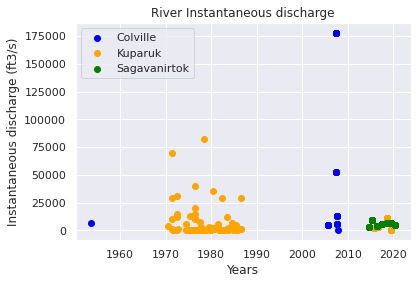

In [100]:
# Plot: Instantaneous_discharge

# Colville
plt.scatter(Colville['Datetime'],Colville['Instantaneous_discharge(ft3/s)(00061)'],color = 'blue', label = 'Colville')
# Kuparuk
plt.scatter(Kuparuk['Datetime'],Kuparuk['Instantaneous_discharge(ft3/s)(00061)'],color = 'orange', label = 'Kuparuk')
# Sagavanirtok
plt.scatter(Sagavanirtok['Datetime'],Sagavanirtok['Instantaneous_discharge(ft3/s)(00061)'],color = 'green', label = 'Sagavanirtok')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Instantaneous discharge (ft3/s)')
plt.title('River Instantaneous discharge')
plt.show()

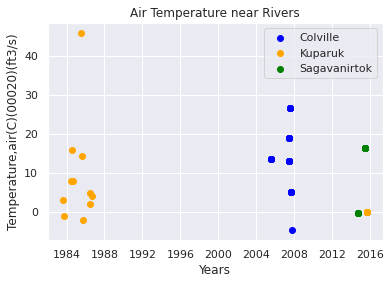

In [101]:
# Plot: Air Temperature 

# Colville
plt.scatter(Colville['Datetime'],Colville['Temperature,air(C)(00020)'],color = 'blue', label = 'Colville')
# Kuparuk
plt.scatter(Kuparuk['Datetime'],Kuparuk['Temperature,air(C)(00020)'],color = 'orange', label = 'Kuparuk')
# Sagavanirtok
plt.scatter(Sagavanirtok['Datetime'],Sagavanirtok['Temperature,air(C)(00020)'],color = 'green', label = 'Sagavanirtok')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature,air(C)(00020)(ft3/s)')
plt.title('Air Temperature near Rivers')
plt.show()

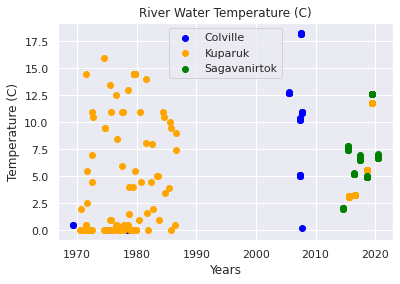

In [102]:
# Plot: Temperature Water

# Colville
plt.scatter(Colville['Datetime'],Colville['Temperature,water(C)(00010)'], color = 'blue', label = 'Colville')
# Kuparuk
plt.scatter(Kuparuk['Datetime'],Kuparuk['Temperature,water(C)(00010)'],color = 'orange', label = 'Kuparuk')
# Sagavanirtok
plt.scatter(Sagavanirtok['Datetime'],Sagavanirtok['Temperature,water(C)(00010)'],color = 'green', label = 'Sagavanirtok')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Temperature (C)')
plt.title('River Water Temperature (C)')
plt.show()


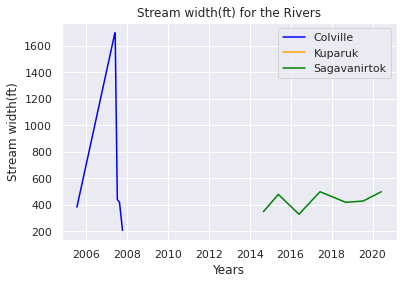

In [107]:
# Plot: Stream width(ft)

# Colville
plt.plot(Colville['Datetime'],Colville['Stream width(ft)'], color = 'blue', label = 'Colville')
# Kuparuk
plt.plot(Kuparuk['Datetime'],Kuparuk['Stream width (ft)'],color = 'orange', label = 'Kuparuk')
# Sagavanirtok
plt.plot(Sagavanirtok['Datetime'],Sagavanirtok['Stream width (ft)'],color = 'green', label = 'Sagavanirtok')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Stream width(ft)')
plt.title('Stream width(ft) for the Rivers')
plt.show()


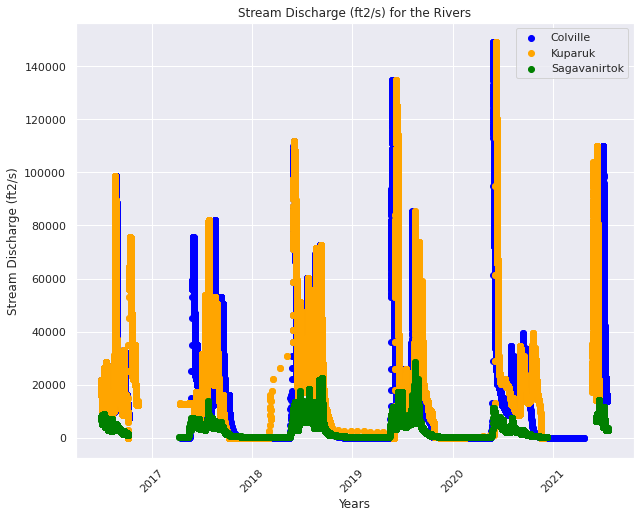

In [110]:
# Plot all discharge 

plt.scatter(Colville['Datetime'],Colville['Discharge_ft2/s'],color = 'blue', label = 'Colville')
plt.scatter(Kuparuk['Datetime'],Kuparuk['Discharge_ft2/s'],color = 'orange', label = 'Kuparuk')
plt.scatter(Sagavanirtok['Datetime'],Sagavanirtok['Discharge_ft2/s'],color = 'green', label = 'Sagavanirtok', linewidth=1)

plt.legend()
plt.xlabel('Years')
plt.ylabel('Stream Discharge (ft2/s)')
plt.title('Stream Discharge (ft2/s) for the Rivers')
plt.rcParams['figure.figsize'] = [10, 8]
plt.xticks(rotation=45)
plt.show()

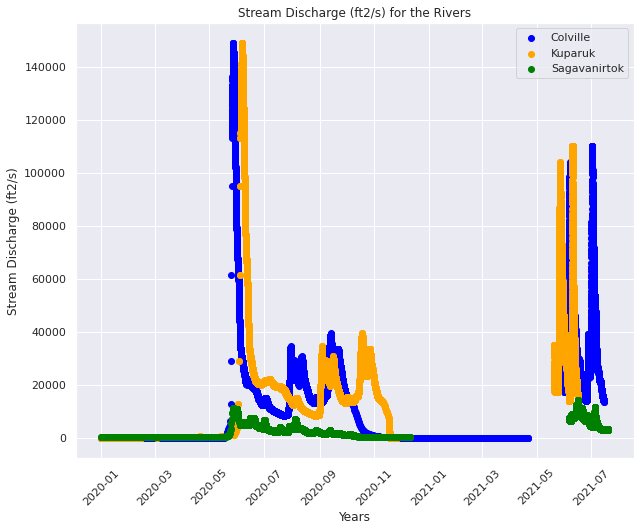

In [240]:
# Plot all discharge 2020-2021

plt.scatter(Colville.loc['2020':'2021']['Datetime'],Colville.loc['2020':'2021']['Discharge_ft2/s'],color = 'blue', label = 'Colville')
plt.scatter(Kuparuk.loc['2020':'2021']['Datetime'],Kuparuk.loc['2020':'2021']['Discharge_ft2/s'],color = 'orange', label = 'Kuparuk')
plt.scatter(Sagavanirtok.loc['2020':'2021']['Datetime'],Sagavanirtok.loc['2020':'2021']['Discharge_ft2/s'],color = 'green', label = 'Sagavanirtok', linewidth=1)

plt.legend()
plt.xlabel('Years')
plt.ylabel('Stream Discharge (ft2/s)')
plt.title('Stream Discharge (ft2/s) for the Rivers')
plt.rcParams['figure.figsize'] = [10, 8]
plt.xticks(rotation=45)
plt.show()

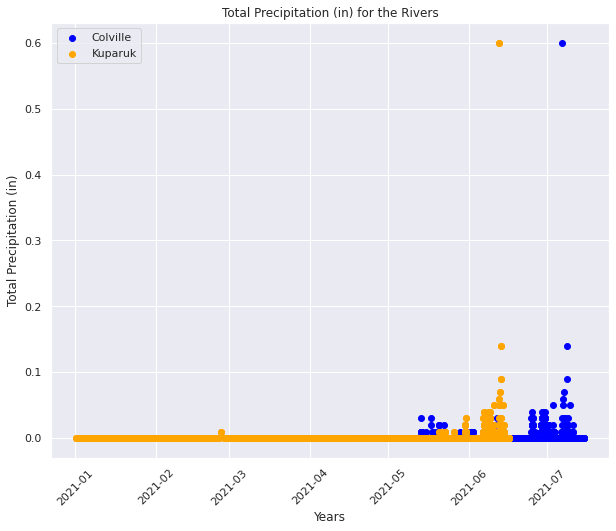

In [243]:
# Plot All Precipitation

plt.scatter(Colville.loc['2021-1':'2021-08']['Datetime'],Colville.loc['2021-1':'2021-08']['Precipitation_total_in'],color = 'blue', label = 'Colville')
plt.scatter(Kuparuk.loc['2021-1':'2021-08']['Datetime'],Kuparuk.loc['2021-1':'2021-08']['Precipitation_total_in'],color = 'orange', label = 'Kuparuk')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Total Precipitation (in)')
plt.title('Total Precipitation (in) for the Rivers')
plt.rcParams['figure.figsize'] = [10, 8]
plt.xticks(rotation=45)
plt.show()

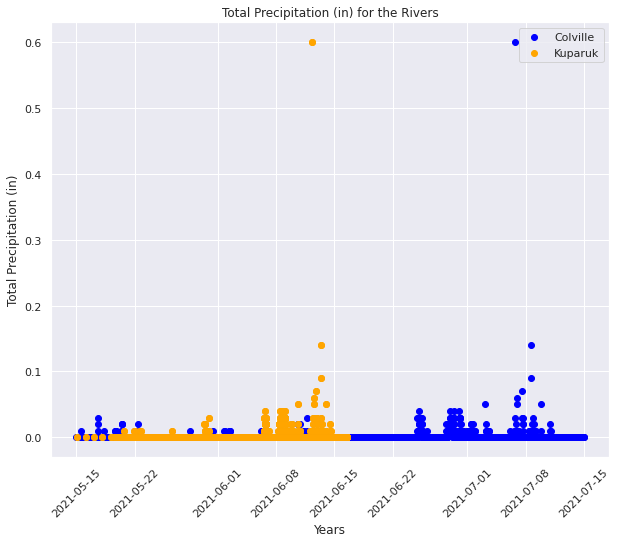

In [245]:
# Plot All Precipitation

plt.scatter(Colville.loc['2021-5-15':'2021-08']['Datetime'],Colville.loc['2021-5-15':'2021-08']['Precipitation_total_in'],color = 'blue', label = 'Colville')
plt.scatter(Kuparuk.loc['2021-5-15':'2021-08']['Datetime'],Kuparuk.loc['2021-5-15':'2021-08']['Precipitation_total_in'],color = 'orange', label = 'Kuparuk')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Total Precipitation (in)')
plt.title('Total Precipitation (in) for the Rivers')
plt.rcParams['figure.figsize'] = [10, 8]
plt.xticks(rotation=45)
plt.show()

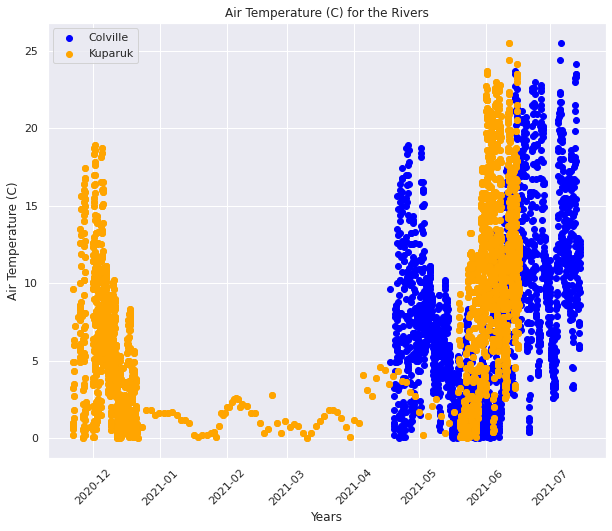

In [249]:
# Plot All Air Temperature 

plt.scatter(Colville['Datetime'],Colville['Temperature_air_C'],color = 'blue', label = 'Colville')
plt.scatter(Kuparuk['Datetime'],Kuparuk['Temperature_air_C'],color = 'orange', label = 'Kuparuk')

plt.legend()
plt.xlabel('Years')
plt.ylabel('Air Temperature (C)')
plt.title('Air Temperature (C) for the Rivers')
plt.rcParams['figure.figsize'] = [10, 8]
plt.xticks(rotation=45)
plt.show()

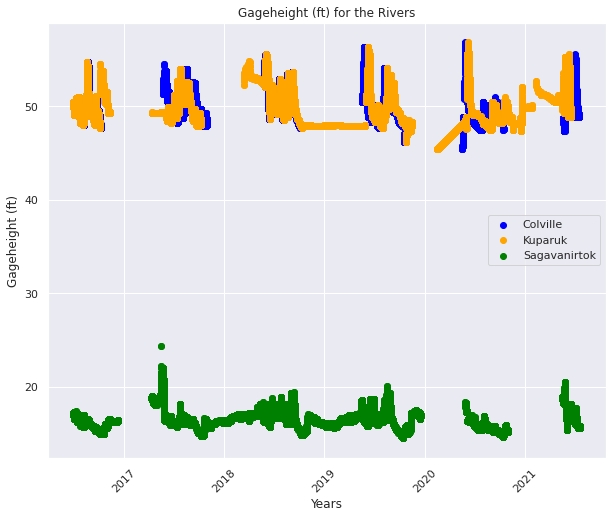

In [251]:
# Plot All Gage height

plt.scatter(Colville['Datetime'],Colville['Gageheight_ft'],color = 'blue', label = 'Colville')
plt.scatter(Kuparuk['Datetime'],Kuparuk['Gageheight_ft'],color = 'orange', label = 'Kuparuk')
plt.scatter(Sagavanirtok['Datetime'],Sagavanirtok['Gageheight_ft'],color = 'green', label = 'Sagavanirtok', linewidth=1)

plt.legend()
plt.xlabel('Years')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) for the Rivers')
plt.rcParams['figure.figsize'] = [10, 8]
plt.xticks(rotation=45)
plt.show()

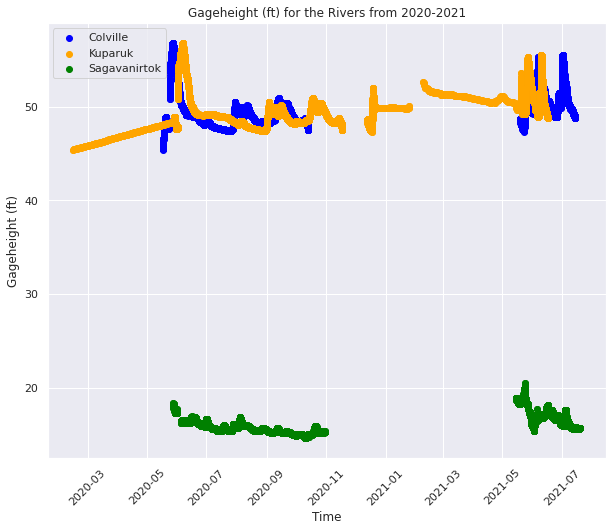

In [252]:
# Plot All Gage height 2020-2021

plt.scatter(Colville.loc['2020':'2021']['Datetime'],Colville.loc['2020':'2021']['Gageheight_ft'],color = 'blue', label = 'Colville')
plt.scatter(Kuparuk.loc['2020':'2021']['Datetime'],Kuparuk.loc['2020':'2021']['Gageheight_ft'],color = 'orange', label = 'Kuparuk')
plt.scatter(Sagavanirtok.loc['2020':'2021']['Datetime'],Sagavanirtok.loc['2020':'2021']['Gageheight_ft'],color = 'green', label = 'Sagavanirtok', linewidth=1)

plt.legend()
plt.xlabel('Time')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) for the Rivers from 2020-2021')
plt.rcParams['figure.figsize'] = [10, 8]
plt.xticks(rotation=45)
plt.show()

###Colville

In [136]:
# Look at stats and what you can plot from the past year
Colville.loc['2020':'2021'].describe()

,Stream width(ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Color, water, fltrd, Pt-Co units(00080)","Specific_conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion,water,unfltrd calcd,mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dis- solvedoxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","Carbondioxide water,unfltrd mg/L(00405)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Nitrate water, fltrd, mg/L as N(00618)","Nitrate+nitrite water, fltrd, mg/L as N(00631)","Ortho-phosphate, water, fltrd, mg/L(00660)","Ortho-phosphate, water, fltrd, mg/L as P(00671)","Organic_carbon, water,unfltrd mg/L(00680)","Hardness, water,mg/L as CaCO3(00900)","Noncarb hardness,wat unf field,mg/L as CaCO3(00902)","Calcium water, fltrd, mg/L(00915)","Magnesium, water, fltrd, mg/L(00925)","Sodium, water, fltrd, mg/L(00930)",Sodium_adsorption ratio(00931),Sodium fraction of cations percent(00932),"Potassium, water, fltrd, mg/L(00935)","Chloride, water, fltrd, mg/L(00940)","Sulfate water, fltrd, mg/L(00945)","Silica, water, fltrd,mg/L as SiO2(00955)","Iron, water, fltrd, ug/L(01046)",Gage_height_meters(30207),Discharge_instantaneous(m3/s)(30209),Dissolved_solids_dried @180degCwat flt mg/L(70300),"Dissolved_solids, sum of constituents, mg/L(70301)","Dissolved_solids, water, ton/d(70302)","Dissolved_solids, water, tons/acre-ft(70303)","Nitrate water, fltrd, mg/L(71851)","Iron, water,unfltrd ug/L(71885)",Stream_flow(ft3/s),Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2,year,month,day
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,17699.000000,4145.000000,2074.000000,19683.000000,4234.000000,21790.000000,21790.000000,21790.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32563.698750,26000.575648,0.000992,8.041659,49.518017,50.818120,2020.324277,6.841808,15.729555
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31099.010179,23406.317655,0.010522,5.706781,1.868285,1.686584,0.468115,1.693258,8.955880
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.590000,2.000000,0.000000,0.000000,45.420000,48.740000,2020.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14501.500000,14100.000000,0.000000,3.300000,48.320000,49.500000,2020.000000,6.000000,8.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26450.000000,19600.000000,0.000000,7.400000,49.100000,50.320000,2020.000000,7.000000,16.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40600.000000,28300.000000,0.000000,11.500000,50.020000,51.890000,2021.000000,8.000000,24.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91000.000000,149000.000000,0.600000,25.500000,56.820000,55.530000,2021.000000,12.000000,31.000000


#### Discharge

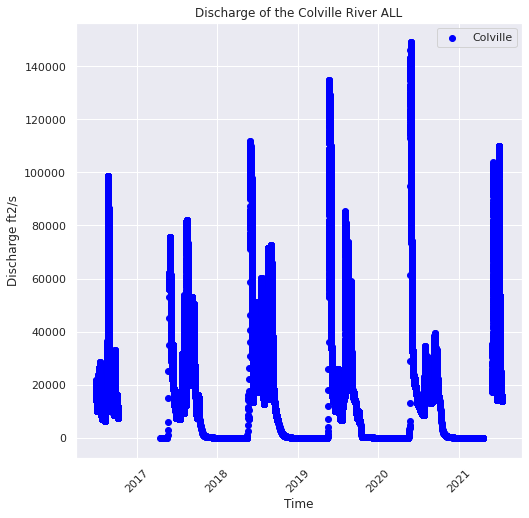

In [140]:
# Plot: Discharge Colville
plt.scatter(Colville['Datetime'],Colville['Discharge_ft2/s'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Colville River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

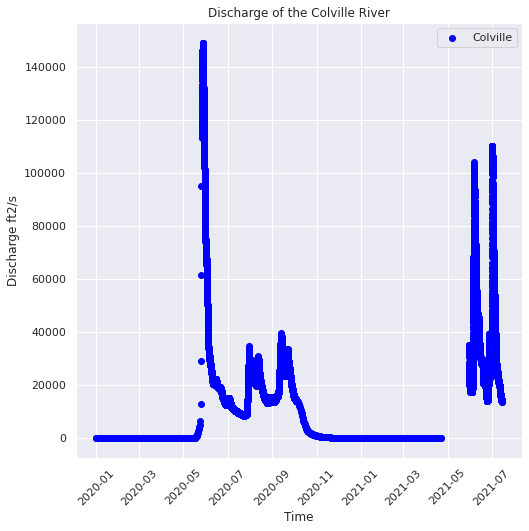

In [139]:
# Plot: Discharge Colville from 2020-2021
plt.scatter(Colville.loc['2020':'2021']['Datetime'],Colville.loc['2020':'2021']['Discharge_ft2/s'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Colville River from 2020-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()


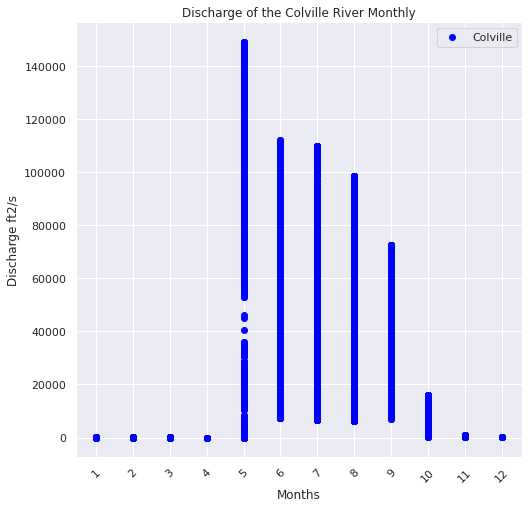

In [180]:
# Plot: Discharge Colville months
plt.scatter(Colville['month'],Colville['Discharge_ft2/s'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Colville River Monthly')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


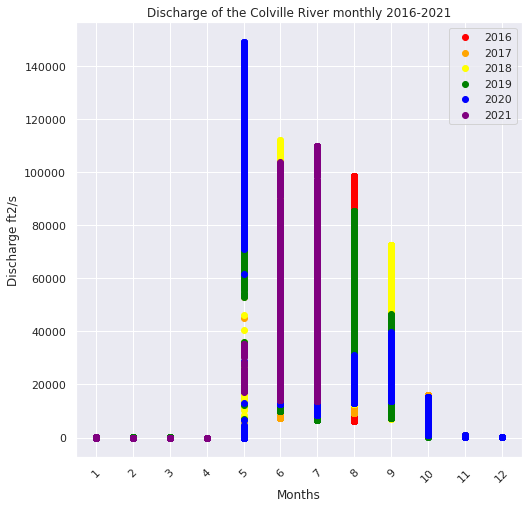

In [190]:
# Plot: Discharge Colville
plt.scatter(Colville.loc['2016']['month'],Colville.loc['2016']['Discharge_ft2/s'],color = 'red', label = '2016')
plt.scatter(Colville.loc['2017']['month'],Colville.loc['2017']['Discharge_ft2/s'],color = 'orange', label = '2017')
plt.scatter(Colville.loc['2018']['month'],Colville.loc['2018']['Discharge_ft2/s'],color = 'yellow', label = '2018')
plt.scatter(Colville.loc['2019']['month'],Colville.loc['2019']['Discharge_ft2/s'],color = 'green', label = '2019')
plt.scatter(Colville.loc['2020']['month'],Colville.loc['2020']['Discharge_ft2/s'],color = 'blue', label = '2020')
plt.scatter(Colville.loc['2021']['month'],Colville.loc['2021']['Discharge_ft2/s'],color = 'purple', label = '2021')

plt.legend()
plt.xlabel('Months')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Colville River monthly 2016-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))

plt.show()


#### Precipitation

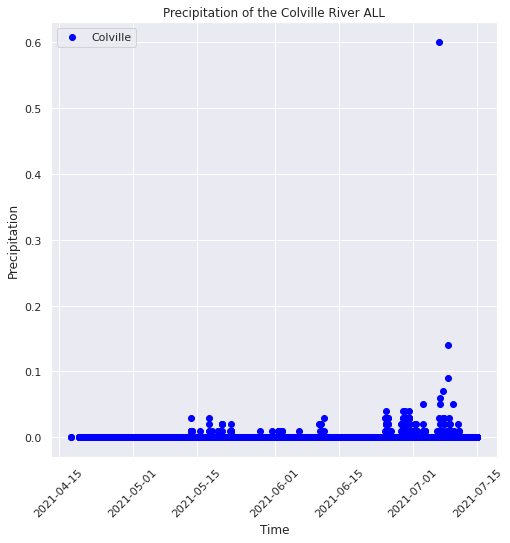

In [159]:
# Plot: Precipitation Colville
plt.scatter(Colville['Datetime'],Colville['Precipitation_total_in'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation of the Colville River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

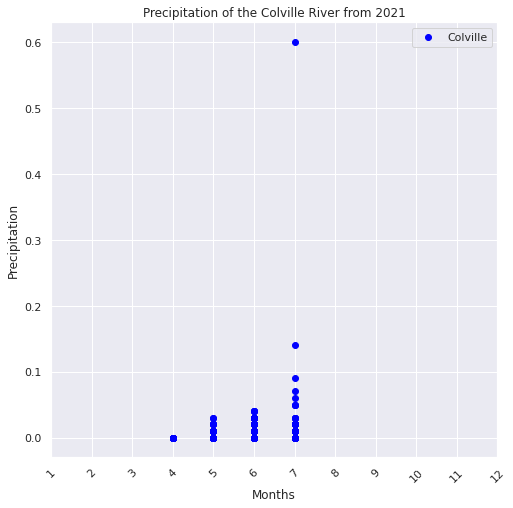

In [202]:
# Plot: Precipitation Colville from 2021
plt.scatter(Colville['month'],Colville['Precipitation_total_in'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Precipitation')
plt.title('Precipitation of the Colville River from 2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()

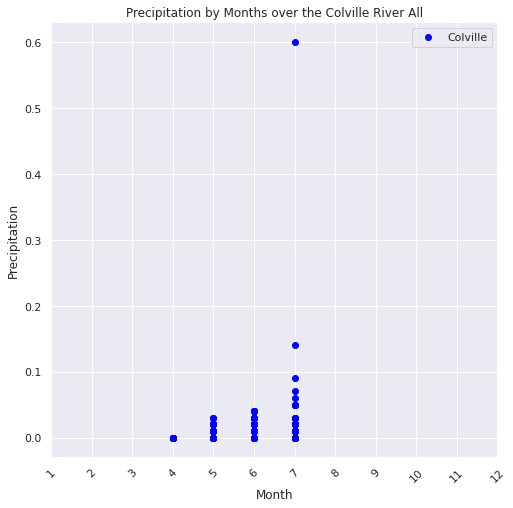

In [179]:
# Plot: Precipitation Colville months
plt.scatter(Colville['month'],Colville['Precipitation_total_in'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Precipitation')
plt.title('Precipitation by Months over the Colville River All')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()

#### Air Temperature

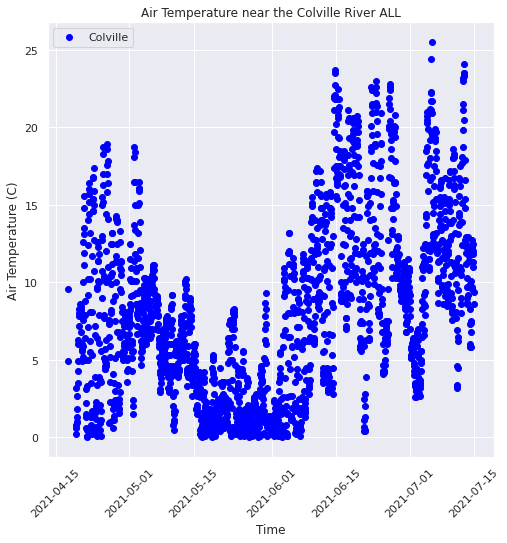

In [183]:
# Plot: Air Temperature Colville
plt.scatter(Colville['Datetime'],Colville['Temperature_air_C'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Air Temperature (C)')
plt.title('Air Temperature near the Colville River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

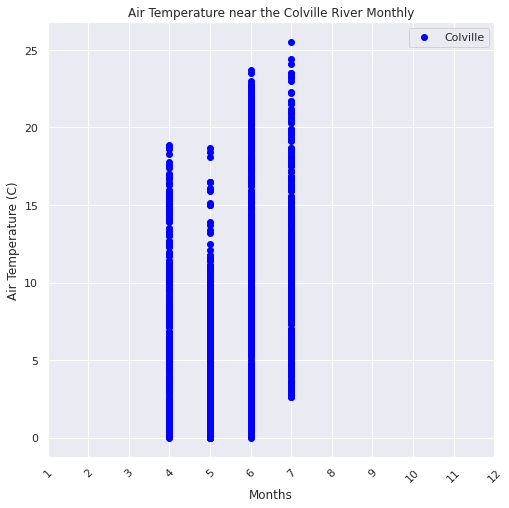

In [184]:
# Plot: Air Temperature Colville months
plt.scatter(Colville['month'],Colville['Temperature_air_C'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Air Temperature (C)')
plt.title('Air Temperature near the Colville River Monthly')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


#### Gageheight 

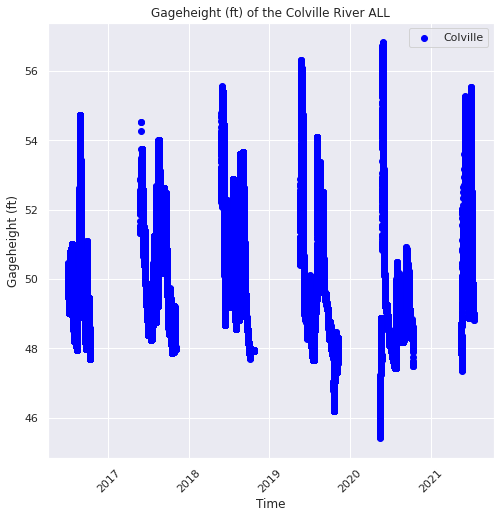

In [185]:
# Plot: Gageheight Colville
plt.scatter(Colville['Datetime'],Colville['Gageheight_ft'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) of the Colville River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

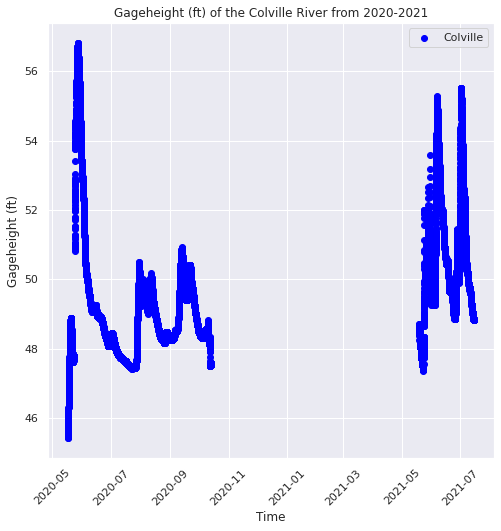

In [186]:
# Plot: Gageheight Colville from 2020-2021
plt.scatter(Colville.loc['2020':'2021']['Datetime'],Colville.loc['2020':'2021']['Gageheight_ft'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) of the Colville River from 2020-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()


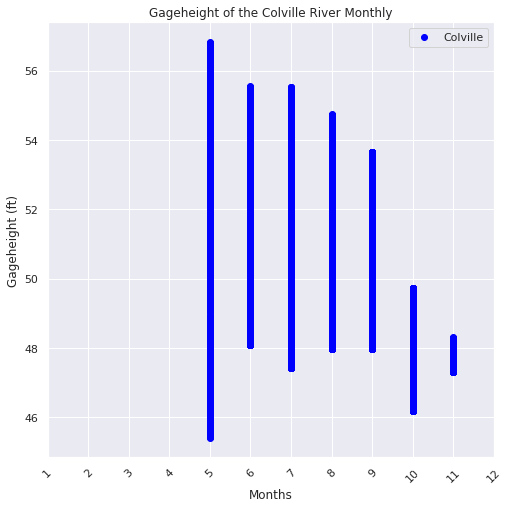

In [187]:
# Plot: Gageheight Colville months
plt.scatter(Colville['month'],Colville['Gageheight_ft'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight of the Colville River Monthly')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


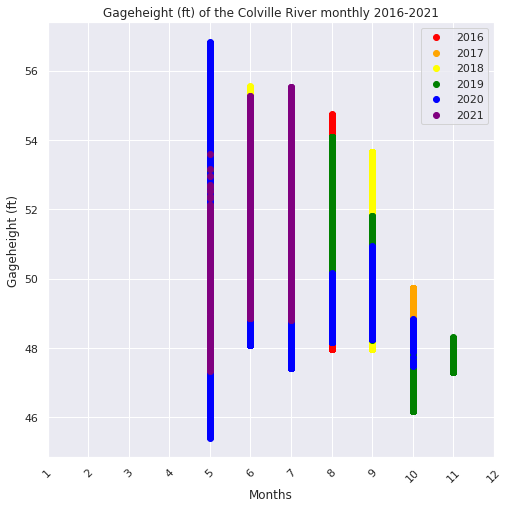

In [189]:
# Plot: Gageheight Colville
plt.scatter(Colville.loc['2016']['month'],Colville.loc['2016']['Gageheight_ft'],color = 'red', label = '2016')
plt.scatter(Colville.loc['2017']['month'],Colville.loc['2017']['Gageheight_ft'],color = 'orange', label = '2017')
plt.scatter(Colville.loc['2018']['month'],Colville.loc['2018']['Gageheight_ft'],color = 'yellow', label = '2018')
plt.scatter(Colville.loc['2019']['month'],Colville.loc['2019']['Gageheight_ft'],color = 'green', label = '2019')
plt.scatter(Colville.loc['2020']['month'],Colville.loc['2020']['Gageheight_ft'],color = 'blue', label = '2020')
plt.scatter(Colville.loc['2021']['month'],Colville.loc['2021']['Gageheight_ft'],color = 'purple', label = '2021')

plt.legend()
plt.xlabel('Months')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) of the Colville River monthly 2016-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


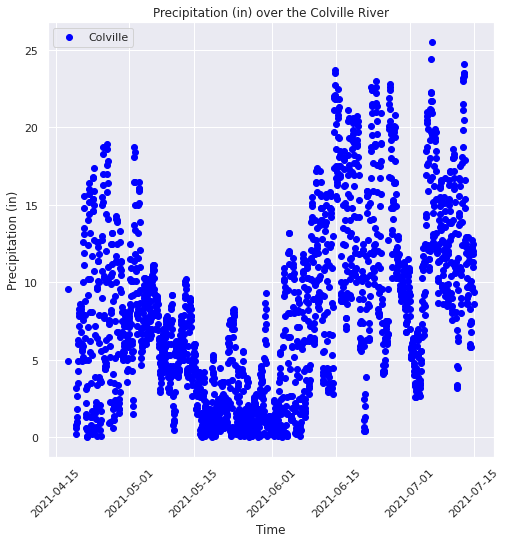

In [117]:
# Plot: Stream_flow(ft3/s) Colville
plt.scatter(Colville['Datetime'],Colville['Temperature_air_C'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation (in) over the Colville River')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()


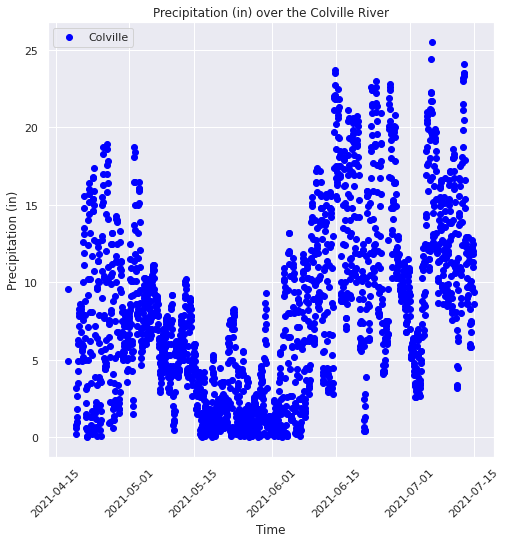

In [114]:
# Plot: Stream_flow(ft3/s) Colville
plt.scatter(Colville.loc['2021']['Datetime'],Colville.loc['2021']['Temperature_air_C'],color = 'blue', label = 'Colville')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Precipitation (in)')
plt.title('Precipitation (in) over the Colville River')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()


### Kuparuk

In [191]:
# Look at stats and what you can plot from the past year
Kuparuk.loc['2020':'2021'].describe()

,Sampling depth (ft)(00003),Stream width (ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)","Barometric pressure, (mmHg)(00025)","Surface area,(mi2)(00049)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),"Turbidity,JTU(00070)","Turbidity,NTU(00076)","Color, water, fltrd, Pt-Co units(00080)","Specific conductance,wat unfuS/cm @25 degC(00095)","Hydrogen_ion, water,unfltrd calcd, mg/L(00191)","Dissolved_oxygen,(mg/L)(00300)","Dissolved_oxygen,percentof sat-uration(00301)","pH, water,unfltrd field, std units(00400)","pH, water,unfltrd lab, std units(00403)","Carbon_dioxide water,unfltrd mg/L(00405)","Bicarbonate,wat unf fixedend pt, field, mg/L(00440)","Carbonate,wat unf fixedend pt, field, mg/L(00445)","Peri-phytonbiomass ashweight, g/m2(00572)","Peri-phytonbiomass dryweight, g/m2(00573)","Total nitrogen, water, fltrd, mg/L(00602)","Organic nitrogen, water, fltrd, mg/L(00607)","Ammonia + org-N, water, fltrd, mg/L as N(00623)","Ammonia + org-N,sus sed total, mg/L as N(00624)","Phosphate, water,unfltrd mg/L(00650)","Organiccarbon, water,unfltrd mg/L(00680)","Organiccarbon, water, fltrd, mg/L(00681)","Organiccarbon, suspndsedimnt total, mg/L(00689)","Hardness, water,mg/L as CaCO3(00900)","Noncarb hardness,wat unf field,mg/L as CaCO3(00902)","Calcium water, fltrd, mg/L(00915)","Magnesium, water, fltrd, mg/L(00925)","Sodium, water, fltrd, mg/L(00930)",Sodium adsorption ratio(00931),Sodium fraction of cations percent(00932),"Sodium + potassium, water, fltrd, mg/L as Na(00933)","Potassium, water, fltrd, mg/L(00935)","Chloride, water, fltrd, mg/L(00940)",...,Gage height above datum meters(30207),"Discharge,instantaneous m3/s(30209)","Chlorophyll b periphyton,uncorr, mg/m2(32226)","Chlorophyll a periphyton,uncorr, mg/m2(32228)","Biomass peri-phyton,ashfreedrymass g/m2(49954)","Phytoplankton, total, cells /mL(60050)","Dissolved solids,dried @180degCwat flt mg/L(70300)","Dissolved solids,water, ton/d(70302)","Dissolved solids,water, tons/acre-ft(70303)",Suspnd. sediment sievediametrpercent<0.0625 mm(70331),"Suspnd. sediment, sievediametrpercent<.125mm(70332)","Suspnd. sediment, sievediametrpercent <.25mm(70333)","Suspnd. sediment, sievediametrpercent <.5 mm(70334)","Suspnd. sediment,falldiadst watpercent<.002mm(70337)","Suspnd. sediment,falldiadst watpercent<.004mm(70338)","Suspnd. sediment,falldiadst watpercent<.008mm(70339)","Suspnd. sediment,falldiadst watpercent<.016mm(70340)","Suspnd. sediment,falldiadst watpercent<.031mm(70341)","Orthophosphate, water,unfltrd mg/L as P(70507)","Biomasschlorophyll ratio, peri-phyton, number(70950)","Manga- nese, water,unfltrd ug/L(71883)","Iron, water,unfltrd ug/L(71885)","Phosphorus, water,unfltrd mg/L as PO4(71886)","Total nitrogen, water,unfltrd mg/L as NO3(71887)","Mercury suspndsedimntrecover -able, ug/L(71895)",Suspended sediment concentration mg/L(80154),"Suspended sediment discharge, ton/d(80155)","Carbonate,wat unfinf tit field,mg/L as CaCO3(99430)","Bicarbonate,wat unfinfl pt titr., field, mg/L(99440)",Year,Discharge_(ft3/s),Stream_flow(ft3/s),Discharge_ft2/s,Precipitation_total_in,Temperature_air_C,Gageheight_ft,Gageheight_ft_2,year,month,day
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,35030.000000,8290.000000,4148.000000,39366.000000,8468.000000,43200.000000,43200.000000,43200.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6327.500000,26273.575538,0.000992,8.041659,49.518017,50.818120,2020.215486,8.175694,14.799606
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

#### Discharge

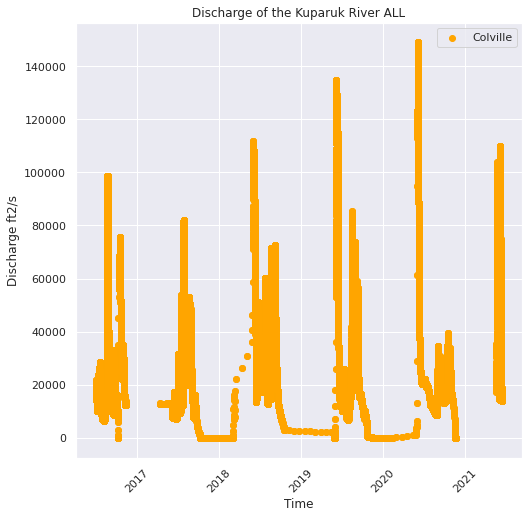

In [193]:
# Plot: Discharge Colville
plt.scatter(Kuparuk['Datetime'],Kuparuk['Discharge_ft2/s'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Kuparuk River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

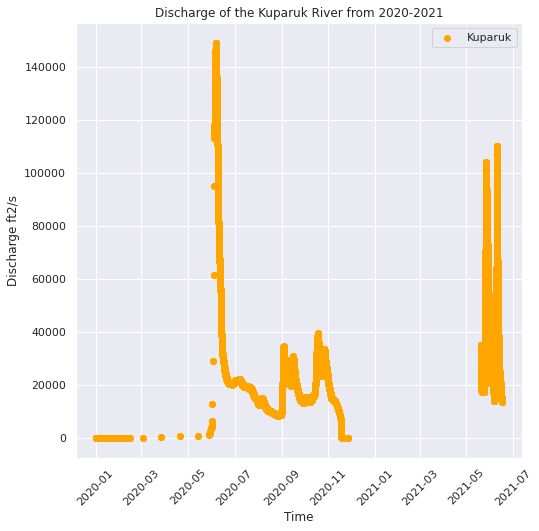

In [194]:
# Plot: Discharge Kuparuk from 2020-2021
plt.scatter(Kuparuk.loc['2020':'2021']['Datetime'],Kuparuk.loc['2020':'2021']['Discharge_ft2/s'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Kuparuk River from 2020-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()


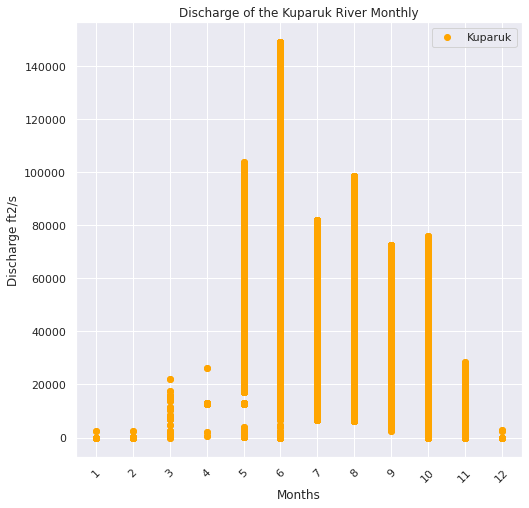

In [195]:
# Plot: Discharge Kuparuk months
plt.scatter(Kuparuk['month'],Kuparuk['Discharge_ft2/s'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Kuparuk River Monthly')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


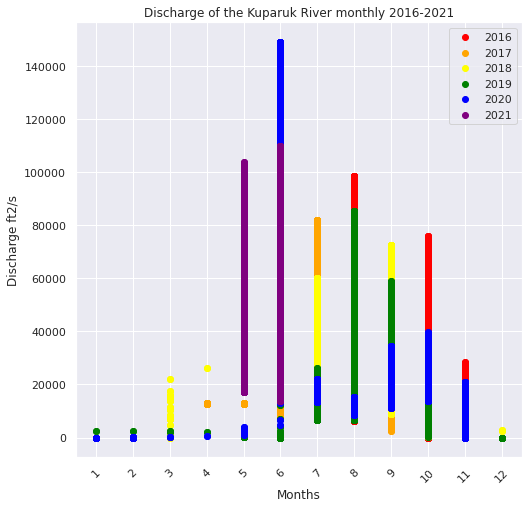

In [196]:
# Plot: Discharge Kuparuk
plt.scatter(Kuparuk.loc['2016']['month'],Kuparuk.loc['2016']['Discharge_ft2/s'],color = 'red', label = '2016')
plt.scatter(Kuparuk.loc['2017']['month'],Kuparuk.loc['2017']['Discharge_ft2/s'],color = 'orange', label = '2017')
plt.scatter(Kuparuk.loc['2018']['month'],Kuparuk.loc['2018']['Discharge_ft2/s'],color = 'yellow', label = '2018')
plt.scatter(Kuparuk.loc['2019']['month'],Kuparuk.loc['2019']['Discharge_ft2/s'],color = 'green', label = '2019')
plt.scatter(Kuparuk.loc['2020']['month'],Kuparuk.loc['2020']['Discharge_ft2/s'],color = 'blue', label = '2020')
plt.scatter(Kuparuk.loc['2021']['month'],Kuparuk.loc['2021']['Discharge_ft2/s'],color = 'purple', label = '2021')

plt.legend()
plt.xlabel('Months')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Kuparuk River monthly 2016-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))

plt.show()


#### Precipitation

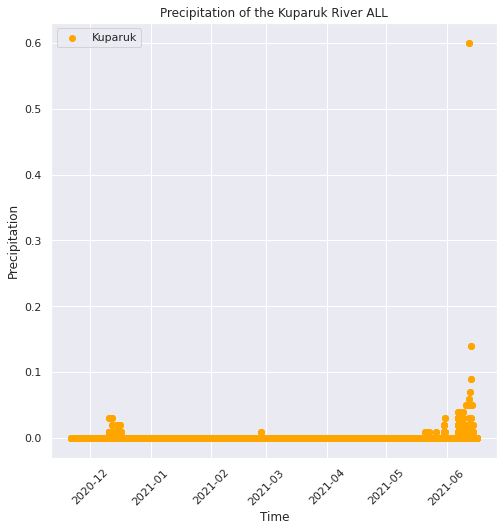

In [197]:
# Plot: Precipitation Kuparuk
plt.scatter(Kuparuk['Datetime'],Kuparuk['Precipitation_total_in'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.title('Precipitation of the Kuparuk River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

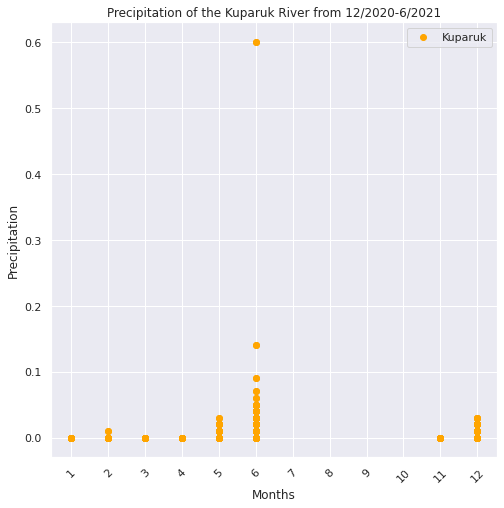

In [203]:
# Plot: Precipitation Kuparuk from 2020-2021
plt.scatter(Kuparuk['month'],Kuparuk['Precipitation_total_in'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Precipitation')
plt.title('Precipitation of the Kuparuk River from 12/2020-6/2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()

#### Air Temperature

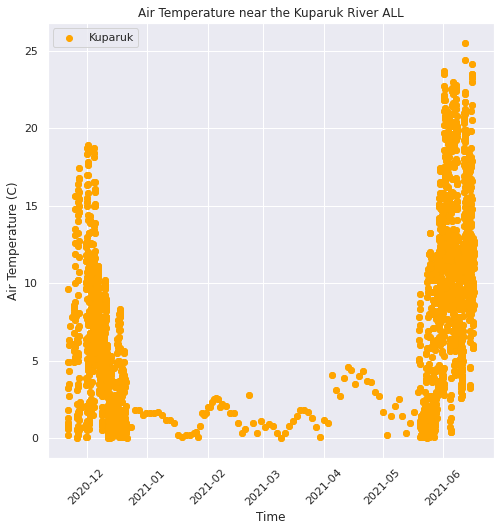

In [206]:
# Plot: Air Temperature Kuparuk
plt.scatter(Kuparuk['Datetime'],Kuparuk['Temperature_air_C'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Air Temperature (C)')
plt.title('Air Temperature near the Kuparuk River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

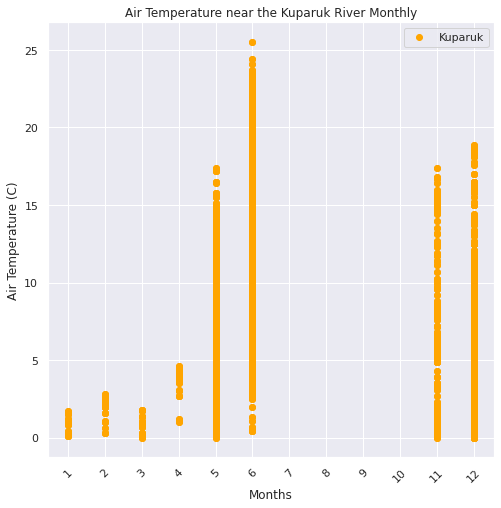

In [207]:
# Plot: Air Temperature Kuparuk months
plt.scatter(Kuparuk['month'],Kuparuk['Temperature_air_C'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Air Temperature (C)')
plt.title('Air Temperature near the Kuparuk River Monthly')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


#### Gageheight

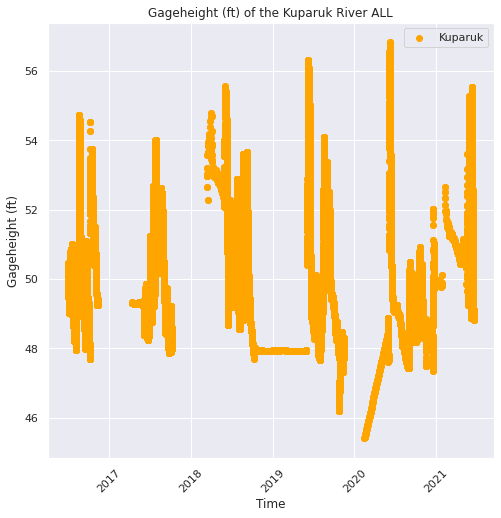

In [208]:
# Plot: Gageheight Kuparuk
plt.scatter(Kuparuk['Datetime'],Kuparuk['Gageheight_ft'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) of the Kuparuk River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

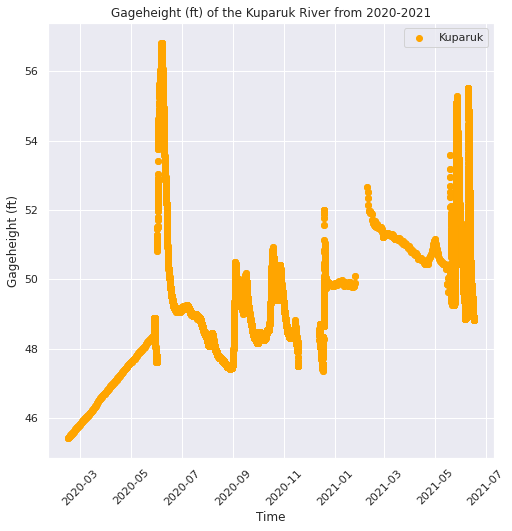

In [209]:
# Plot: Gageheight Kuparuk from 2020-2021
plt.scatter(Kuparuk.loc['2020':'2021']['Datetime'],Kuparuk.loc['2020':'2021']['Gageheight_ft'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) of the Kuparuk River from 2020-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()


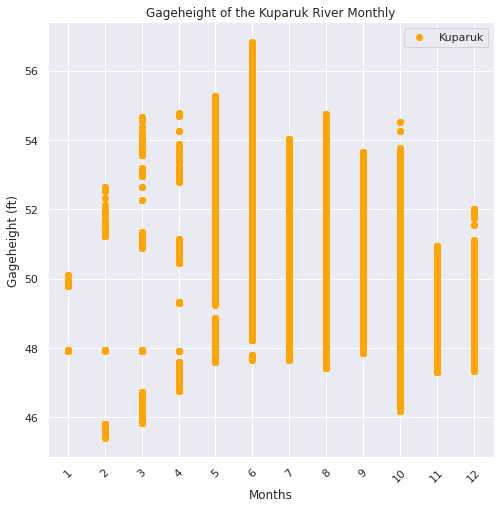

In [210]:
# Plot: Gageheight Kuparuk months
plt.scatter(Kuparuk['month'],Kuparuk['Gageheight_ft'],color = 'orange', label = 'Kuparuk')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight of the Kuparuk River Monthly')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


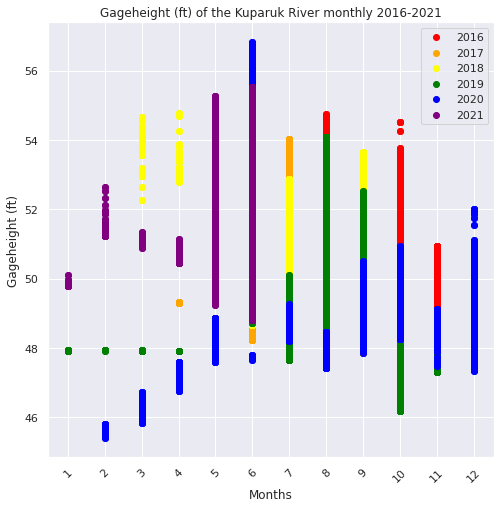

In [211]:
# Plot: Gageheight Kuparuk
plt.scatter(Kuparuk.loc['2016']['month'],Kuparuk.loc['2016']['Gageheight_ft'],color = 'red', label = '2016')
plt.scatter(Kuparuk.loc['2017']['month'],Kuparuk.loc['2017']['Gageheight_ft'],color = 'orange', label = '2017')
plt.scatter(Kuparuk.loc['2018']['month'],Kuparuk.loc['2018']['Gageheight_ft'],color = 'yellow', label = '2018')
plt.scatter(Kuparuk.loc['2019']['month'],Kuparuk.loc['2019']['Gageheight_ft'],color = 'green', label = '2019')
plt.scatter(Kuparuk.loc['2020']['month'],Kuparuk.loc['2020']['Gageheight_ft'],color = 'blue', label = '2020')
plt.scatter(Kuparuk.loc['2021']['month'],Kuparuk.loc['2021']['Gageheight_ft'],color = 'purple', label = '2021')

plt.legend()
plt.xlabel('Months')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) of the Kuparuk River monthly 2016-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


### Sagavanirtok

In [213]:
# Look at stats and what you can plot from the past year
Sagavanirtok.loc['2020':'2021'].describe()

,Stream width (ft),"Temperature,water(C)(00010)","Temperature,air(C)(00020)",Instantaneous_discharge(ft3/s)(00061),Gageheight_feet(00065),Gage_height_meters(30207),Discharge_instantaneous(m3/s)(30209),Discharge_ft2/s,Gageheight_ft,Temperature_water_C,year,month,day
count,10.0,10.000000,0.0,10.0,0.0,0.0,10.0,33724.000000,41244.000000,28666.000000,51468.000000,51468.000000,51468.000000
mean,500.0,6.780000,NaN,5140.0,NaN,NaN,146.0,3950.596074,16.074987,9.267941,2020.408565,6.762454,15.692702
std,0.0,0.131656,NaN,0.0,NaN,NaN,0.0,2461.806394,0.952619,2.923335,0.491573,1.939402,8.998787
min,500.0,6.700000,NaN,5140.0,NaN,NaN,146.0,275.000000,14.630000,0.000000,2020.000000,1.000000,1.000000
25%,500.0,6.700000,NaN,5140.0,NaN,NaN,146.0,2140.000000,15.400000,7.900000,2020.000000,5.000000,8.000000
50%,500.0,6.700000,NaN,5140.0,NaN,NaN,146.0,3300.000000,15.810000,9.800000,2020.000000,7.000000,15.000000
75%,500.0,6.800000,NaN,5140.0,NaN,NaN,146.0,5250.000000,16.520000,11.200000,2021.000000,8.000000,24.000000
max,500.0,7.100000,NaN,5140.0,NaN,NaN,146.0,14300.000000,20.490000,16.400000,2021.000000,12.000000,31.000000


#### Discharge

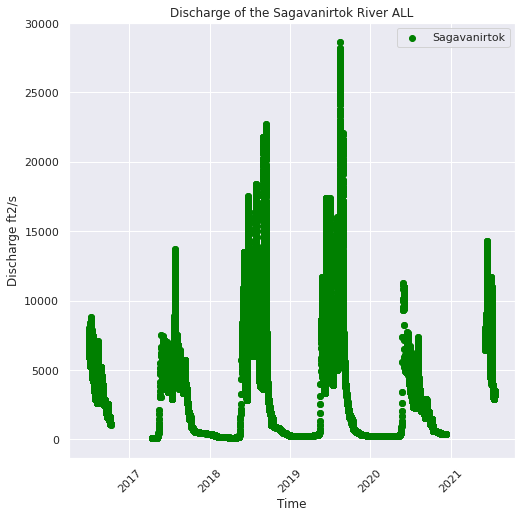

In [214]:
# Plot: Discharge Sagavanirtok
plt.scatter(Sagavanirtok['Datetime'],Sagavanirtok['Discharge_ft2/s'],color = 'green', label = 'Sagavanirtok')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Sagavanirtok River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

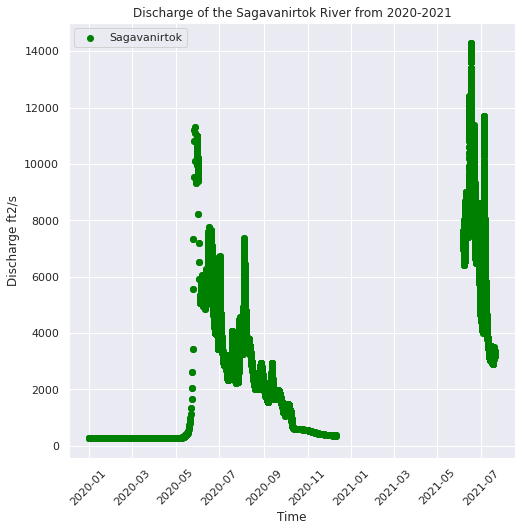

In [215]:
# Plot: Discharge Sagavanirtok from 2020-2021
plt.scatter(Sagavanirtok.loc['2020':'2021']['Datetime'],Sagavanirtok.loc['2020':'2021']['Discharge_ft2/s'],color = 'green', label = 'Sagavanirtok')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Sagavanirtok River from 2020-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()


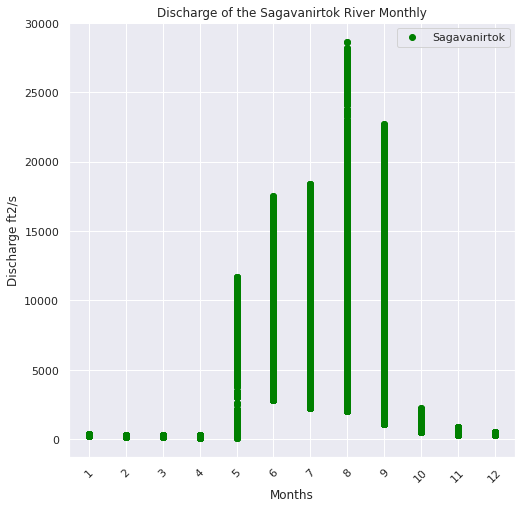

In [216]:
# Plot: Discharge Sagavanirtok months
plt.scatter(Sagavanirtok['month'],Sagavanirtok['Discharge_ft2/s'],color = 'green', label = 'Sagavanirtok')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Sagavanirtok River Monthly')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


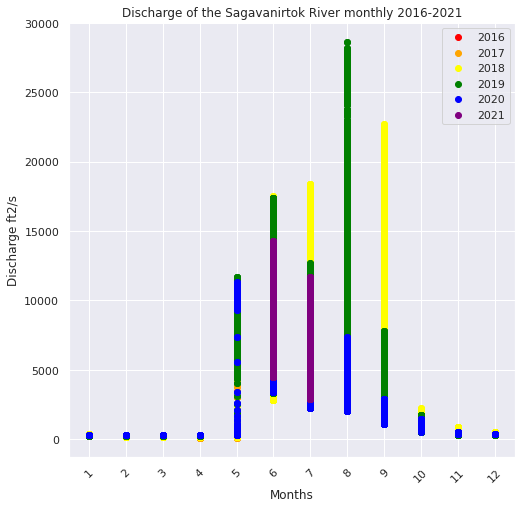

In [217]:
# Plot: Discharge Sagavanirtok
plt.scatter(Sagavanirtok.loc['2016']['month'],Sagavanirtok.loc['2016']['Discharge_ft2/s'],color = 'red', label = '2016')
plt.scatter(Sagavanirtok.loc['2017']['month'],Sagavanirtok.loc['2017']['Discharge_ft2/s'],color = 'orange', label = '2017')
plt.scatter(Sagavanirtok.loc['2018']['month'],Sagavanirtok.loc['2018']['Discharge_ft2/s'],color = 'yellow', label = '2018')
plt.scatter(Sagavanirtok.loc['2019']['month'],Sagavanirtok.loc['2019']['Discharge_ft2/s'],color = 'green', label = '2019')
plt.scatter(Sagavanirtok.loc['2020']['month'],Sagavanirtok.loc['2020']['Discharge_ft2/s'],color = 'blue', label = '2020')
plt.scatter(Sagavanirtok.loc['2021']['month'],Sagavanirtok.loc['2021']['Discharge_ft2/s'],color = 'purple', label = '2021')

plt.legend()
plt.xlabel('Months')
plt.ylabel('Discharge ft2/s')
plt.title('Discharge of the Sagavanirtok River monthly 2016-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))

plt.show()


#### Gageheight

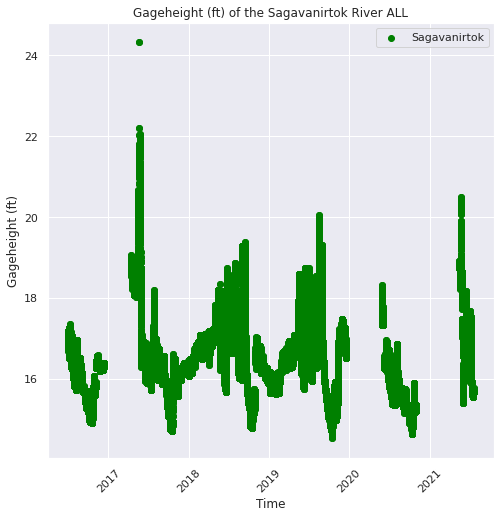

In [218]:
# Plot: Gageheight Sagavanirtok
plt.scatter(Sagavanirtok['Datetime'],Sagavanirtok['Gageheight_ft'],color = 'green', label = 'Sagavanirtok')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) of the Sagavanirtok River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

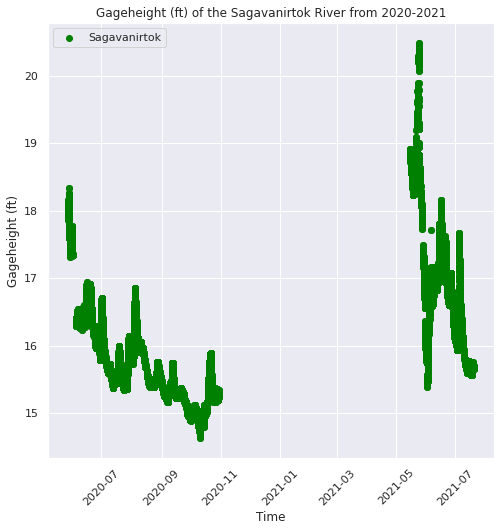

In [219]:
# Plot: Gageheight Sagavanirtok from 2020-2021
plt.scatter(Sagavanirtok.loc['2020':'2021']['Datetime'],Sagavanirtok.loc['2020':'2021']['Gageheight_ft'],color = 'green', label = 'Sagavanirtok')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) of the Sagavanirtok River from 2020-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()


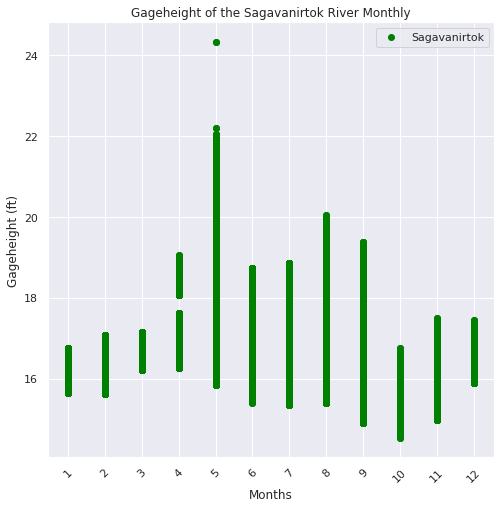

In [220]:
# Plot: Gageheight Sagavanirtok months
plt.scatter(Sagavanirtok['month'],Sagavanirtok['Gageheight_ft'],color = 'green', label = 'Sagavanirtok')
plt.legend()
plt.xlabel('Months')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight of the Sagavanirtok River Monthly')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


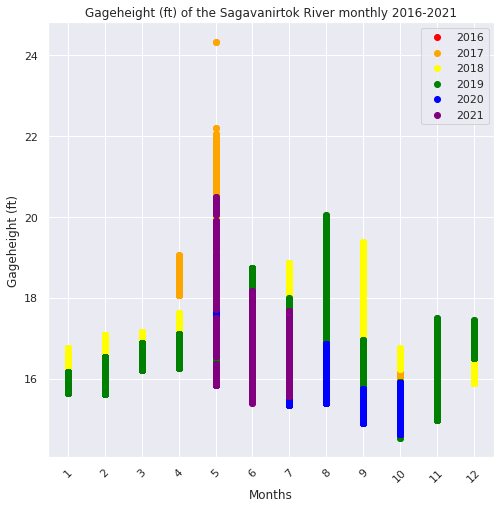

In [221]:
# Plot: Gageheight Sagavanirtok
plt.scatter(Sagavanirtok.loc['2016']['month'],Sagavanirtok.loc['2016']['Gageheight_ft'],color = 'red', label = '2016')
plt.scatter(Sagavanirtok.loc['2017']['month'],Sagavanirtok.loc['2017']['Gageheight_ft'],color = 'orange', label = '2017')
plt.scatter(Sagavanirtok.loc['2018']['month'],Sagavanirtok.loc['2018']['Gageheight_ft'],color = 'yellow', label = '2018')
plt.scatter(Sagavanirtok.loc['2019']['month'],Sagavanirtok.loc['2019']['Gageheight_ft'],color = 'green', label = '2019')
plt.scatter(Sagavanirtok.loc['2020']['month'],Sagavanirtok.loc['2020']['Gageheight_ft'],color = 'blue', label = '2020')
plt.scatter(Sagavanirtok.loc['2021']['month'],Sagavanirtok.loc['2021']['Gageheight_ft'],color = 'purple', label = '2021')

plt.legend()
plt.xlabel('Months')
plt.ylabel('Gageheight (ft)')
plt.title('Gageheight (ft) of the Sagavanirtok River monthly 2016-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()


#### Water Temperature

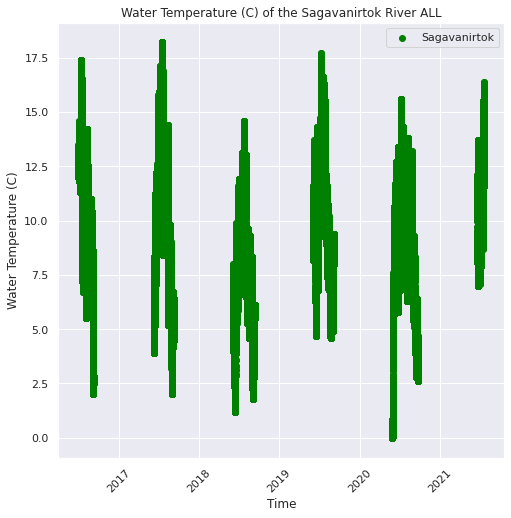

In [222]:
# Plot: Water Temperature Sagavanirtok
plt.scatter(Sagavanirtok['Datetime'],Sagavanirtok['Temperature_water_C'],color = 'green', label = 'Sagavanirtok')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Water Temperature (C)')
plt.title('Water Temperature (C) of the Sagavanirtok River ALL')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

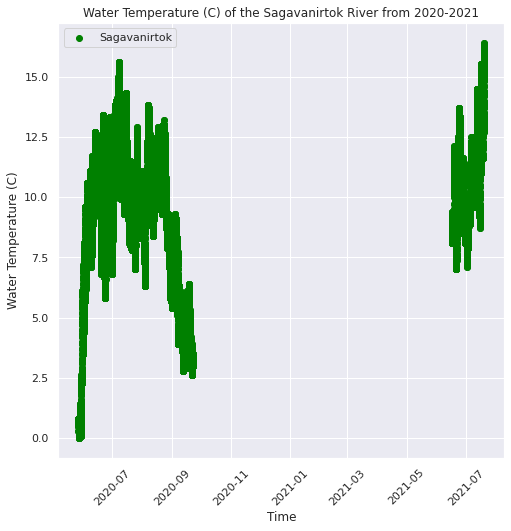

In [225]:
# Plot: Water Temperature Sagavanirtok 2020-2021
plt.scatter(Sagavanirtok.loc['2020':'2021']['Datetime'],Sagavanirtok.loc['2020':'2021']['Temperature_water_C'],color = 'green', label = 'Sagavanirtok')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Water Temperature (C)')
plt.title('Water Temperature (C) of the Sagavanirtok River from 2020-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.show()

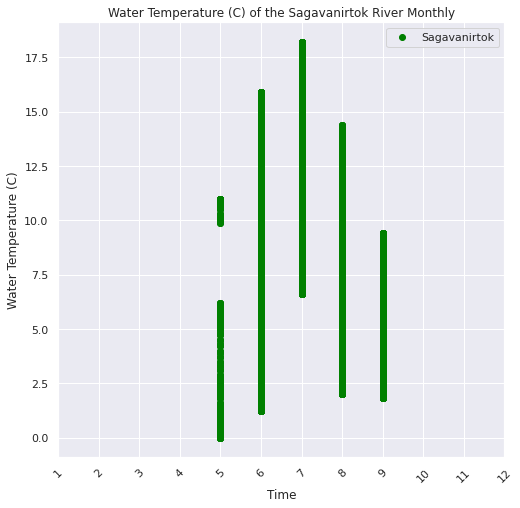

In [228]:
# Plot: Water Temperature Sagavanirtok Monthly
plt.scatter(Sagavanirtok['month'],Sagavanirtok['Temperature_water_C'],color = 'green', label = 'Sagavanirtok')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Water Temperature (C)')
plt.title('Water Temperature (C) of the Sagavanirtok River Monthly')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()

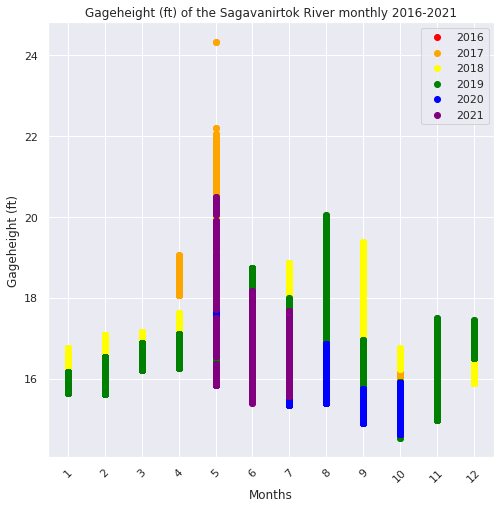

In [229]:
# Plot: Water Temperature Sagavanirtok Yearly 
plt.scatter(Sagavanirtok.loc['2016']['month'],Sagavanirtok.loc['2016']['Gageheight_ft'],color = 'red', label = '2016')
plt.scatter(Sagavanirtok.loc['2017']['month'],Sagavanirtok.loc['2017']['Gageheight_ft'],color = 'orange', label = '2017')
plt.scatter(Sagavanirtok.loc['2018']['month'],Sagavanirtok.loc['2018']['Gageheight_ft'],color = 'yellow', label = '2018')
plt.scatter(Sagavanirtok.loc['2019']['month'],Sagavanirtok.loc['2019']['Gageheight_ft'],color = 'green', label = '2019')
plt.scatter(Sagavanirtok.loc['2020']['month'],Sagavanirtok.loc['2020']['Gageheight_ft'],color = 'blue', label = '2020')
plt.scatter(Sagavanirtok.loc['2021']['month'],Sagavanirtok.loc['2021']['Gageheight_ft'],color = 'purple', label = '2021')

plt.legend()
plt.xlabel('Months')
plt.ylabel('Water Temperature (C)')
plt.title('Water Temperature (C) of the Sagavanirtok River monthly 2016-2021')
plt.rcParams['figure.figsize'] = [8, 8]
plt.xticks(rotation=45)
plt.xticks(range(1,13))
plt.show()
